# importando librerias

In [29]:
import empiricaldist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info
 


In [41]:
data = pd.read_csv('../../datasets/raw/fifa_players.csv')
data.head()

name                       full_name birth_date  age  height_cm  \
0      L. Messi  Lionel Andrés Messi Cuccittini  6/24/1987   31     170.18   
1    C. Eriksen    Christian  Dannemann Eriksen  2/14/1992   27     154.94   
2      P. Pogba                      Paul Pogba  3/15/1993   25     190.50   
3    L. Insigne                 Lorenzo Insigne   6/4/1991   27     162.56   
4  K. Koulibaly               Kalidou Koulibaly  6/20/1991   27     187.96   

   weight_kgs  positions nationality  overall_rating  potential  ...  \
0        72.1   CF,RW,ST   Argentina              94         94  ...   
1        76.2  CAM,RM,CM     Denmark              88         89  ...   
2        83.9     CM,CAM      France              88         91  ...   
3        59.0      LW,ST       Italy              88         88  ...   
4        88.9         CB     Senegal              88         91  ...   

   long_shots  aggression interceptions  positioning  vision  penalties  \
0          94          48            22           94      94         75   
1          89          46            56           84      91         67   
2          82          78            64           82      88         82   
3          84          34            26           83      87         61   
4          15          87            88           24      49         33   

  composure  marking standing_tackle  sliding_tackle  
0        96       33              28              26  
1        88       59              57              22  
2        87       63              67              67  
3        83       51              24              22  
4        80       91              88              87  

[5 rows x 51 columns]

In [7]:
data.shape  #número de observaciones


(17954, 51)

In [5]:
data.dtypes #tipo de variables


name                              object
full_name                         object
birth_date                        object
age                                int64
height_cm                        float64
weight_kgs                       float64
positions                         object
nationality                       object
overall_rating                     int64
potential                          int64
value_euro                       float64
wage_euro                        float64
preferred_foot                    object
international_reputation(1-5)      int64
weak_foot(1-5)                     int64
skill_moves(1-5)                   int64
body_type                         object
release_clause_euro              float64
national_team                     object
national_rating                  float64
national_team_position            object
national_jersey_number           float64
crossing                           int64
finishing                          int64
heading_accuracy

In [6]:
data.nunique # cardinalidad

<bound method DataFrame.nunique of                  name                         full_name birth_date  age  \
0            L. Messi    Lionel Andrés Messi Cuccittini  6/24/1987   31   
1          C. Eriksen      Christian  Dannemann Eriksen  2/14/1992   27   
2            P. Pogba                        Paul Pogba  3/15/1993   25   
3          L. Insigne                   Lorenzo Insigne   6/4/1991   27   
4        K. Koulibaly                 Kalidou Koulibaly  6/20/1991   27   
...               ...                               ...        ...  ...   
17949     R. McKenzie                    Rory  McKenzie  10/7/1993   25   
17950       M. Sipľak                     Michal Sipľak   2/2/1996   23   
17951      J. Bekkema                       Jan Bekkema   4/9/1996   22   
17952      A. Al Yami               Abdulrahman Al Yami  6/19/1997   21   
17953  Júnior Brumado  José Francisco dos Santos Júnior  5/15/1999   19   

       height_cm  weight_kgs  positions   nationality  overall_r

# A continuación la estadistica descriptiva

In [42]:
data.describe()

age     height_cm    weight_kgs  overall_rating     potential  \
count  17954.000000  17954.000000  17954.000000    17954.000000  17954.000000   
mean      25.565445    174.946921     75.301047       66.240169     71.430935   
std        4.705708     14.029449      7.083684        6.963730      6.131339   
min       17.000000    152.400000     49.900000       47.000000     48.000000   
25%       22.000000    154.940000     69.900000       62.000000     67.000000   
50%       25.000000    175.260000     74.800000       66.000000     71.000000   
75%       29.000000    185.420000     79.800000       71.000000     75.000000   
max       46.000000    205.740000    110.200000       94.000000     95.000000   

         value_euro      wage_euro  international_reputation(1-5)  \
count  1.769900e+04   17708.000000                   17954.000000   
mean   2.479280e+06    9902.134628                       1.111674   
std    5.687014e+06   21995.593750                       0.392168   
min    1.000000e+04    1000.000000                       1.000000   
25%    3.250000e+05    1000.000000                       1.000000   
50%    7.000000e+05    3000.000000                       1.000000   
75%    2.100000e+06    9000.000000                       1.000000   
max    1.105000e+08  565000.000000                       5.000000   

       weak_foot(1-5)  skill_moves(1-5)  ...    long_shots    aggression  \
count    17954.000000      17954.000000  ...  17954.000000  17954.000000   
mean         2.945695          2.361034  ...     46.852456     55.816531   
std          0.663691          0.763223  ...     19.429337     17.394047   
min          1.000000          1.000000  ...      3.000000     11.000000   
25%          3.000000          2.000000  ...     32.000000     44.000000   
50%          3.000000          2.000000  ...     51.000000     59.000000   
75%          3.000000          3.000000  ...     62.000000     69.000000   
max          5.000000          5.000000  ...     94.000000     95.000000   

       interceptions   positioning        vision     penalties     composure  \
count   17954.000000  17954.000000  17954.000000  17954.000000  17954.000000   
mean       46.657959     49.857302     53.406260     48.357302     58.680183   
std        20.754649     19.694311     14.156038     15.810844     11.625541   
min         3.000000      2.000000     10.000000      5.000000     12.000000   
25%        26.000000     38.000000     44.000000     38.000000     51.000000   
50%        52.000000     55.000000     55.000000     49.000000     60.000000   
75%        64.000000     64.000000     64.000000     60.000000     67.000000   
max        92.000000     95.000000     94.000000     92.000000     96.000000   

            marking  standing_tackle  sliding_tackle  
count  17954.000000     17954.000000    17954.000000  
mean      47.162861        47.733040       45.705915  
std       20.037346        21.674973       21.285812  
min        3.000000         2.000000        3.000000  
25%       30.000000        27.000000       24.000000  
50%       52.500000        55.000000       52.000000  
75%       64.000000        66.000000       64.000000  
max       94.000000        93.000000       90.000000  

[8 rows x 42 columns]

# Datos faltantes

In [9]:
print(data.isnull().any())

name                             False
full_name                        False
birth_date                       False
age                              False
height_cm                        False
weight_kgs                       False
positions                        False
nationality                      False
overall_rating                   False
potential                        False
value_euro                        True
wage_euro                         True
preferred_foot                   False
international_reputation(1-5)    False
weak_foot(1-5)                   False
skill_moves(1-5)                 False
body_type                        False
release_clause_euro               True
national_team                     True
national_rating                   True
national_team_position            True
national_jersey_number            True
crossing                         False
finishing                        False
heading_accuracy                 False
short_passing            

In [11]:
data.isnull().mean().sort_values(ascending=False)

national_jersey_number           0.952267
national_team_position           0.952267
national_rating                  0.952267
national_team                    0.952267
release_clause_euro              0.102317
value_euro                       0.014203
wage_euro                        0.013702
name                             0.000000
shot_power                       0.000000
ball_control                     0.000000
acceleration                     0.000000
sprint_speed                     0.000000
agility                          0.000000
reactions                        0.000000
balance                          0.000000
stamina                          0.000000
jumping                          0.000000
freekick_accuracy                0.000000
strength                         0.000000
long_shots                       0.000000
aggression                       0.000000
interceptions                    0.000000
positioning                      0.000000
vision                           0

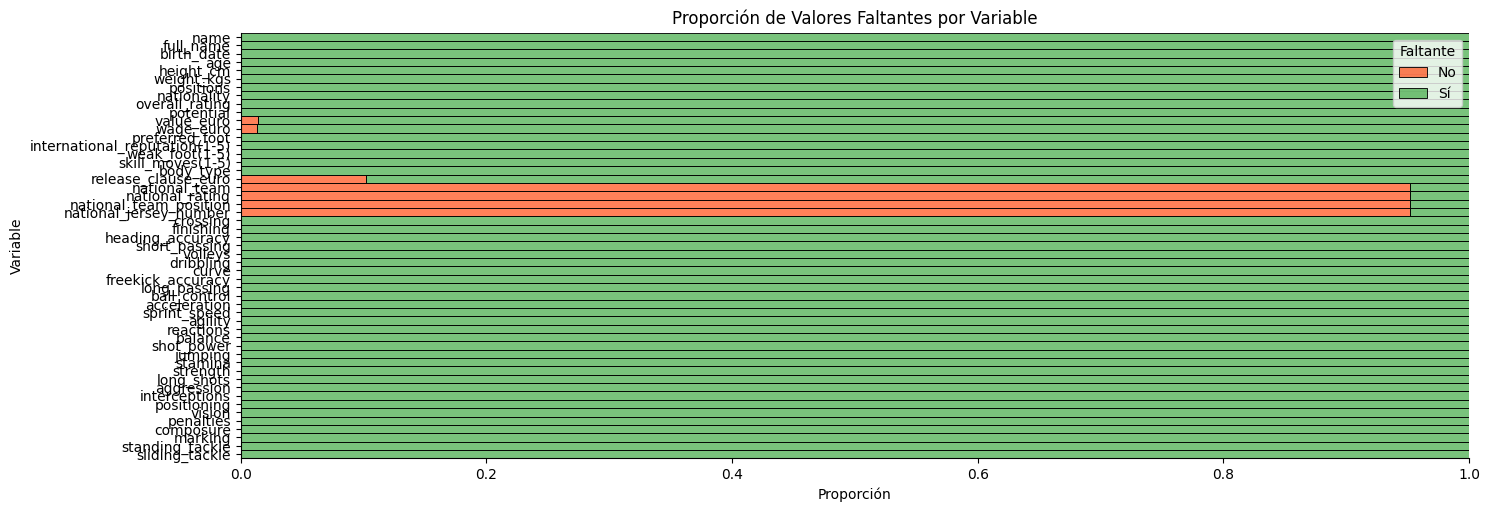

In [43]:
(
    data
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=3,
                height=5,
                palette=['#4CAF50', '#FF5722'],
                legend=False
            )
        )
    )
)

# Mejorar la visualización
plt.title('Proporción de Valores Faltantes por Variable')
plt.xlabel('Proporción')
plt.ylabel('Variable')
plt.legend(title='Faltante', labels=['No', 'Sí'], loc='upper right')
plt.show()

# Ponemos un umbral del 10% para datos faltanes porque las etiquetas correspondientes a los datos no son relevantes para un modelo de machinea learning, número de camiseta en la selección de futbol nacional, posición o selección de futbol en la que sería convocado no afectan nuestro modelo. 

In [18]:
# Paso 1: Calcular el umbral (por ejemplo, permitir un máximo del 50% de valores faltantes)
umbral = len(data) * 0.1

# Paso 2: Eliminar las columnas que tienen más del 50% de valores faltantes
data_filtrada = data.dropna(axis=1, thresh=umbral)

In [19]:
print("\nDataFrame después de eliminar columnas con más del 50% de valores faltantes:")
print(data_filtrada)


DataFrame después de eliminar columnas con más del 50% de valores faltantes:
                 name                         full_name birth_date  age  \
0            L. Messi    Lionel Andrés Messi Cuccittini  6/24/1987   31   
1          C. Eriksen      Christian  Dannemann Eriksen  2/14/1992   27   
2            P. Pogba                        Paul Pogba  3/15/1993   25   
3          L. Insigne                   Lorenzo Insigne   6/4/1991   27   
4        K. Koulibaly                 Kalidou Koulibaly  6/20/1991   27   
...               ...                               ...        ...  ...   
17949     R. McKenzie                    Rory  McKenzie  10/7/1993   25   
17950       M. Sipľak                     Michal Sipľak   2/2/1996   23   
17951      J. Bekkema                       Jan Bekkema   4/9/1996   22   
17952      A. Al Yami               Abdulrahman Al Yami  6/19/1997   21   
17953  Júnior Brumado  José Francisco dos Santos Júnior  5/15/1999   19   

       height_cm  wei

DataFrame original:
                 name                         full_name birth_date  age  \
0            L. Messi    Lionel Andrés Messi Cuccittini  6/24/1987   31   
1          C. Eriksen      Christian  Dannemann Eriksen  2/14/1992   27   
2            P. Pogba                        Paul Pogba  3/15/1993   25   
3          L. Insigne                   Lorenzo Insigne   6/4/1991   27   
4        K. Koulibaly                 Kalidou Koulibaly  6/20/1991   27   
...               ...                               ...        ...  ...   
17949     R. McKenzie                    Rory  McKenzie  10/7/1993   25   
17950       M. Sipľak                     Michal Sipľak   2/2/1996   23   
17951      J. Bekkema                       Jan Bekkema   4/9/1996   22   
17952      A. Al Yami               Abdulrahman Al Yami  6/19/1997   21   
17953  Júnior Brumado  José Francisco dos Santos Júnior  5/15/1999   19   

       height_cm  weight_kgs  positions   nationality  overall_rating  \
0     

/tmp/ipykernel_18957/1778751635.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y=missing_data.values, palette='viridis')


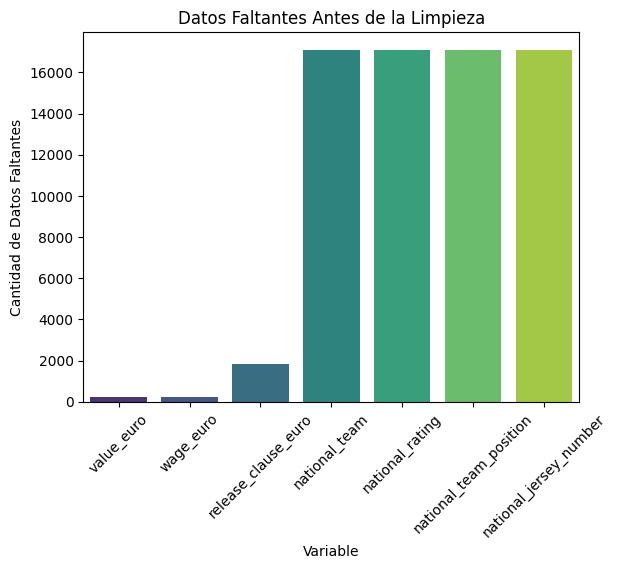


DataFrame después de eliminar columnas con más del 50% de valores faltantes:
                 name                         full_name birth_date  age  \
0            L. Messi    Lionel Andrés Messi Cuccittini  6/24/1987   31   
1          C. Eriksen      Christian  Dannemann Eriksen  2/14/1992   27   
2            P. Pogba                        Paul Pogba  3/15/1993   25   
3          L. Insigne                   Lorenzo Insigne   6/4/1991   27   
4        K. Koulibaly                 Kalidou Koulibaly  6/20/1991   27   
...               ...                               ...        ...  ...   
17949     R. McKenzie                    Rory  McKenzie  10/7/1993   25   
17950       M. Sipľak                     Michal Sipľak   2/2/1996   23   
17951      J. Bekkema                       Jan Bekkema   4/9/1996   22   
17952      A. Al Yami               Abdulrahman Al Yami  6/19/1997   21   
17953  Júnior Brumado  José Francisco dos Santos Júnior  5/15/1999   19   

       height_cm  wei

/tmp/ipykernel_18957/1778751635.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y=missing_data.values, palette='viridis')


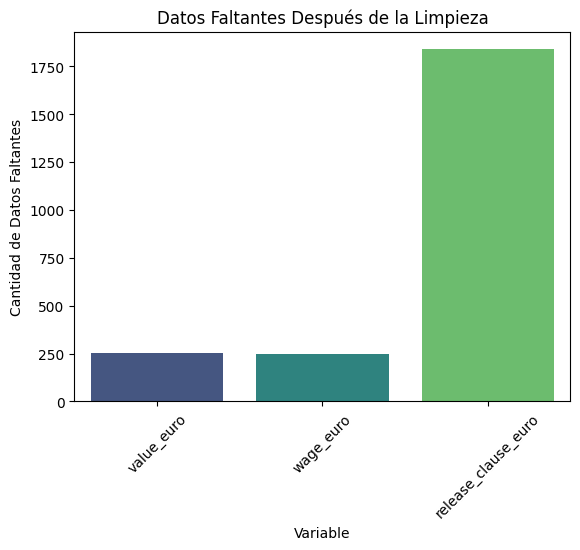

In [21]:
def plot_missing_data(data, title):
    missing_data = data.isnull().sum()
    missing_data = missing_data[missing_data > 0]  # Filtrar columnas con datos faltantes
    sns.barplot(x=missing_data.index, y=missing_data.values, palette='viridis')
    plt.xticks(rotation=45)
    plt.xlabel('Variable')
    plt.ylabel('Cantidad de Datos Faltantes')
    plt.title(title)
    plt.show()

# Mostrar el DataFrame original
print("DataFrame original:")
print(data)

# Graficar datos faltantes antes de la limpieza
plot_missing_data(data, 'Datos Faltantes Antes de la Limpieza')

# Calcular el umbral para eliminar columnas con más del 50% de valores faltantes
umbral = len(data) * 0.5

# Eliminar las columnas que tienen más del 50% de valores faltantes
data_filtrada = data.dropna(axis=1, thresh=umbral)

# Mostrar el DataFrame filtrado
print("\nDataFrame después de eliminar columnas con más del 50% de valores faltantes:")
print(data_filtrada)

# Graficar datos faltantes después de la limpieza
plot_missing_data(data_filtrada, 'Datos Faltantes Después de la Limpieza')

#Analizo el valor del mercado para entender si sirve de algo, pero vemos que tiene una varización muy grande, así que no haremos un analisis profundo de esa variable. 

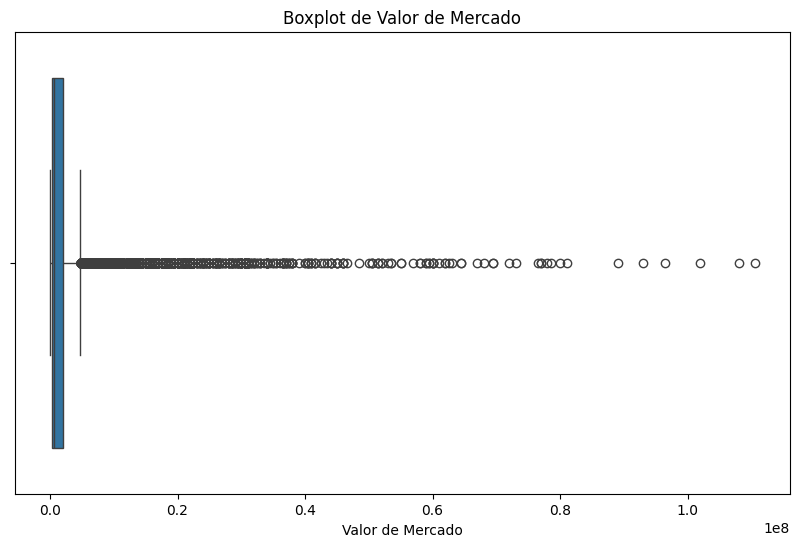

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='value_euro')  # Ajusta el nombre de la columna aquí
plt.title('Boxplot de Valor de Mercado')
plt.xlabel('Valor de Mercado')
plt.show()

In [44]:
categorical_cols = data.select_dtypes(include='object').columns
print("Columnas categóricas:", categorical_cols)

Columnas categóricas: Index(['name', 'full_name', 'birth_date', 'positions', 'nationality',
       'preferred_foot', 'body_type', 'national_team',
       'national_team_position'],
      dtype='object')


In [45]:
# Calcular la cardinalidad de cada variable categórica
cardinality = {col: data[col].nunique() for col in categorical_cols}
print("Cardinalidad de variables categóricas:")
for col, count in cardinality.items():
    print(f"{col}: {count} valores únicos")


Cardinalidad de variables categóricas:
name: 16995 valores únicos
full_name: 17898 valores únicos
birth_date: 6156 valores únicos
positions: 890 valores únicos
nationality: 160 valores únicos
preferred_foot: 2 valores únicos
body_type: 10 valores únicos
national_team: 103 valores únicos
national_team_position: 29 valores únicos


In [46]:
# Definir un umbral para alta cardinalidad
threshold = 50

# Filtrar variables con alta cardinalidad
high_cardinality_vars = {col: count for col, count in cardinality.items() if count > threshold}
print("Variables categóricas con alta cardinalidad:")
for col, count in high_cardinality_vars.items():
    print(f"{col}: {count} valores únicos")

Variables categóricas con alta cardinalidad:
name: 16995 valores únicos
full_name: 17898 valores únicos
birth_date: 6156 valores únicos
positions: 890 valores únicos
nationality: 160 valores únicos
national_team: 103 valores únicos


In [47]:
print(data.columns)


Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')


# Se hace un histograma para ver la distribución de las edades de los jugadores de futbol

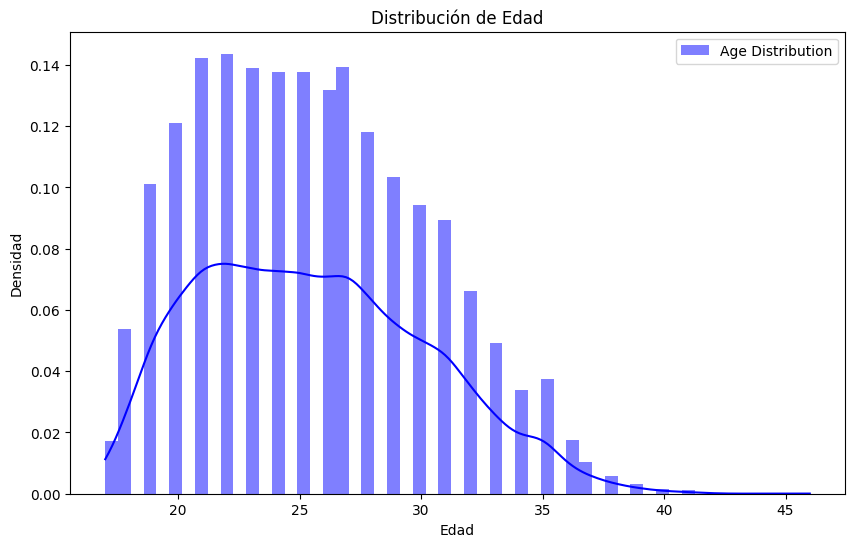

In [49]:
if 'age' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['age'].dropna(), color="blue", label="Age Distribution", kde=True, stat="density", linewidth=0)
    
    # Añadir título y etiquetas
    plt.title('Distribución de Edad')
    plt.xlabel('Edad')
    plt.ylabel('Densidad')
    
    # Mostrar la leyenda
    plt.legend()
    
    # Mostrar el gráfico
    plt.show()


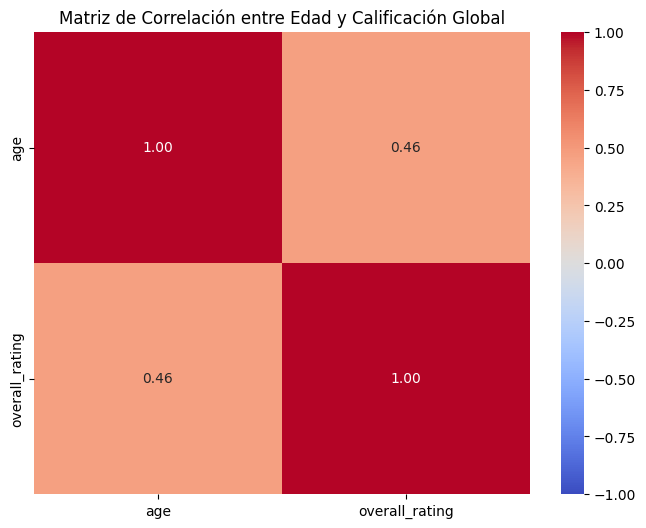

In [50]:
if 'age' in data.columns and 'overall_rating' in data.columns:
    # Seleccionar las columnas relevantes
    subset = data[['age', 'overall_rating']].dropna()  # Elimina filas con valores nulos

    # Calcular la matriz de correlación
    corr = subset.corr()

    # Crear el gráfico de calor
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
    
    # Añadir título
    plt.title('Matriz de Correlación entre Edad y Calificación Global')
    
    # Mostrar el gráfico
    plt.show()

# Se hace una grafica Q-Q para validar si es o no una distribución normal la edad e los jugadores de futbol

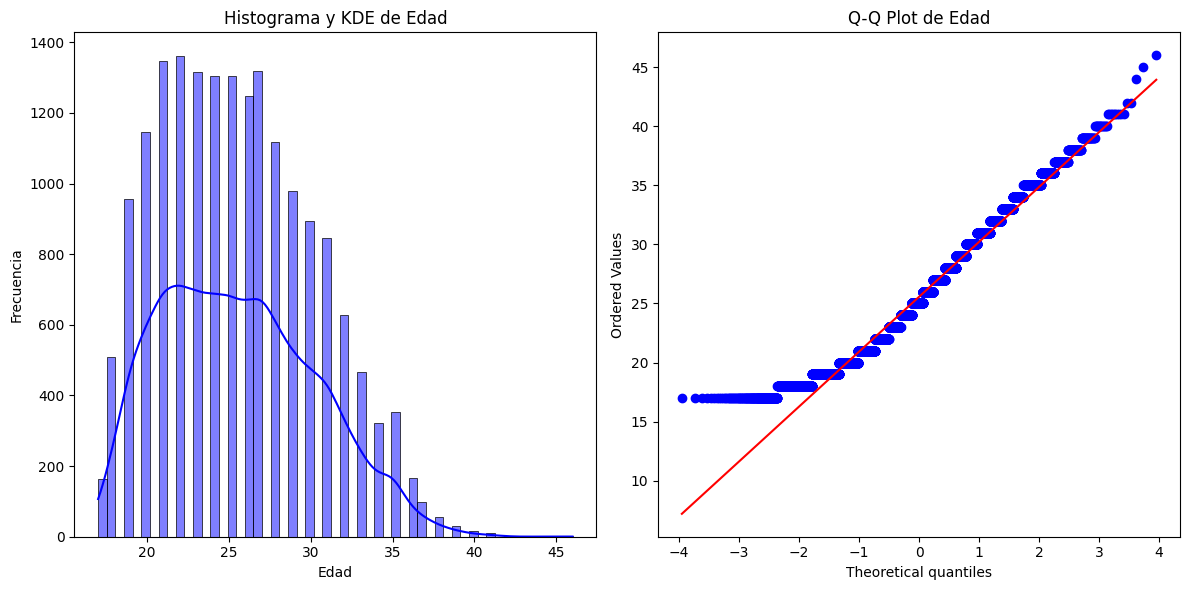

Estadísticas Descriptivas de la Edad:
count    17954.000000
mean        25.565445
std          4.705708
min         17.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         46.000000
Name: age, dtype: float64

Shapiro-Wilk Test de Normalidad:
Estadístico: 0.9739926681778378
Valor p: 2.4890968567364548e-48
La distribución de 'age' no parece ser normal (se rechaza la hipótesis nula).


/home/jose/Charry_Melo_Jose-Gerardo_Proyecto/venv1/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17954.
  res = hypotest_fun_out(*samples, **kwds)


In [52]:
import scipy.stats as stats
if 'age' in data.columns:
    # Elimina valores nulos
    age_data = data['age'].dropna()

    # Visualización Gráfica
    plt.figure(figsize=(12, 6))

    # Histograma y KDE
    plt.subplot(1, 2, 1)
    sns.histplot(age_data, kde=True, color="blue")
    plt.title('Histograma y KDE de Edad')
    plt.xlabel('Edad')
    plt.ylabel('Frecuencia')

    # Q-Q plot para verificar normalidad
    plt.subplot(1, 2, 2)
    stats.probplot(age_data, dist="norm", plot=plt)
    plt.title('Q-Q Plot de Edad')

    plt.tight_layout()
    plt.show()

    # Análisis Estadístico
    print("Estadísticas Descriptivas de la Edad:")
    print(age_data.describe())

    # Test de Normalidad (Shapiro-Wilk)
    stat, p_value = stats.shapiro(age_data)
    print("\nShapiro-Wilk Test de Normalidad:")
    print(f"Estadístico: {stat}")
    print(f"Valor p: {p_value}")

    if p_value > 0.05:
        print("La distribución de 'age' parece ser normal (no se rechaza la hipótesis nula).")
    else:
        print("La distribución de 'age' no parece ser normal (se rechaza la hipótesis nula).")

else:
    print("La columna 'age' no existe en el DataFrame.")

# Se hace un grafico de dispersión para encontrar la relación de la edad de los jugadores con un puntaje de desemepeño

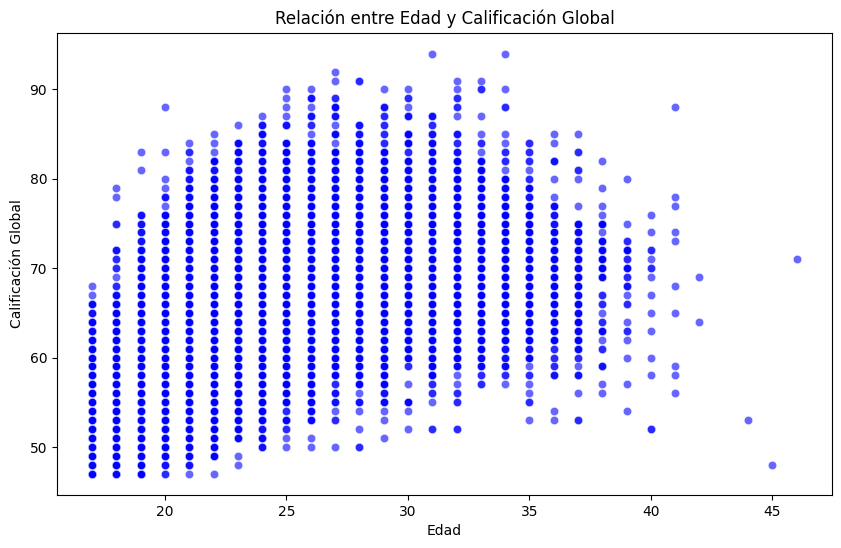

In [53]:
# Verifica que las columnas 'age' y 'overall_rating' existen en el DataFrame
if 'age' in data.columns and 'overall_rating' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='age', y='overall_rating', color='blue', alpha=0.6)
    
    # Añadir título y etiquetas
    plt.title('Relación entre Edad y Calificación Global')
    plt.xlabel('Edad')
    plt.ylabel('Calificación Global')
    
    # Mostrar el gráfico
    plt.show()


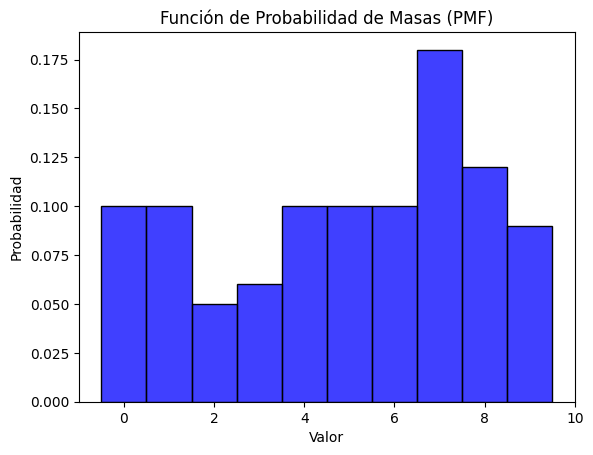

In [54]:
data = np.random.randint(0, 10, size=100)

# Cálculo de la PMF
sns.histplot(data, discrete=True, stat='probability', kde=False, color='blue', bins=np.arange(-0.5, 10, 1))

# Añadir título y etiquetas
plt.title('Función de Probabilidad de Masas (PMF)')
plt.xlabel('Valor')
plt.ylabel('Probabilidad')
plt.show()

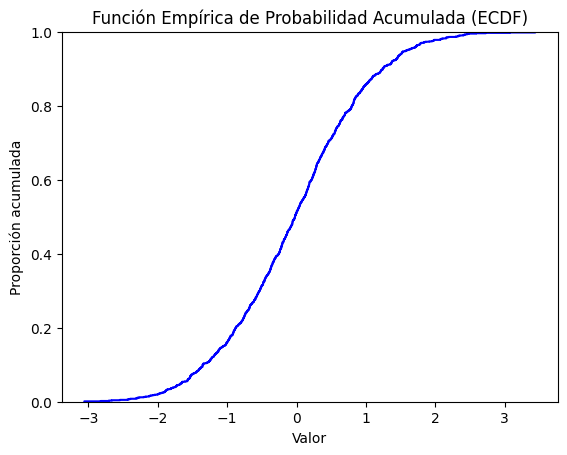

In [55]:
data = np.random.normal(loc=0, scale=1, size=1000)

# Cálculo de la ECDF
sns.ecdfplot(data, color='blue')

# Añadir título y etiquetas
plt.title('Función Empírica de Probabilidad Acumulada (ECDF)')
plt.xlabel('Valor')
plt.ylabel('Proporción acumulada')
plt.show()

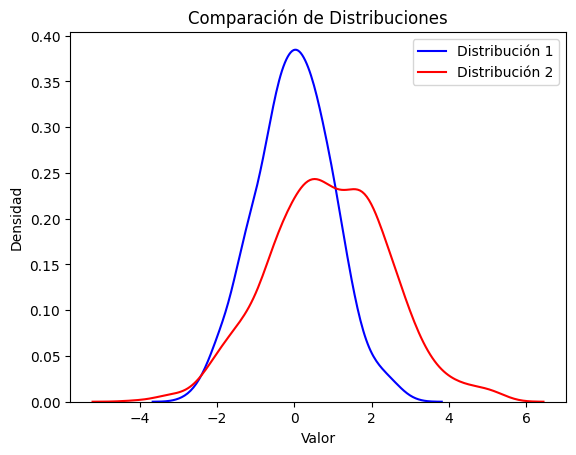

In [56]:
data1 = np.random.normal(loc=0, scale=1, size=1000)
data2 = np.random.normal(loc=1, scale=1.5, size=1000)

# Crear un DataFrame para la comparación
import pandas as pd
df = pd.DataFrame({'data1': data1, 'data2': data2})

# Comparar distribuciones
sns.kdeplot(df['data1'], color='blue', label='Distribución 1', fill=False)
sns.kdeplot(df['data2'], color='red', label='Distribución 2', fill=False)

# Añadir título y etiquetas
plt.title('Comparación de Distribuciones')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

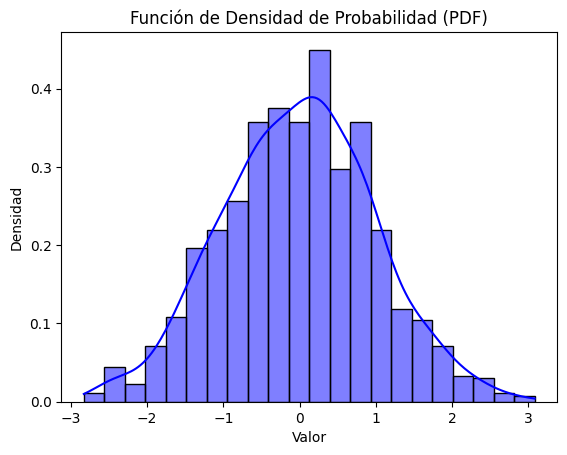

In [57]:
data = np.random.normal(loc=0, scale=1, size=1000)

# Calcular y visualizar la PDF
sns.histplot(data, kde=True, stat='density', color='blue')

# Añadir título y etiquetas
plt.title('Función de Densidad de Probabilidad (PDF)')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


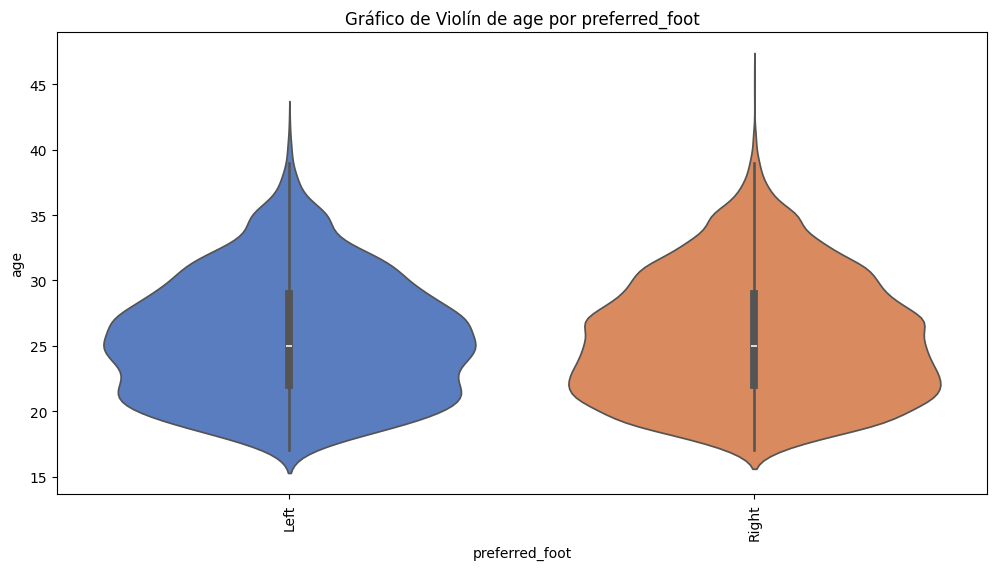

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


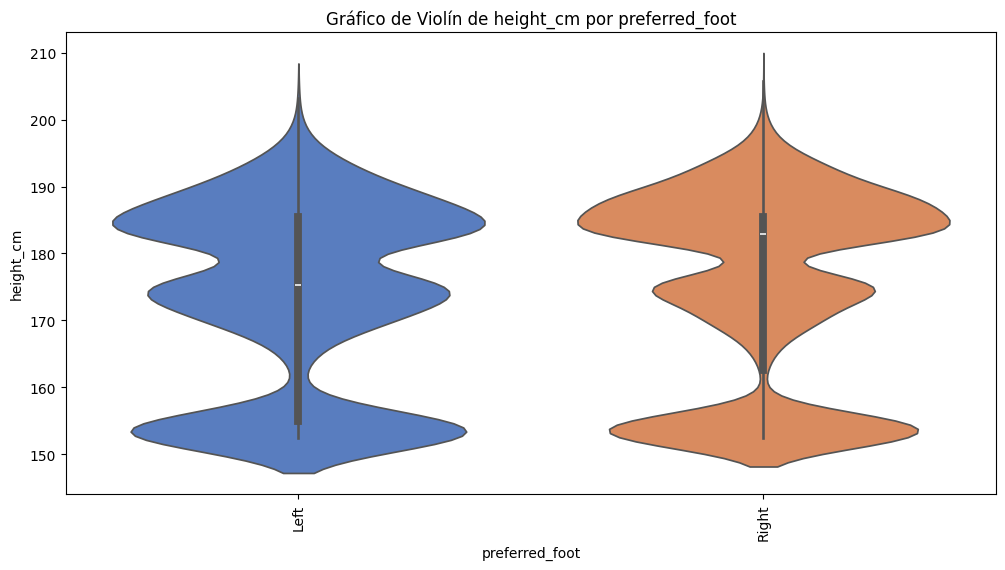

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


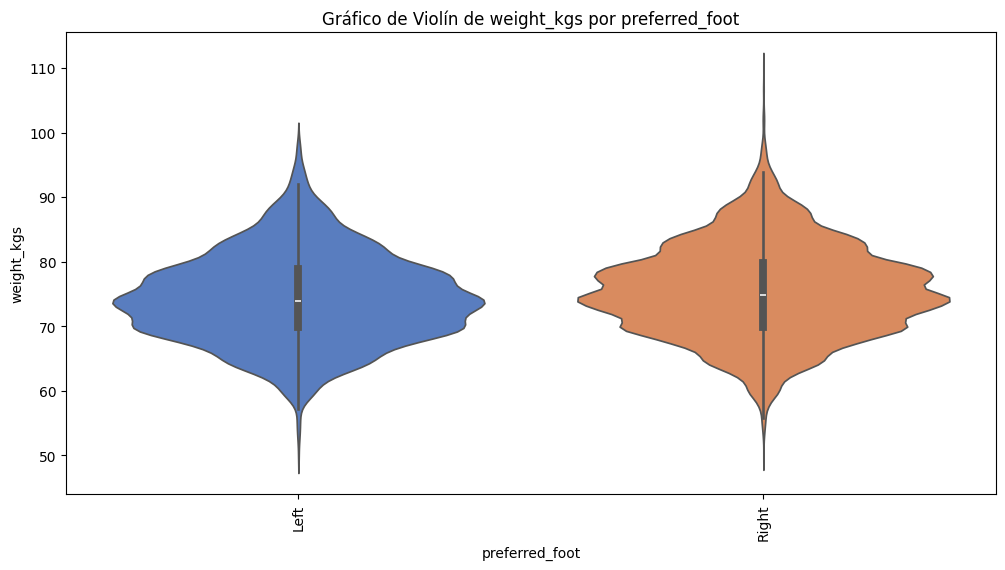

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


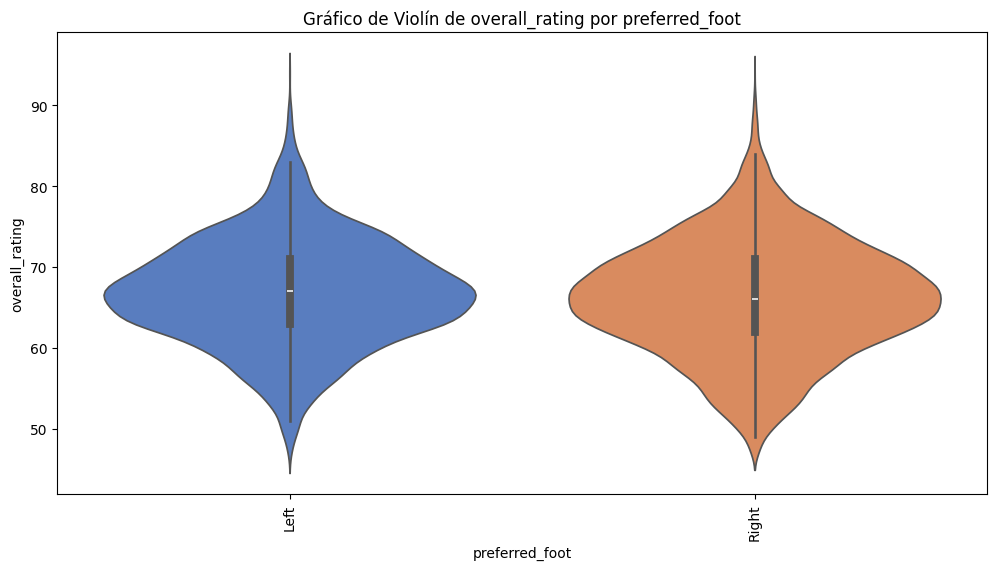

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


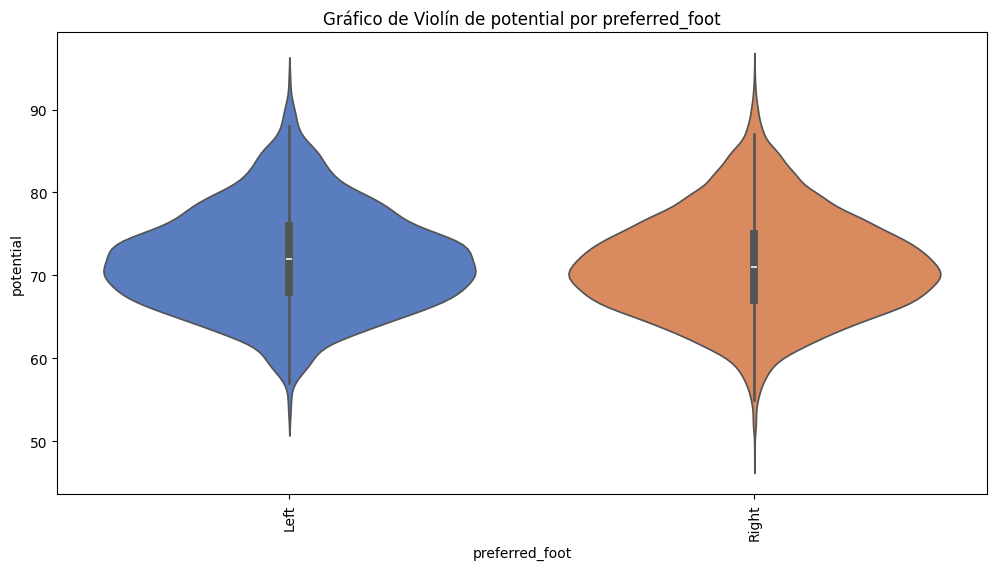

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


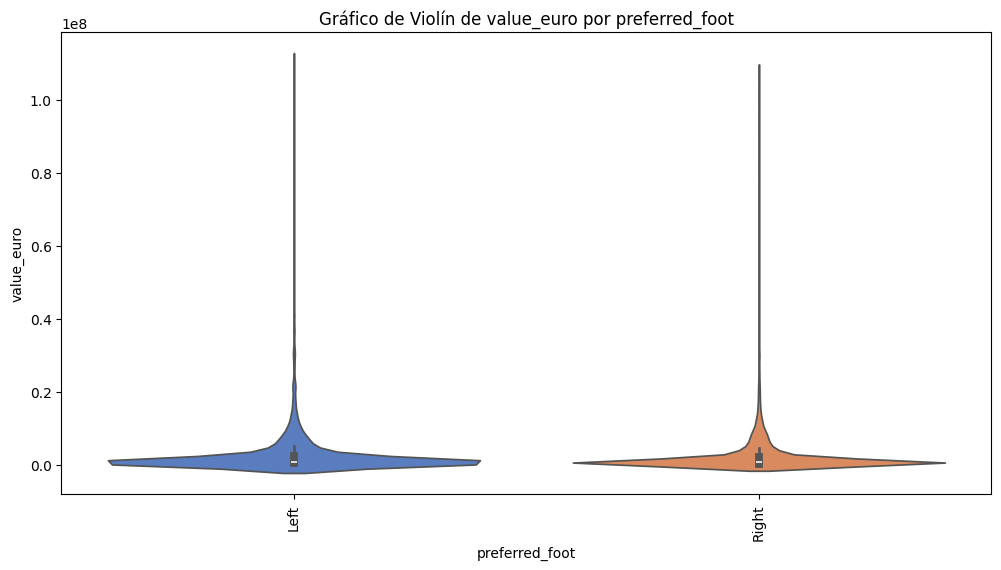

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


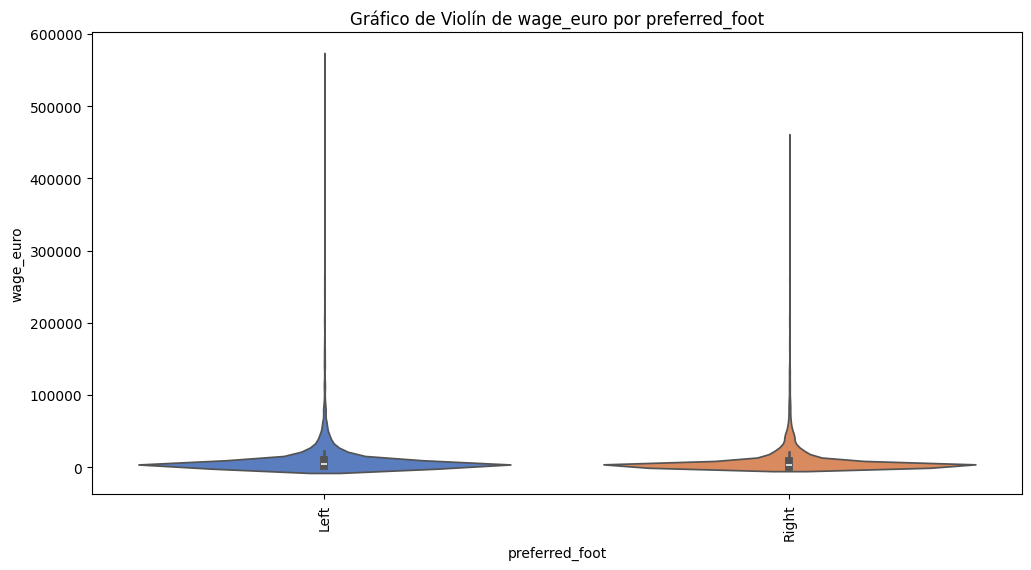

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


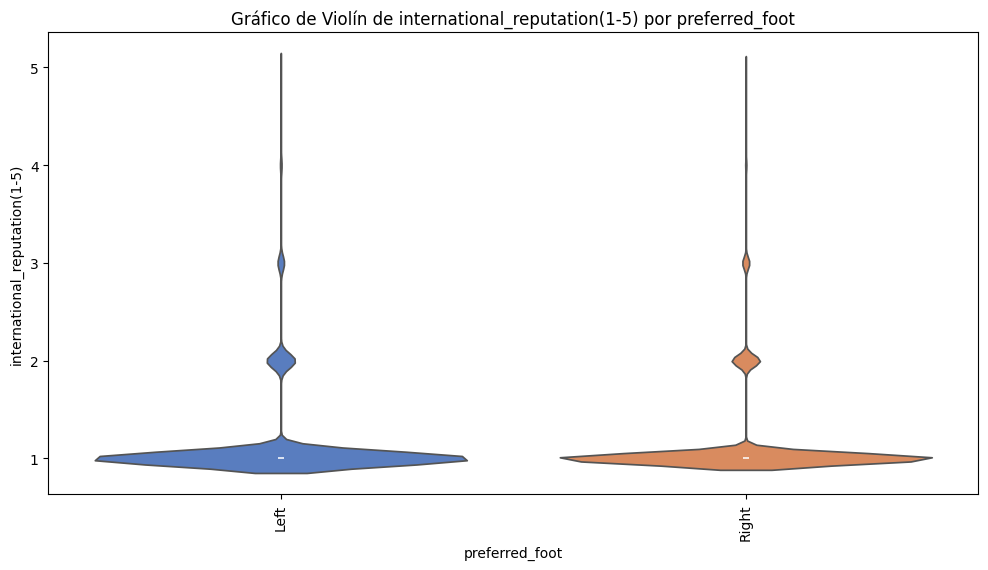

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


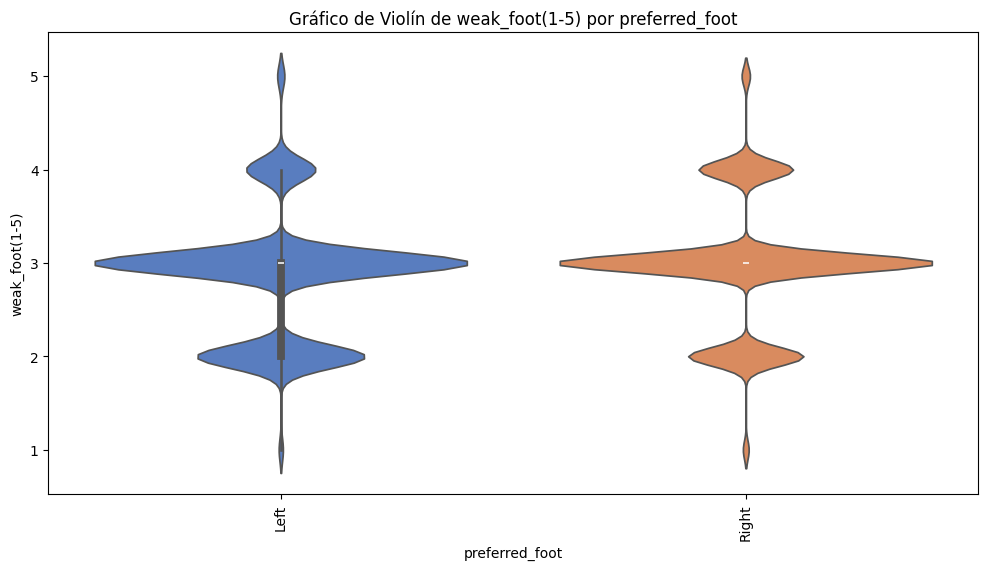

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


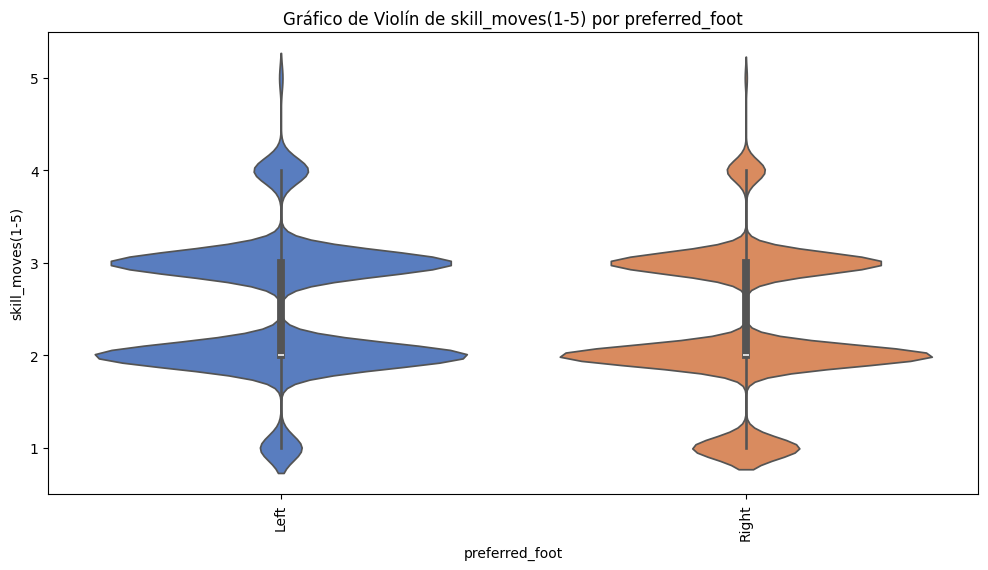

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


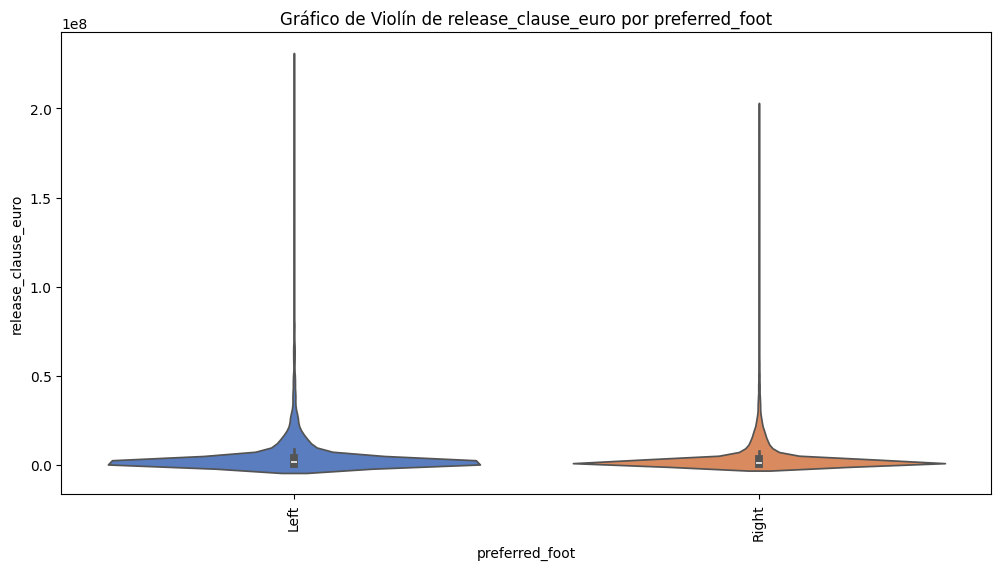

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


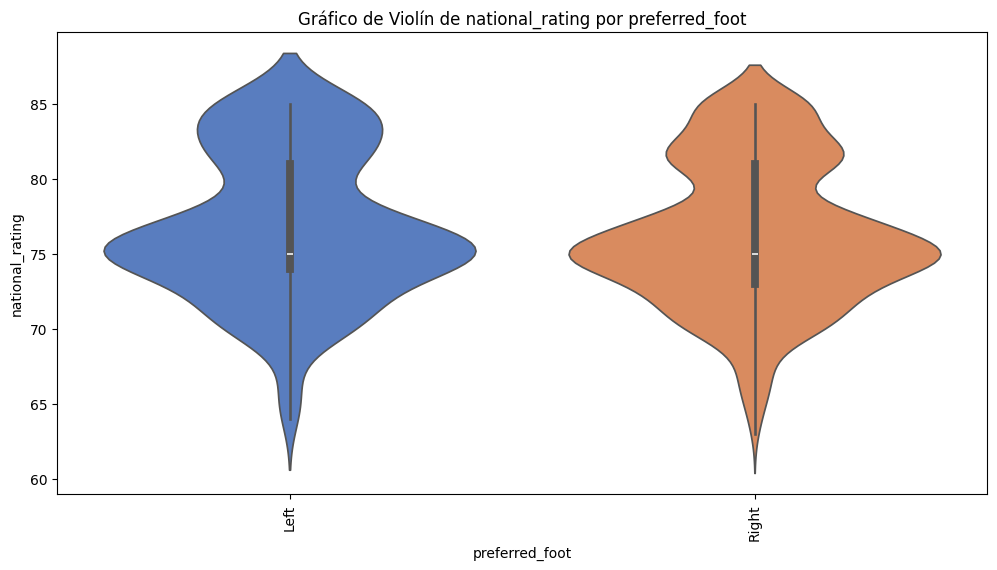

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


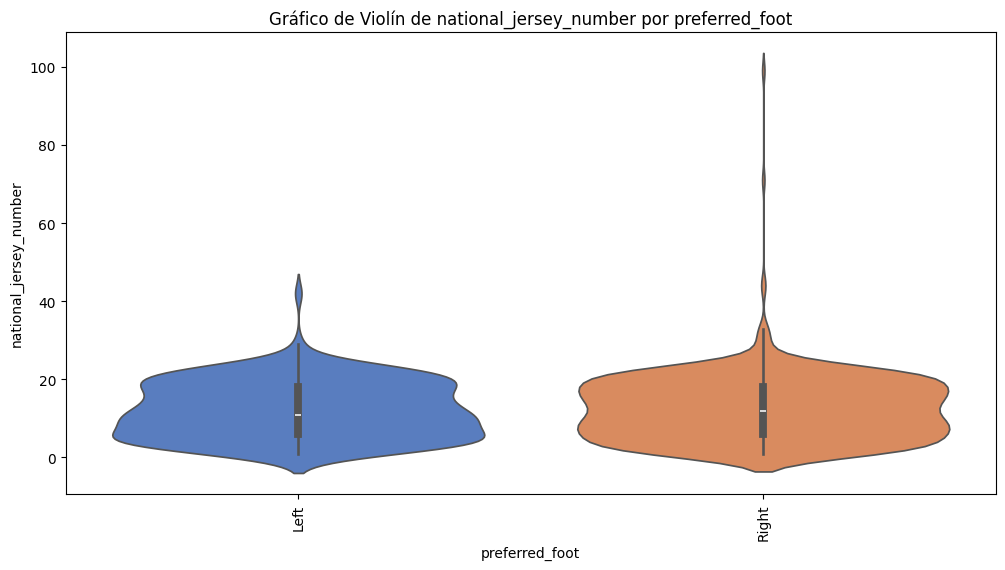

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


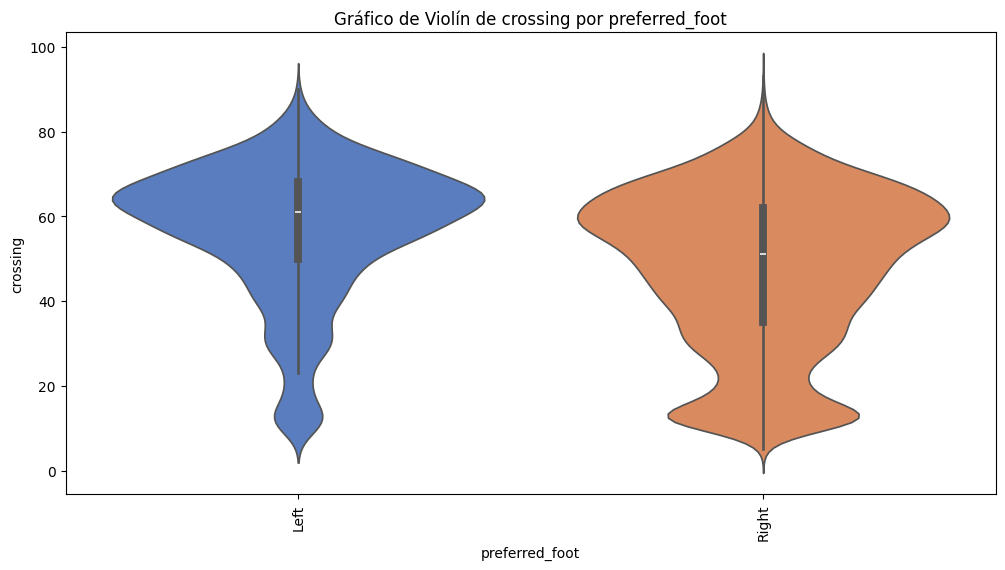

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


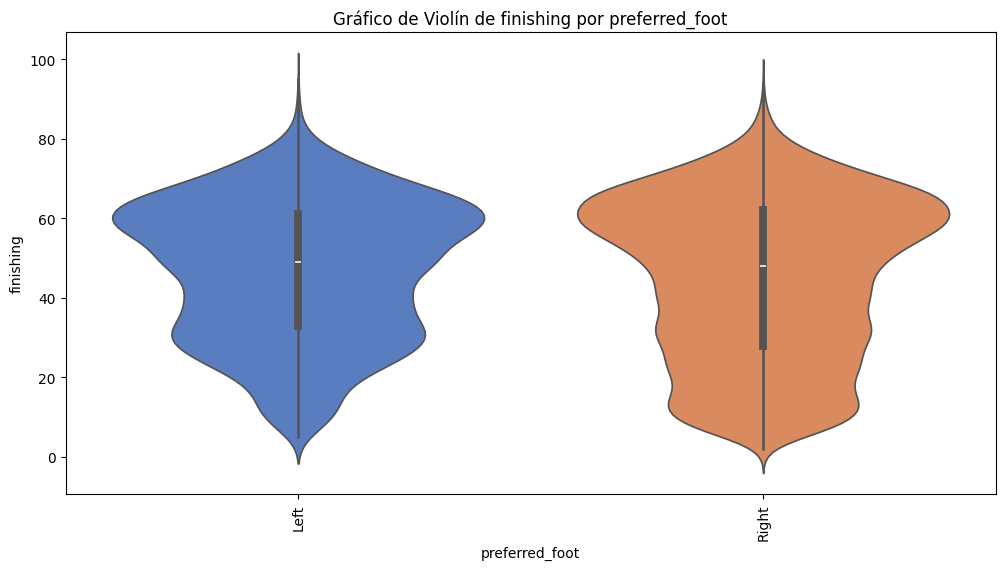

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


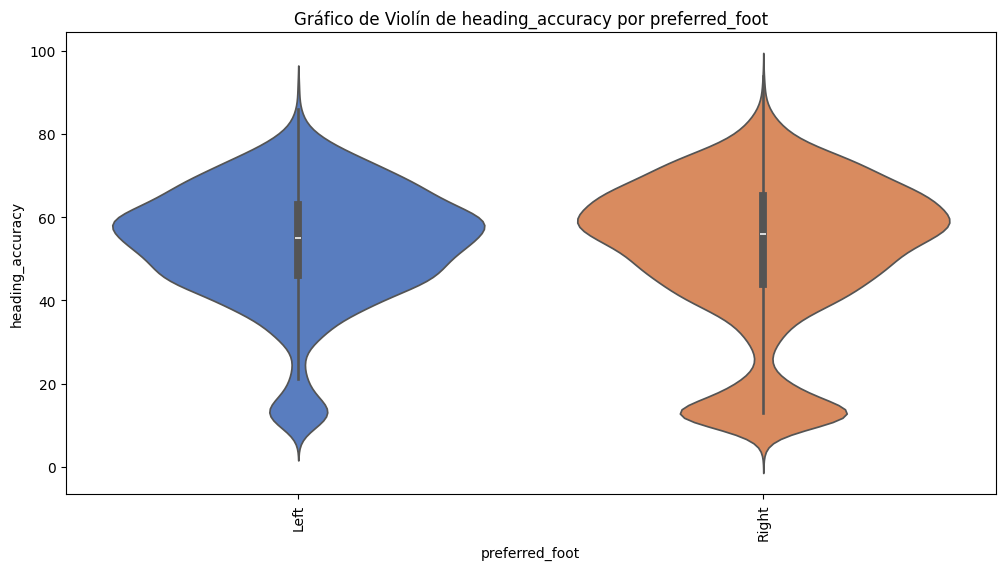

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


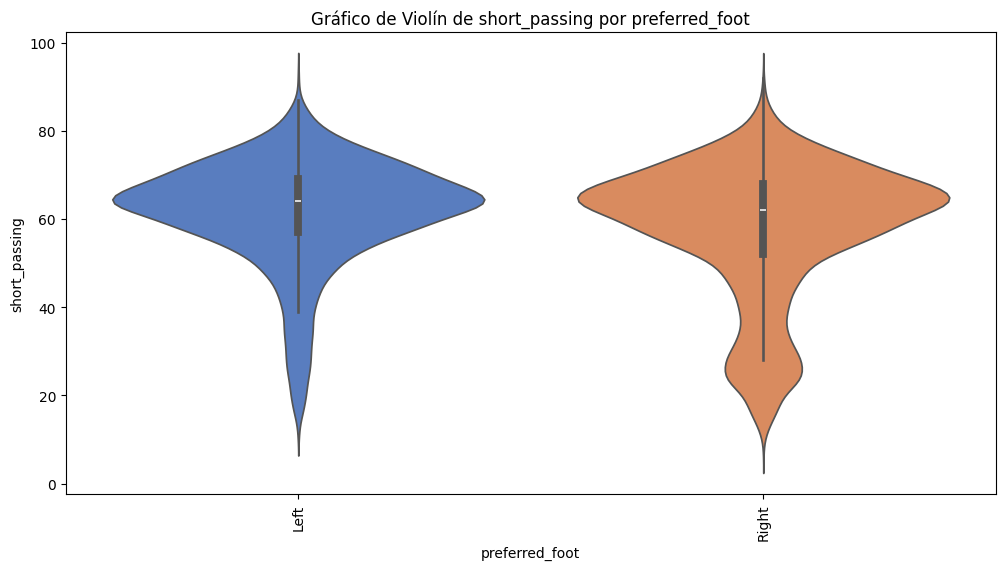

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


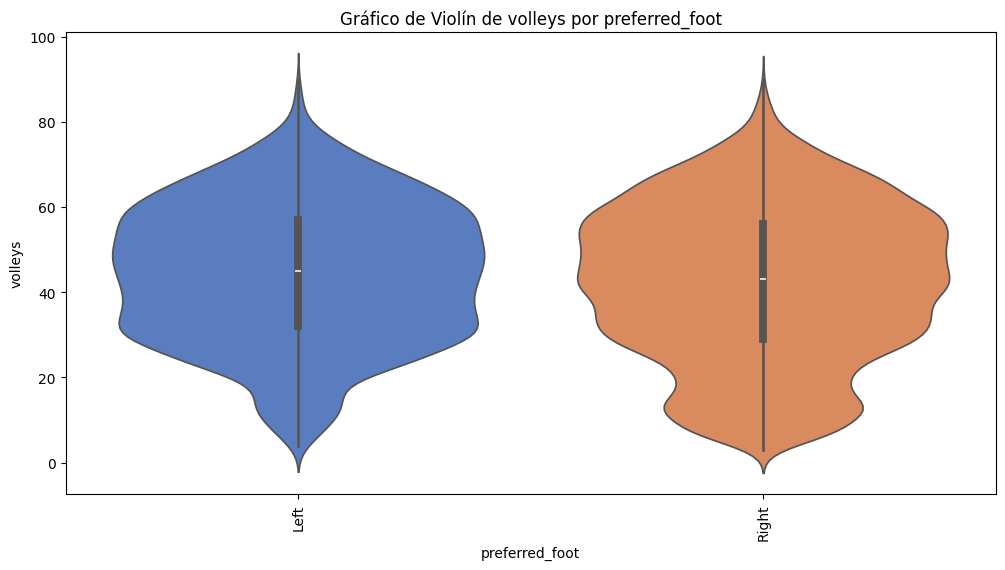

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


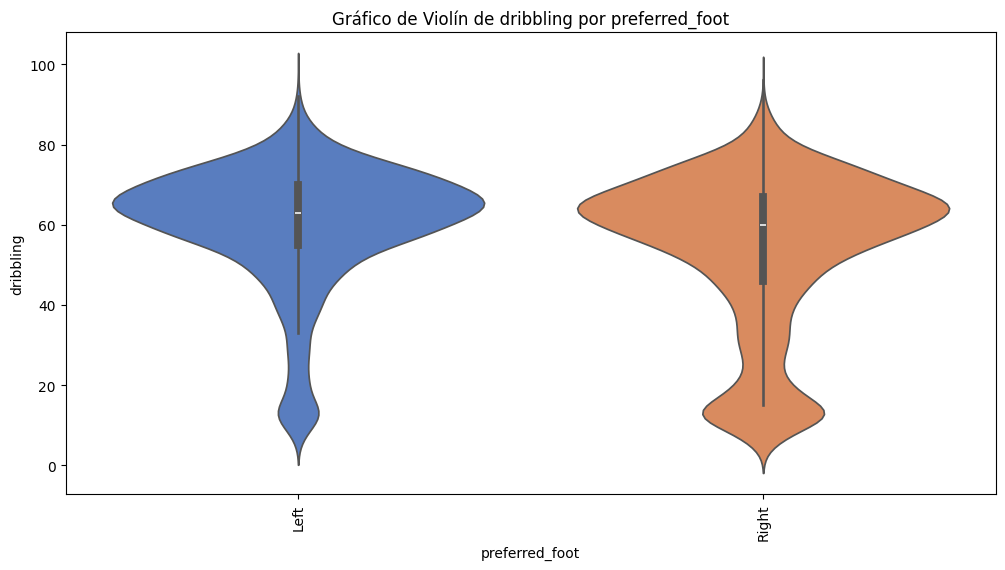

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


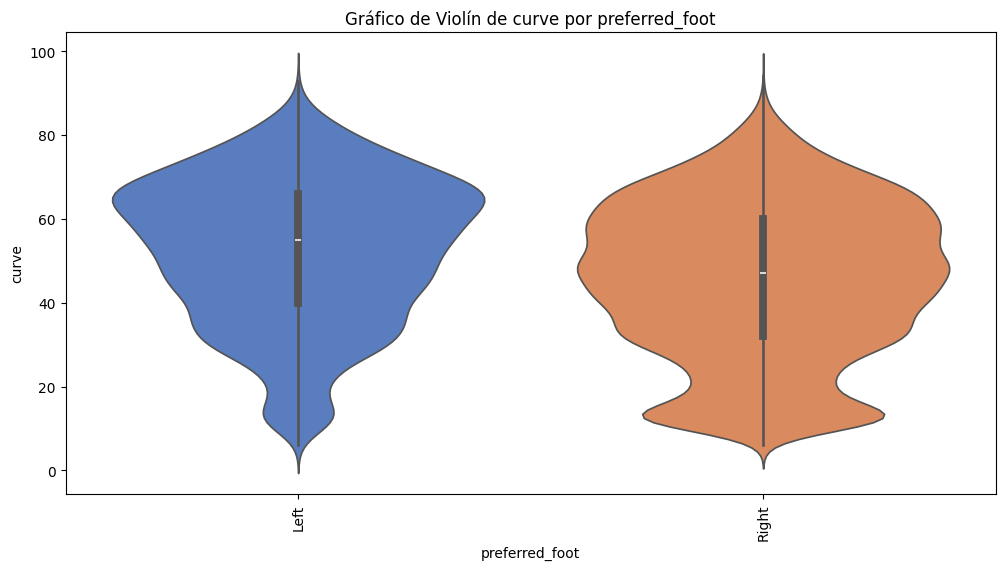

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


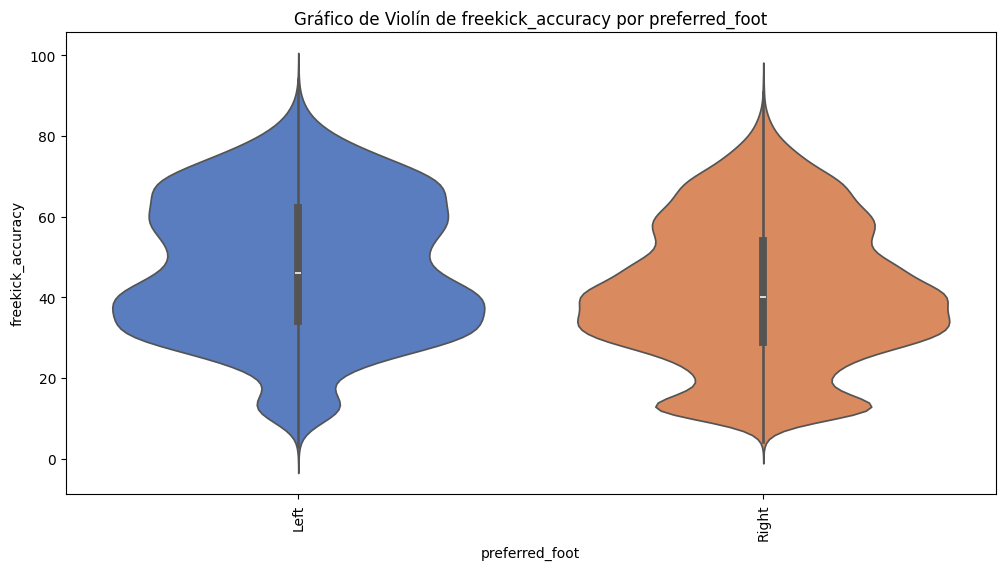

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


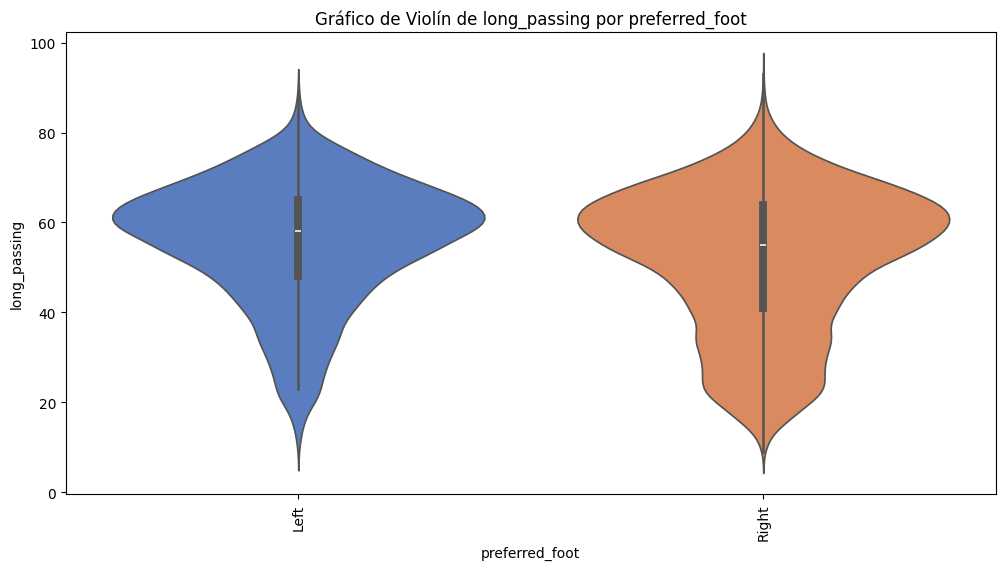

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


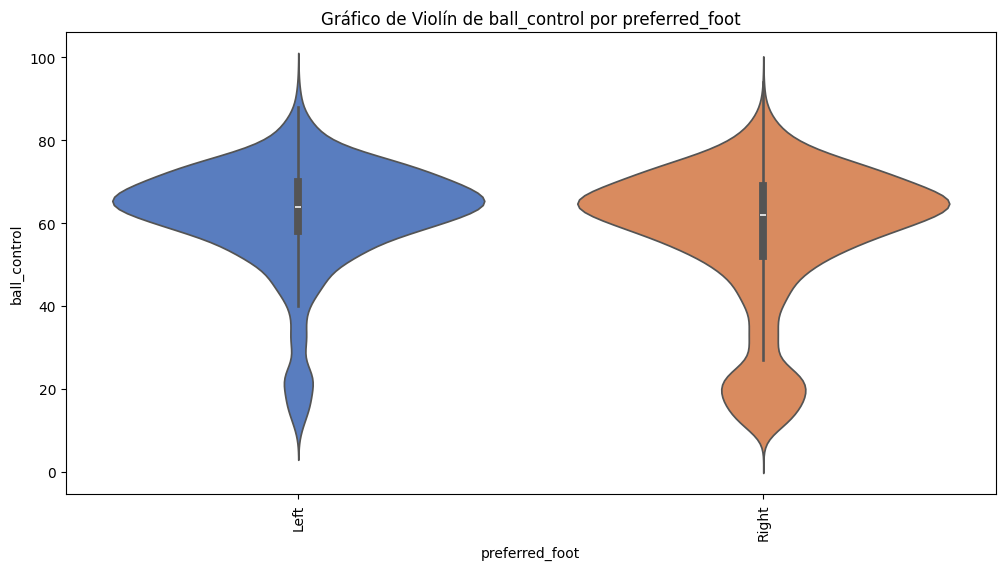

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


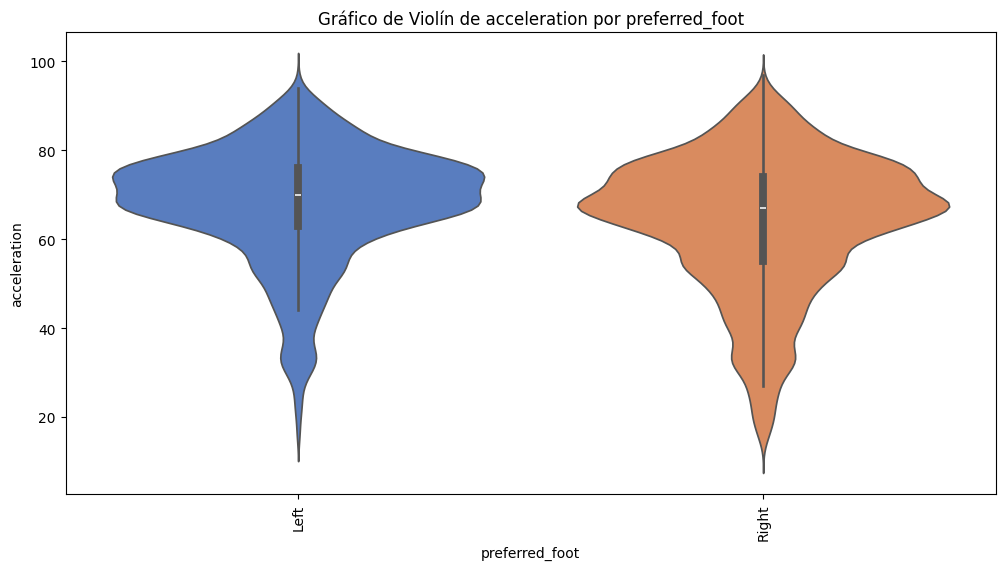

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


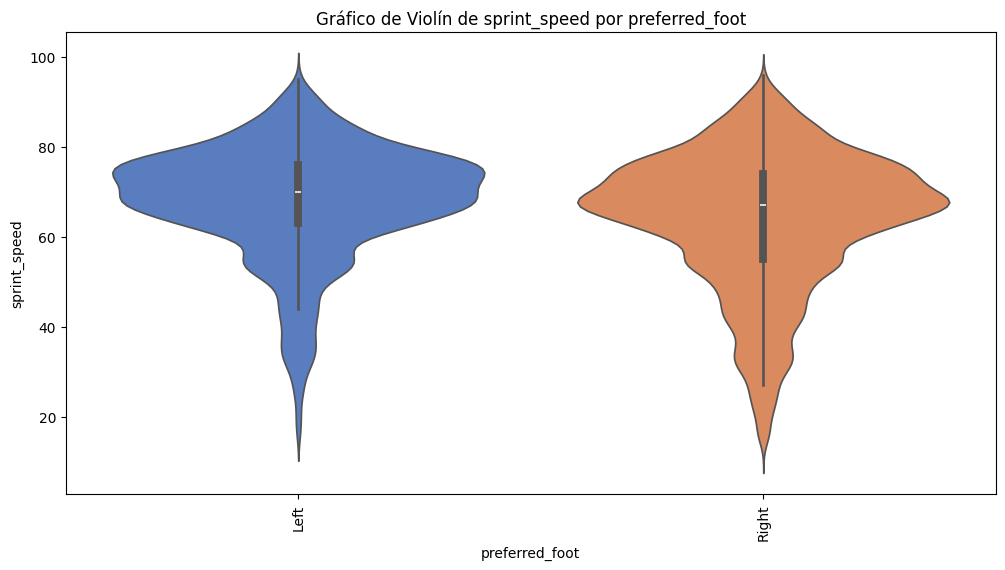

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


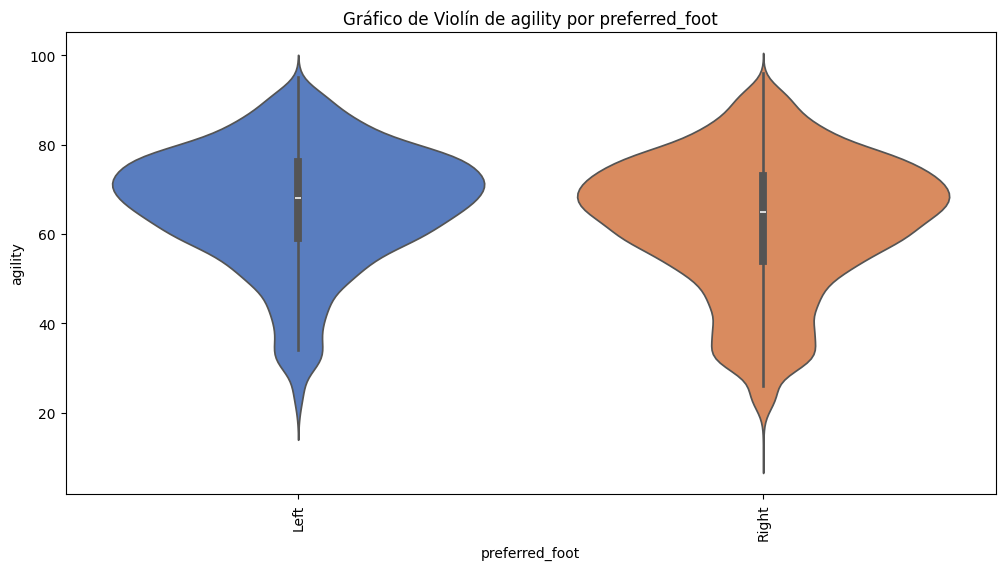

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


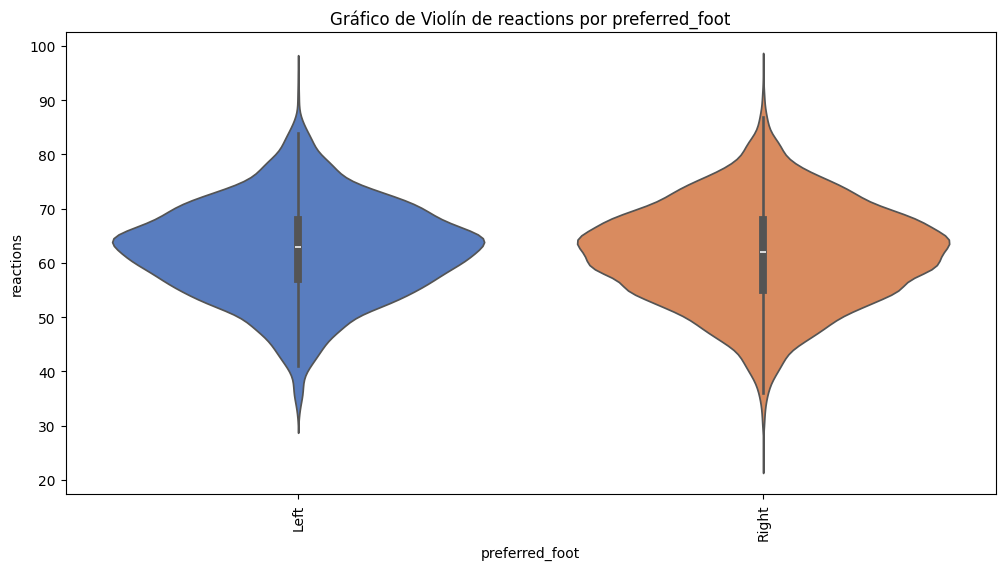

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


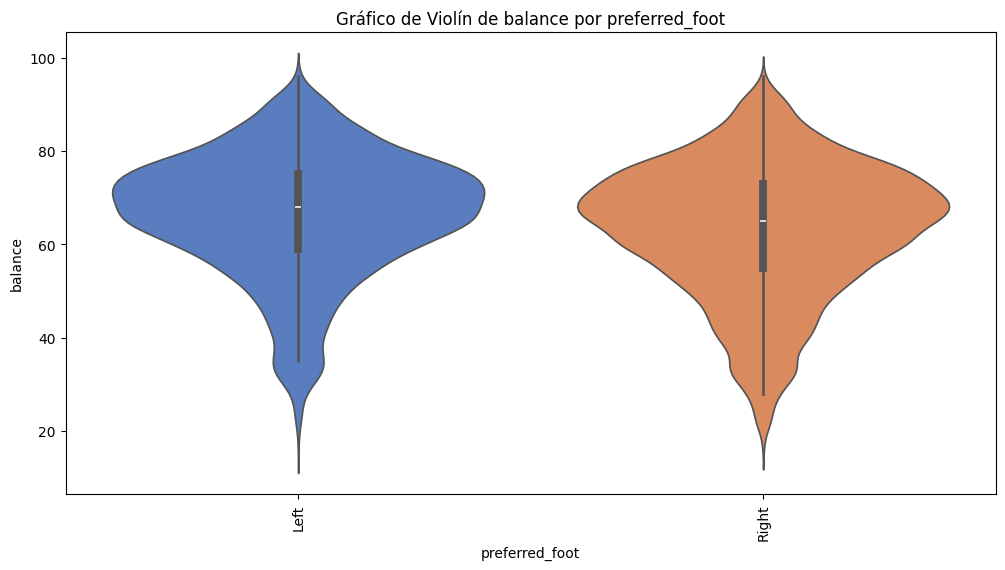

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


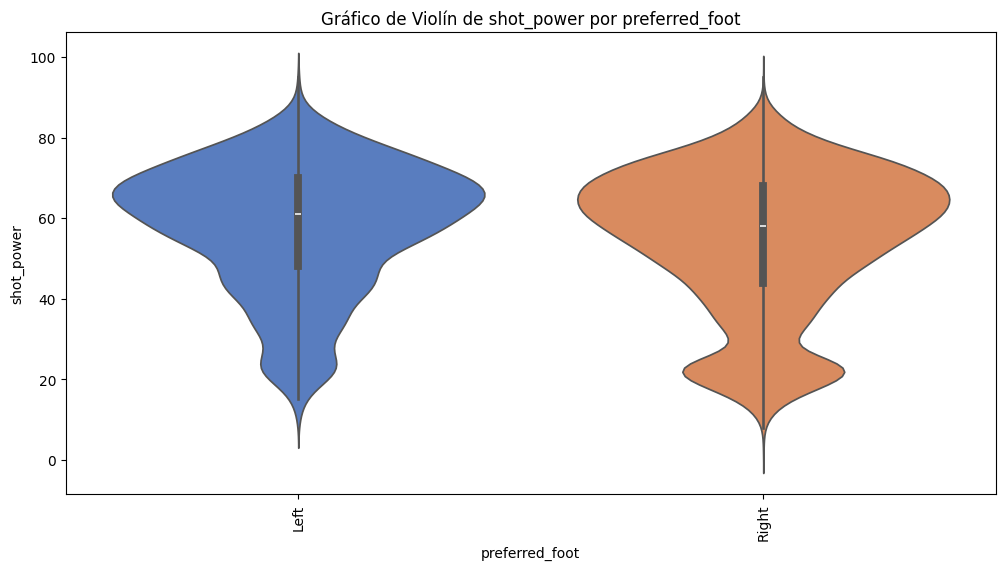

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


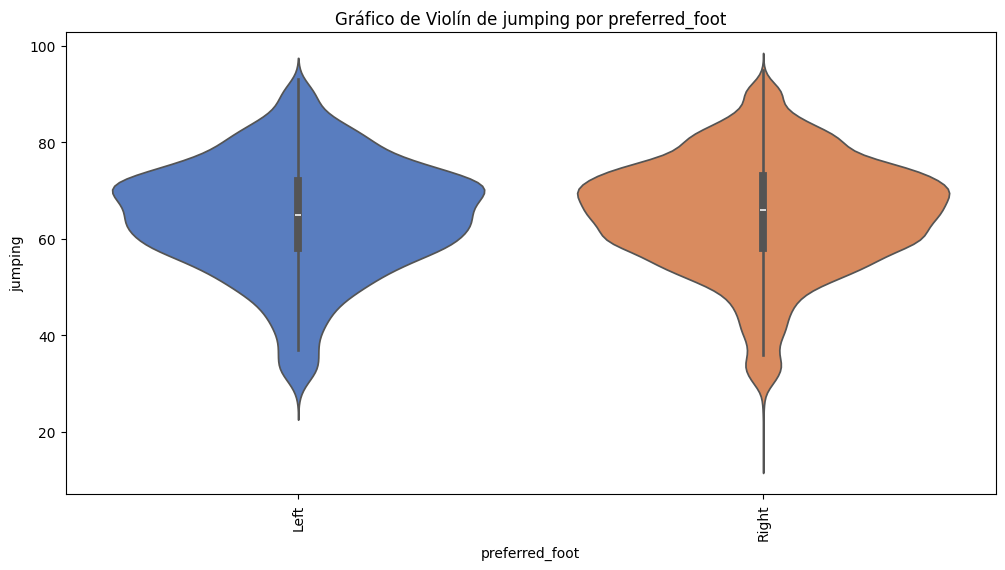

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


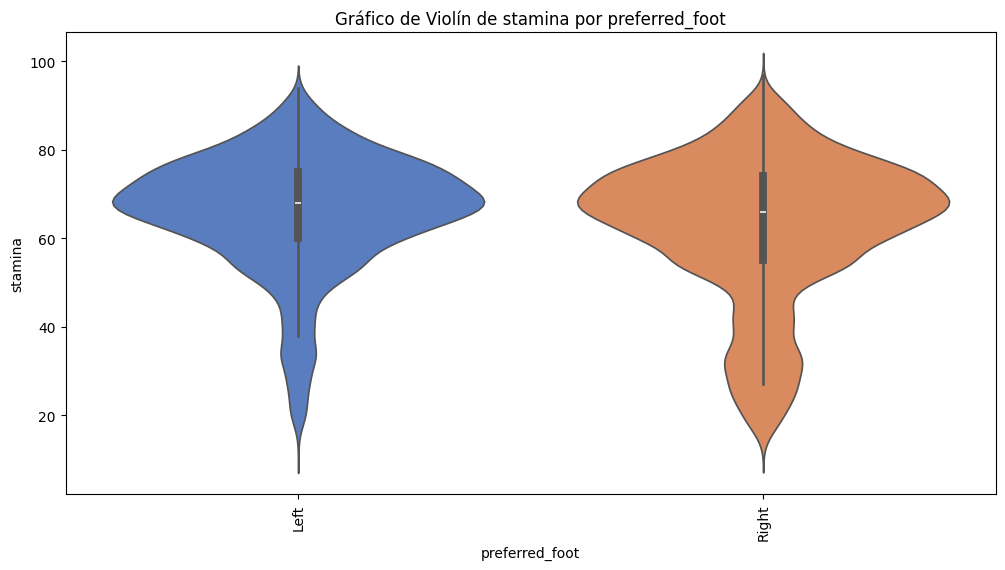

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


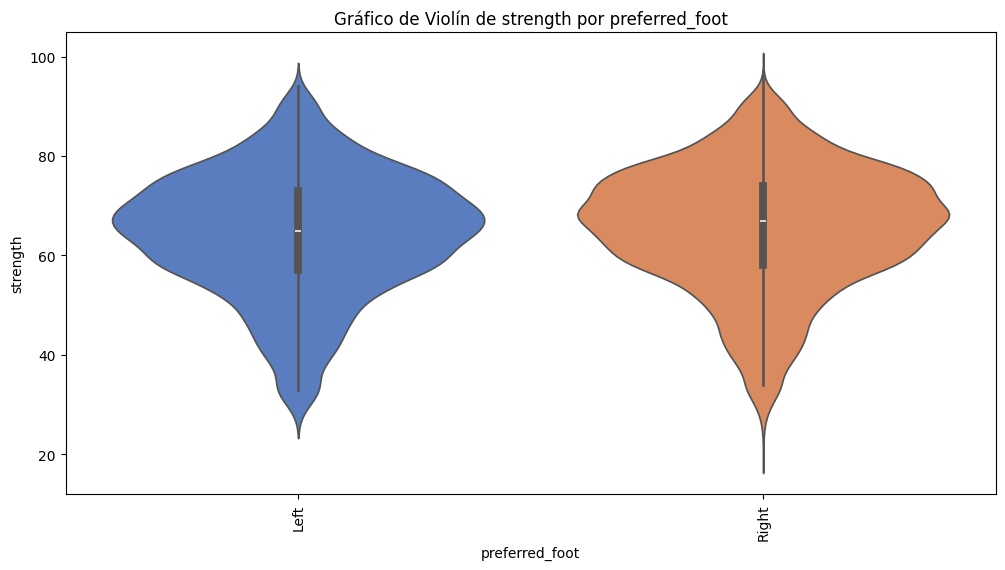

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


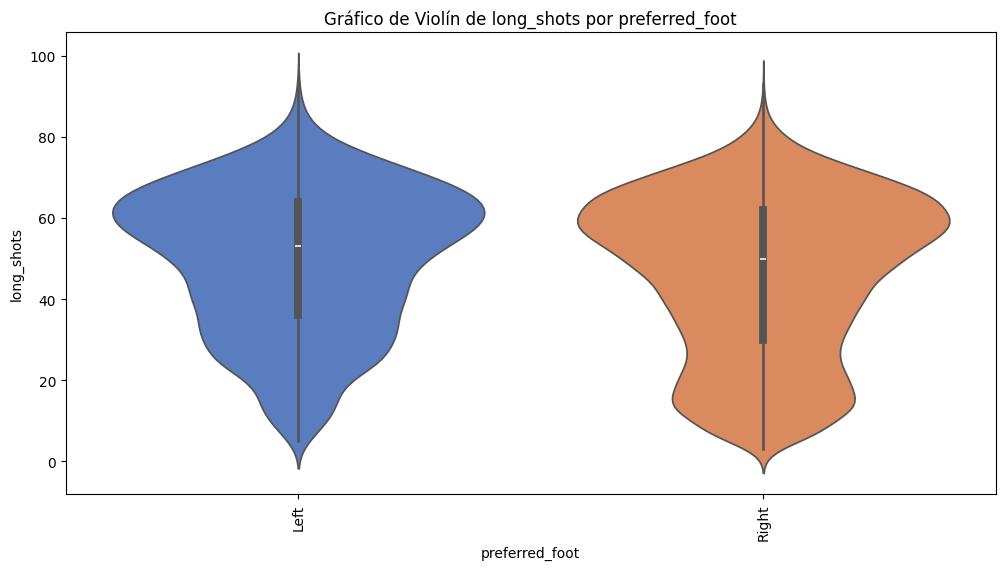

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


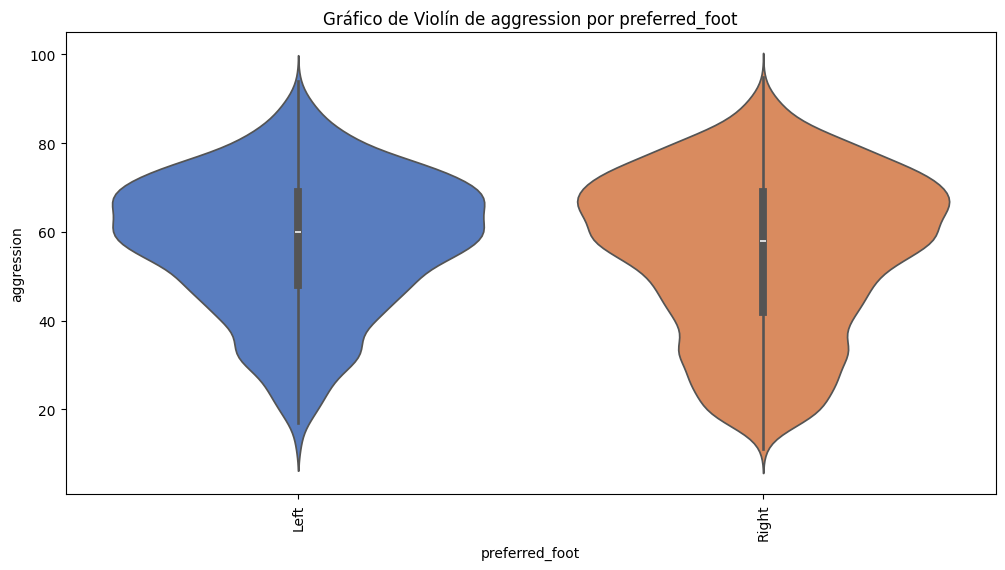

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


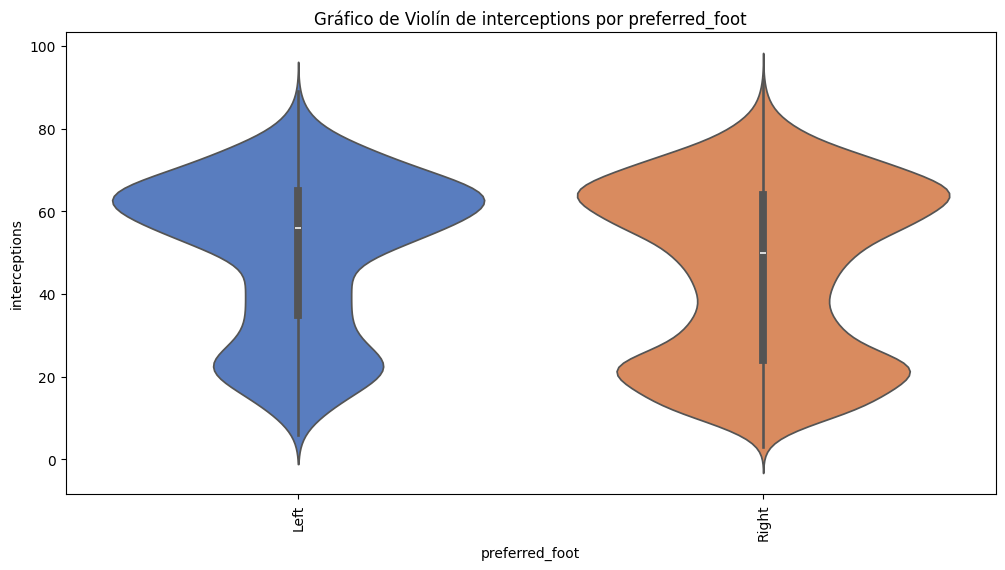

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


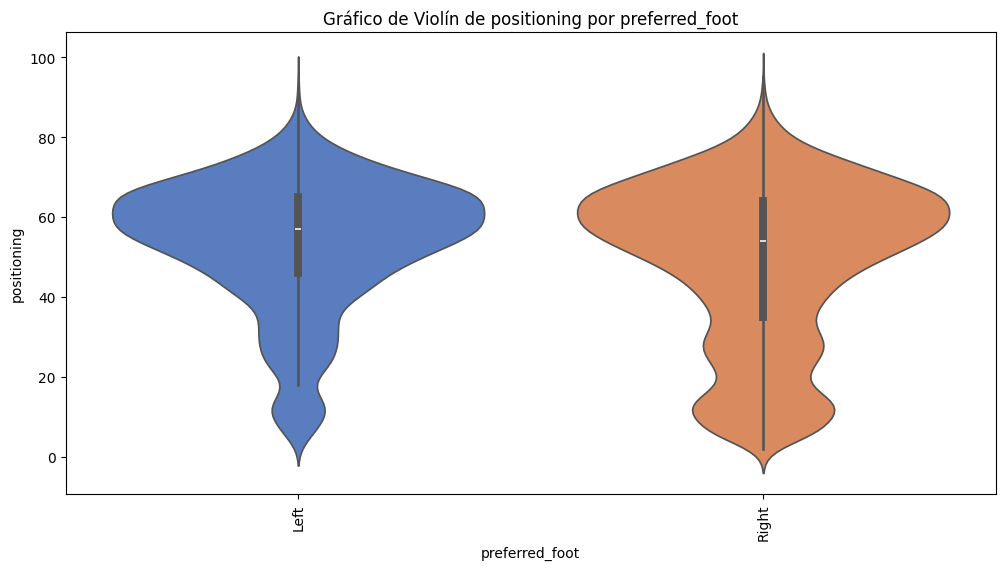

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


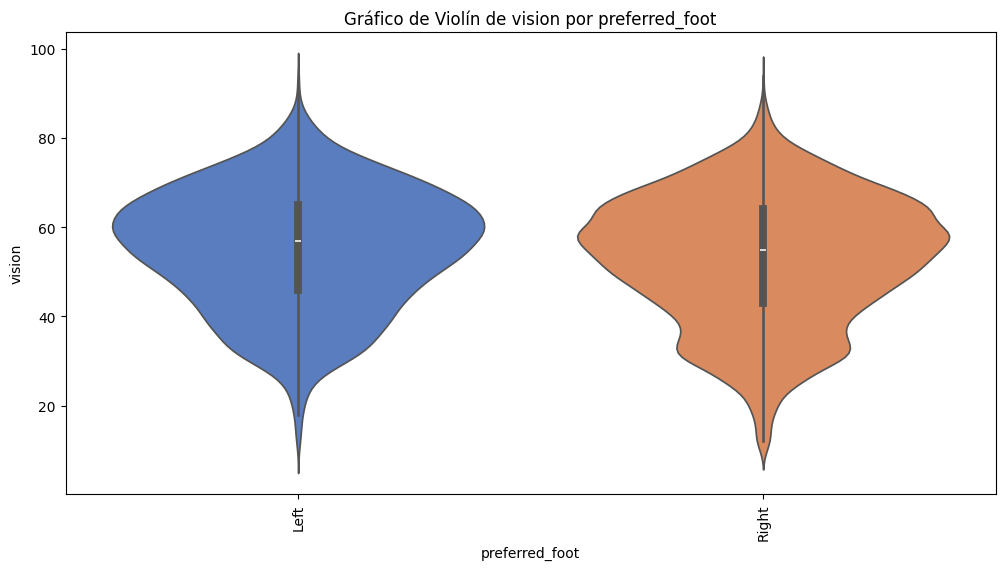

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


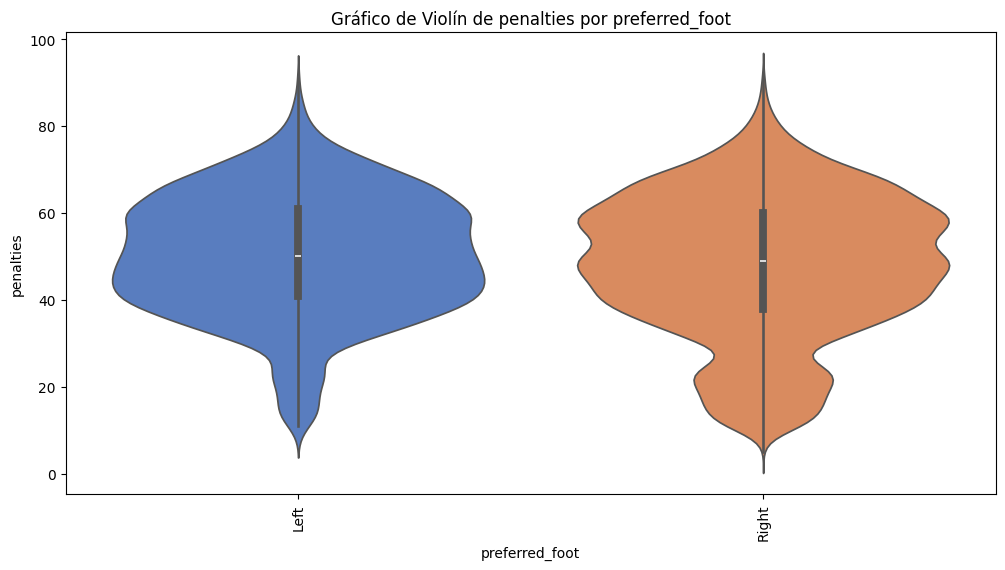

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


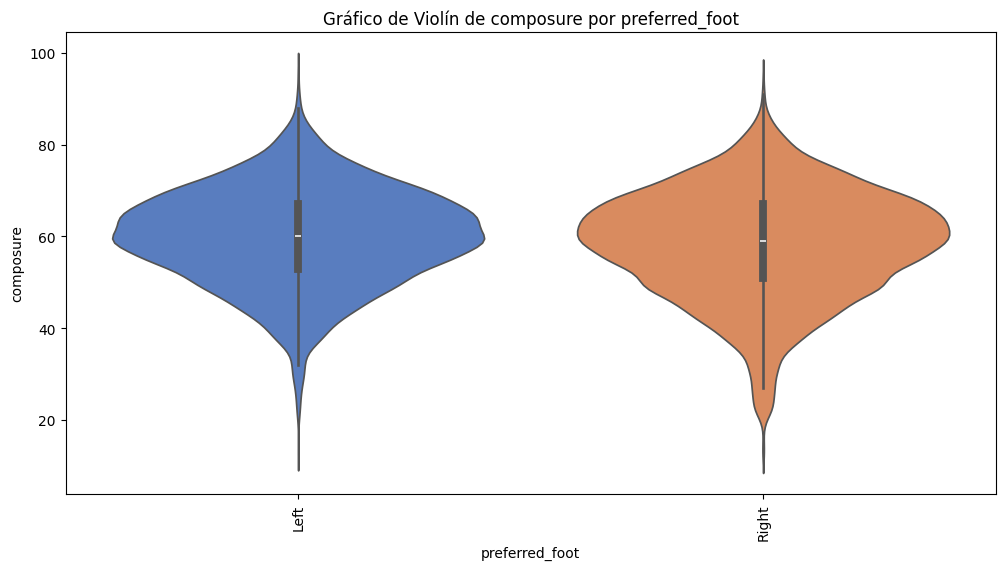

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


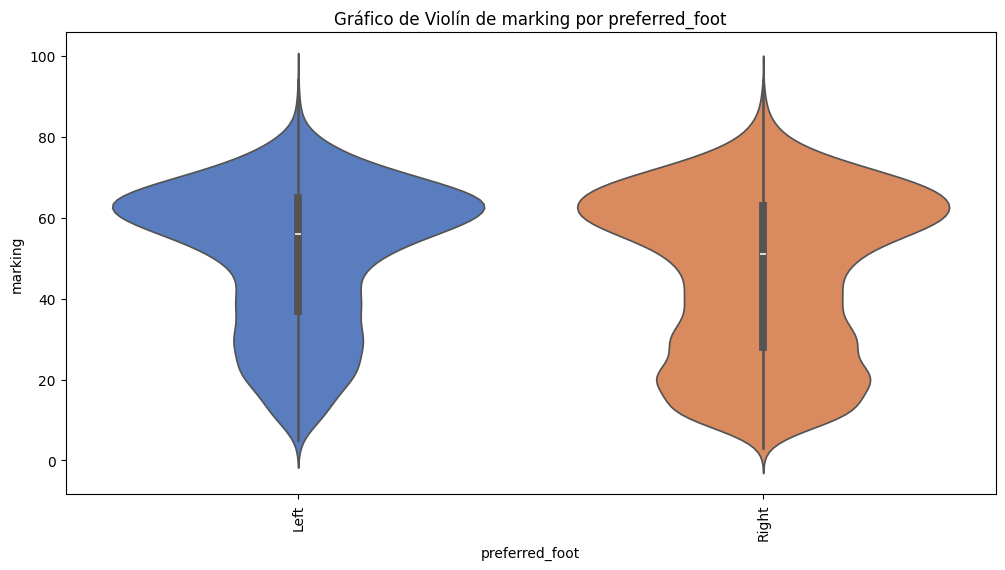

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


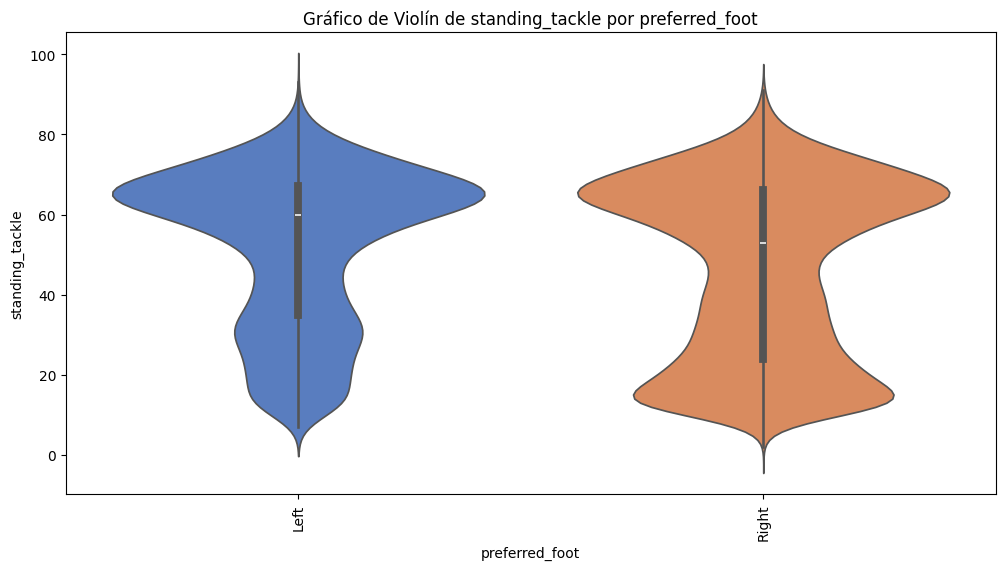

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


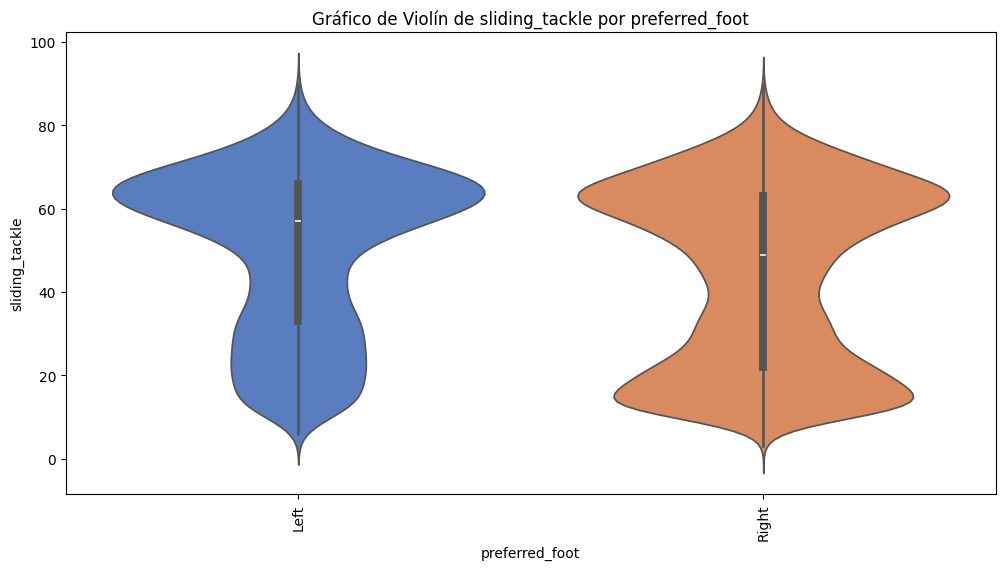

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


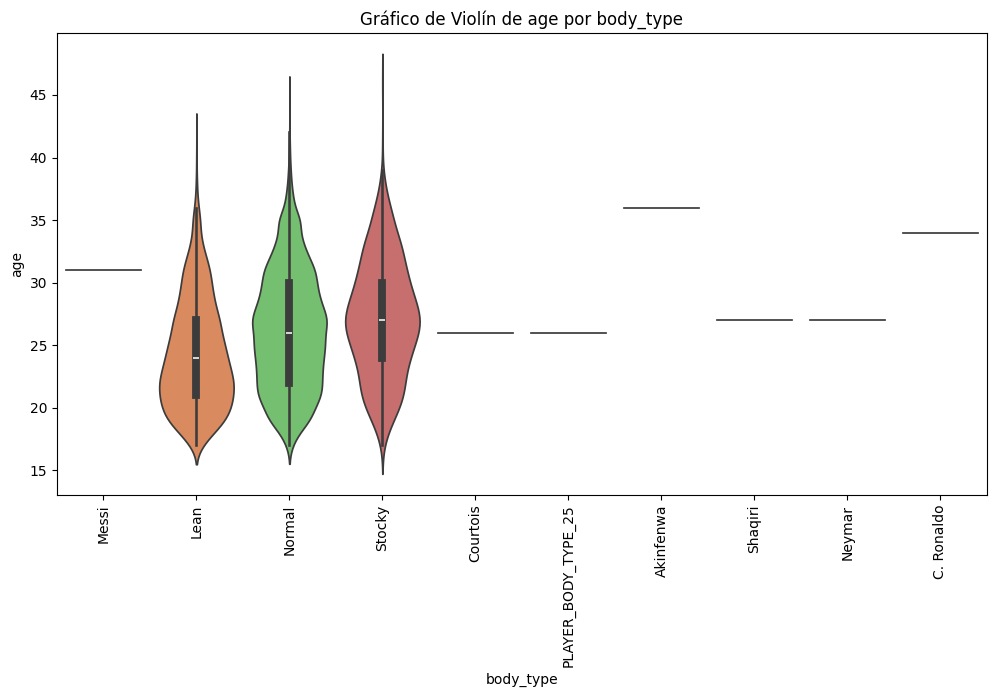

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


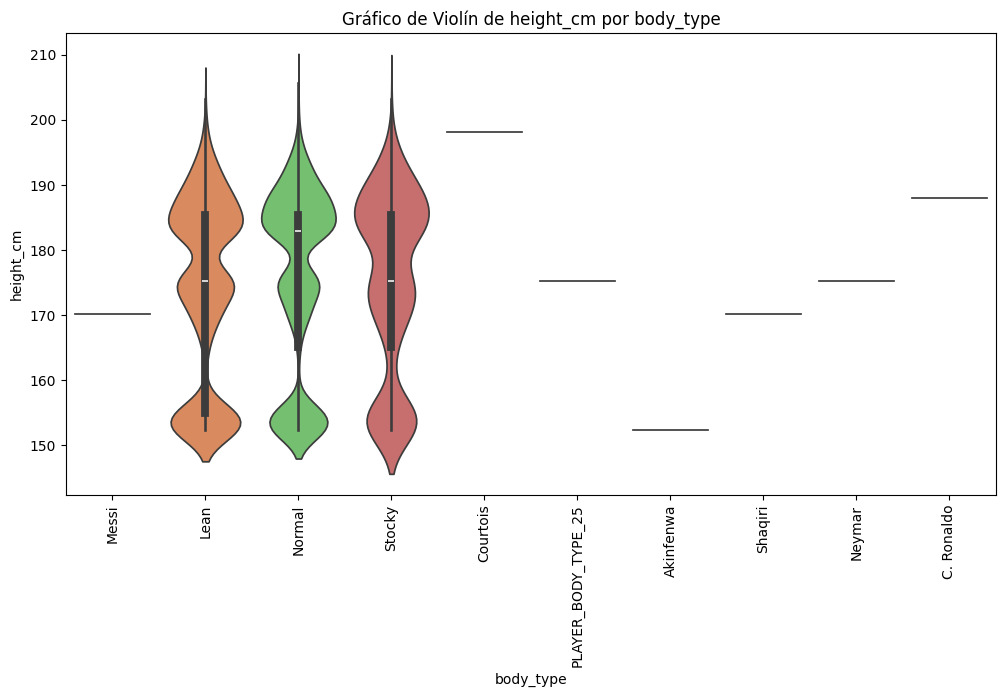

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


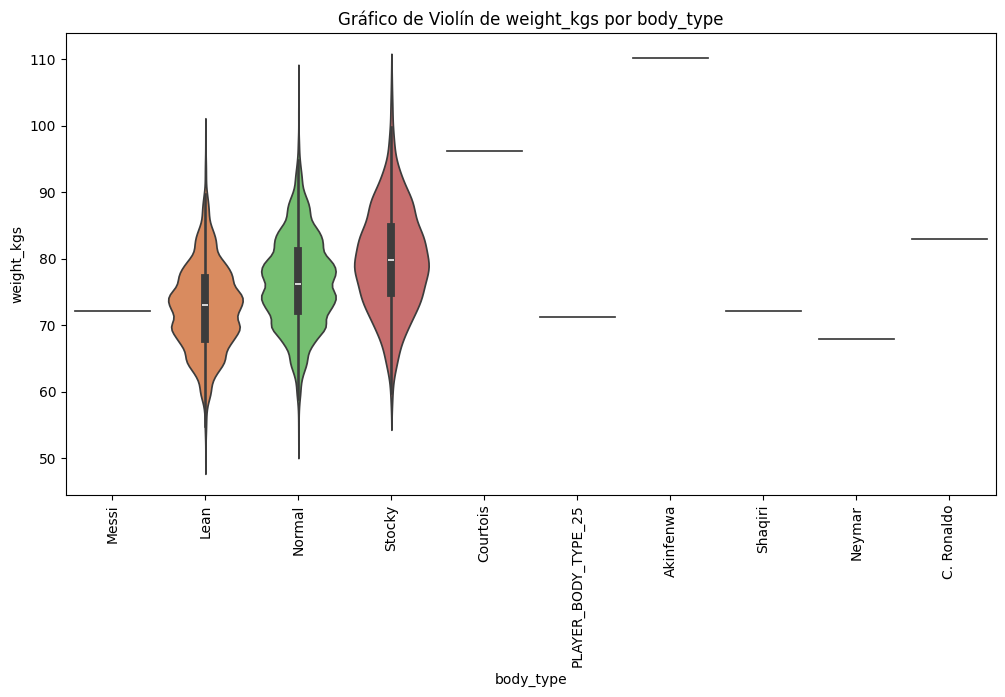

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


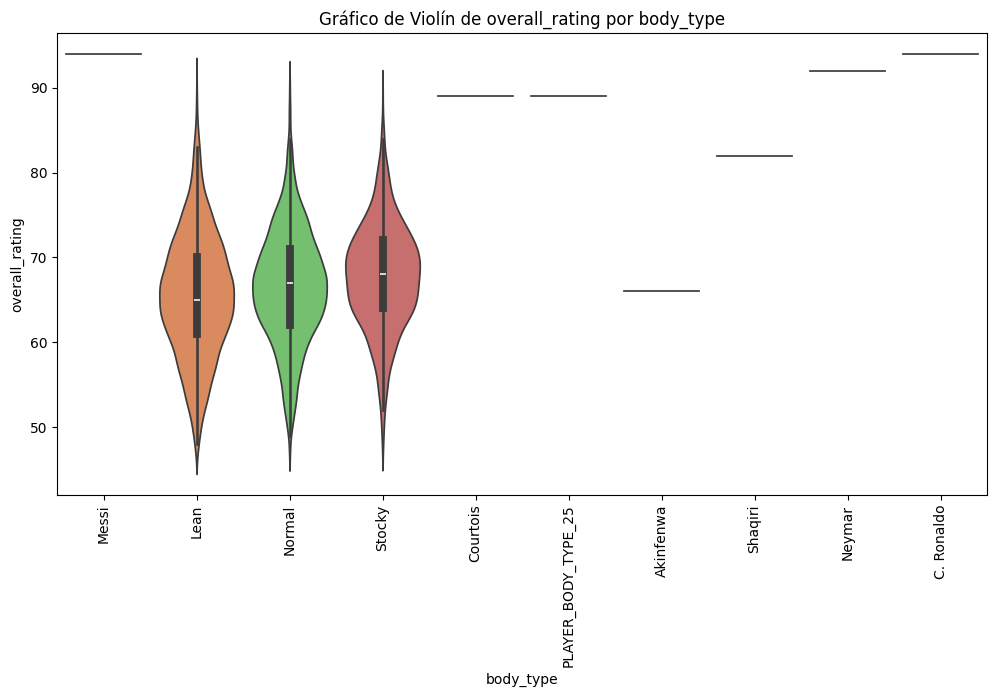

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


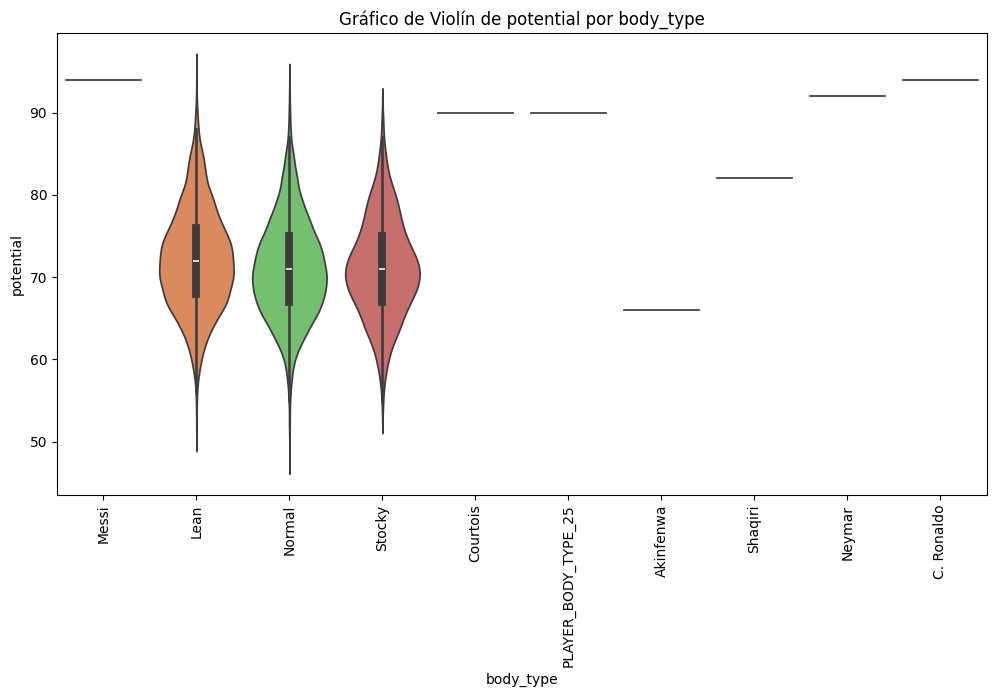

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


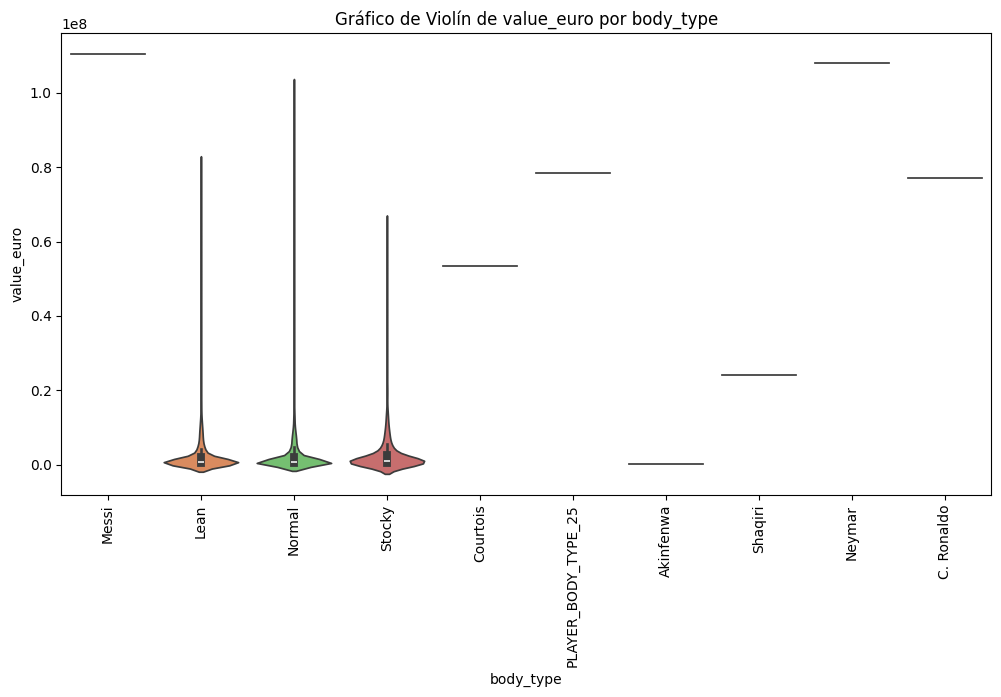

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


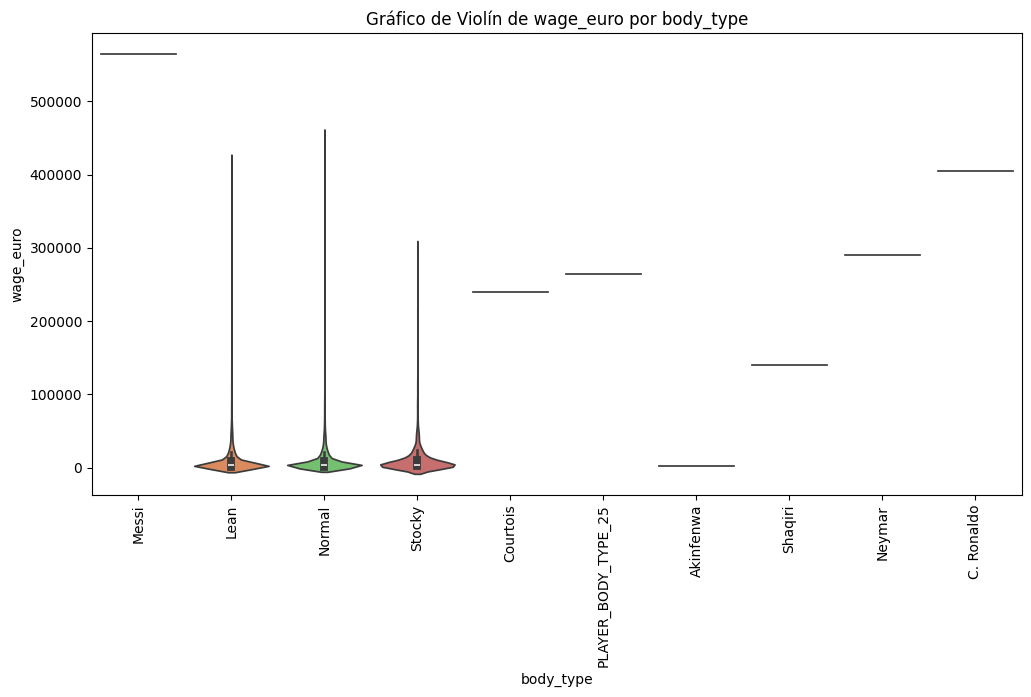

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


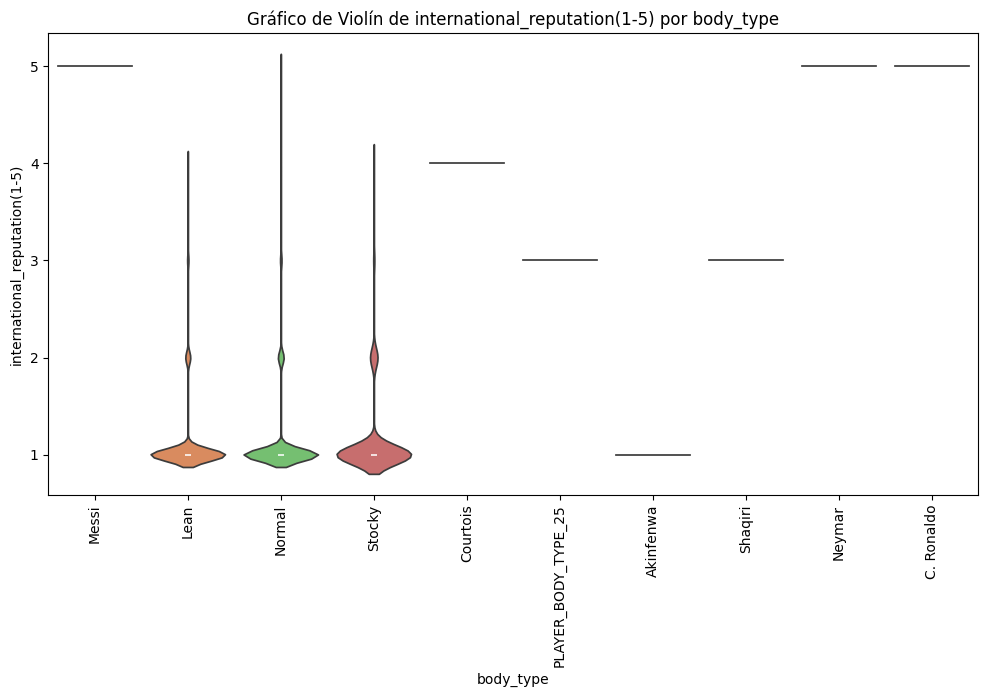

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


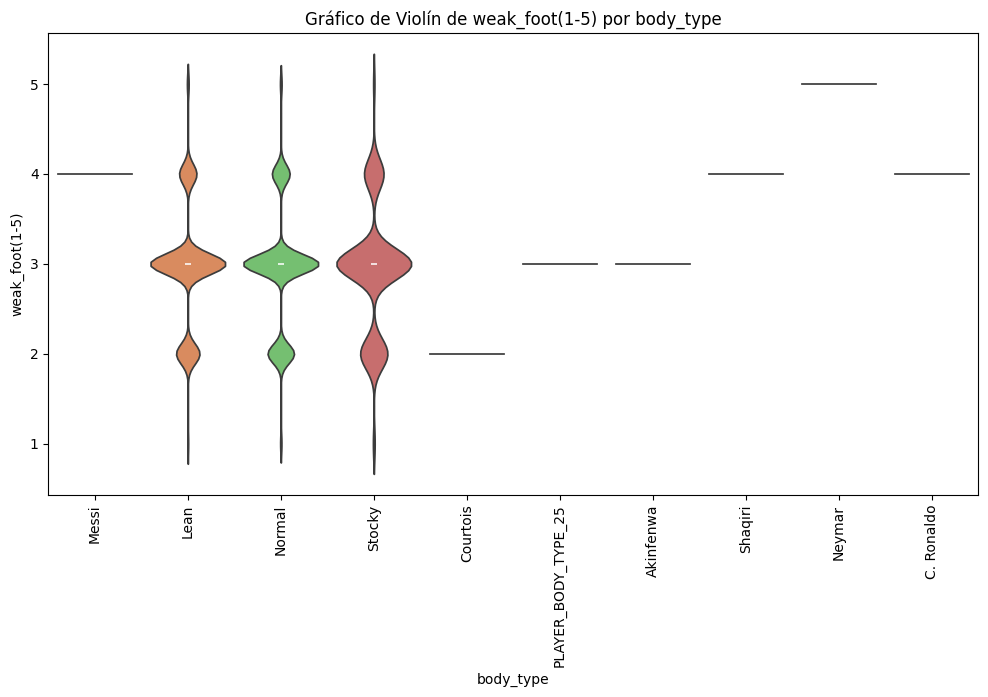

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


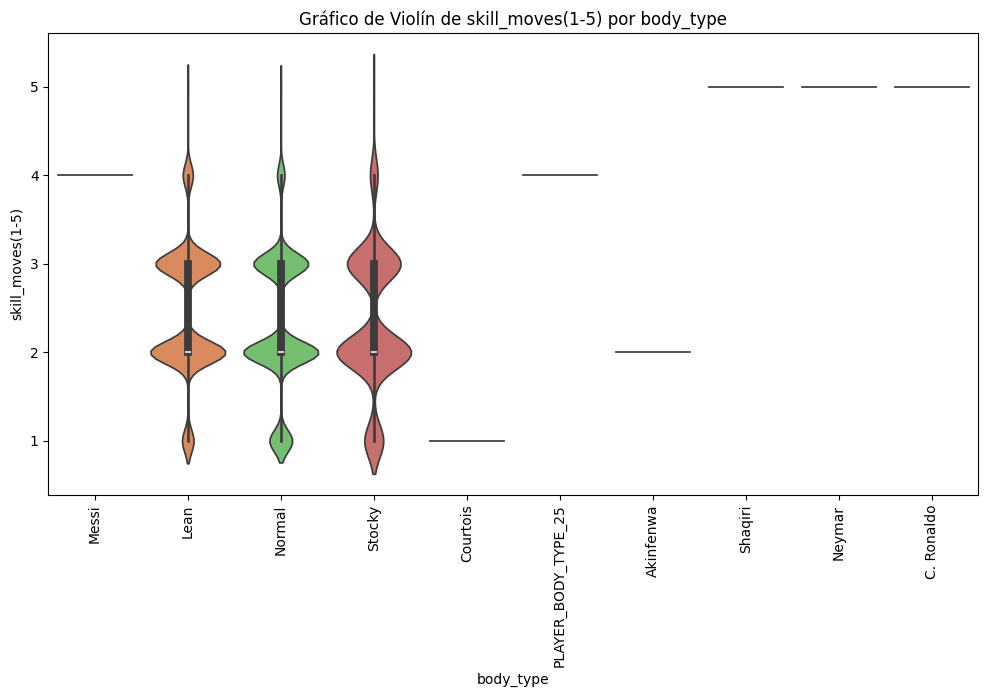

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


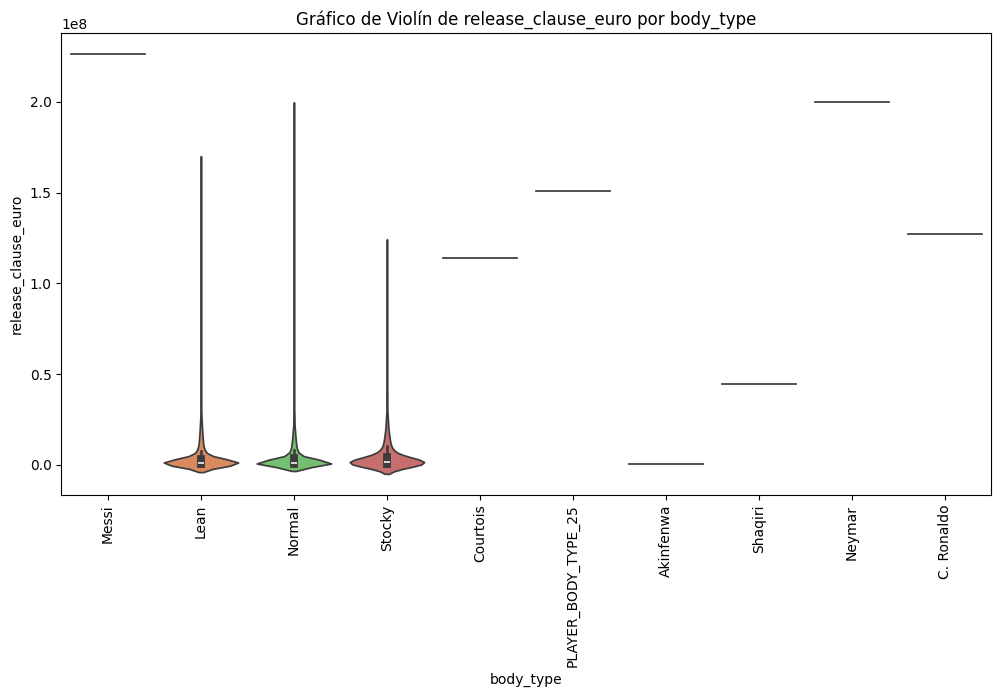

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


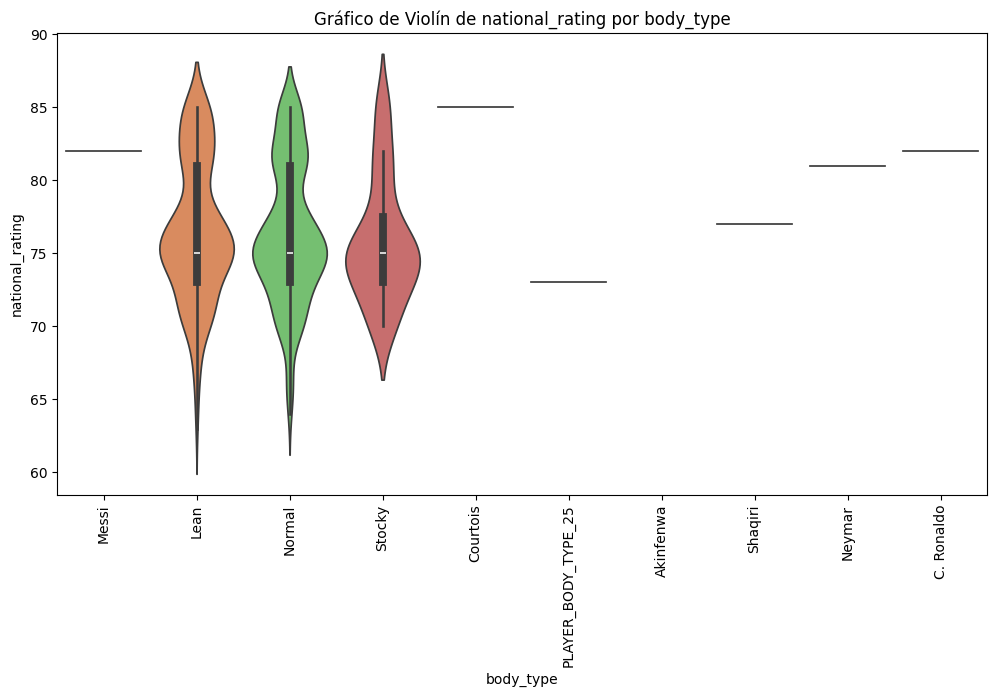

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


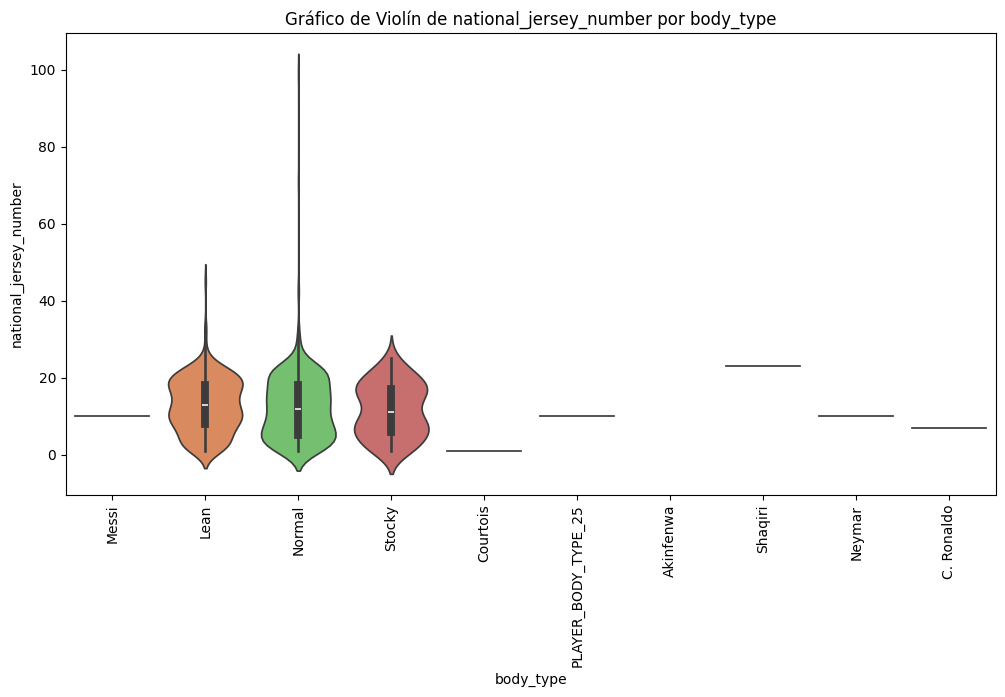

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


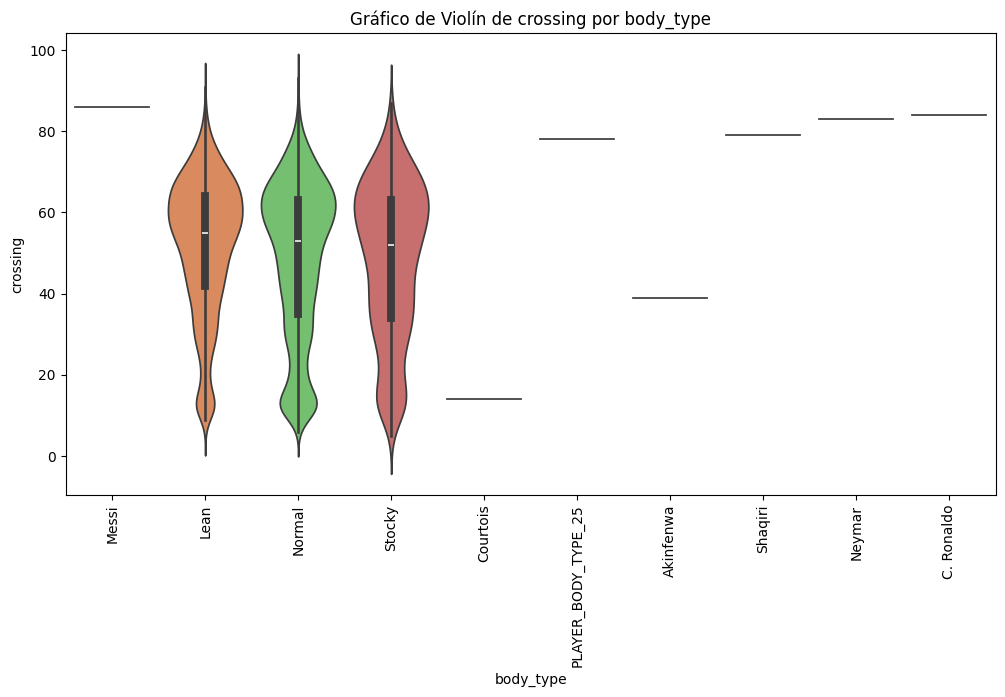

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


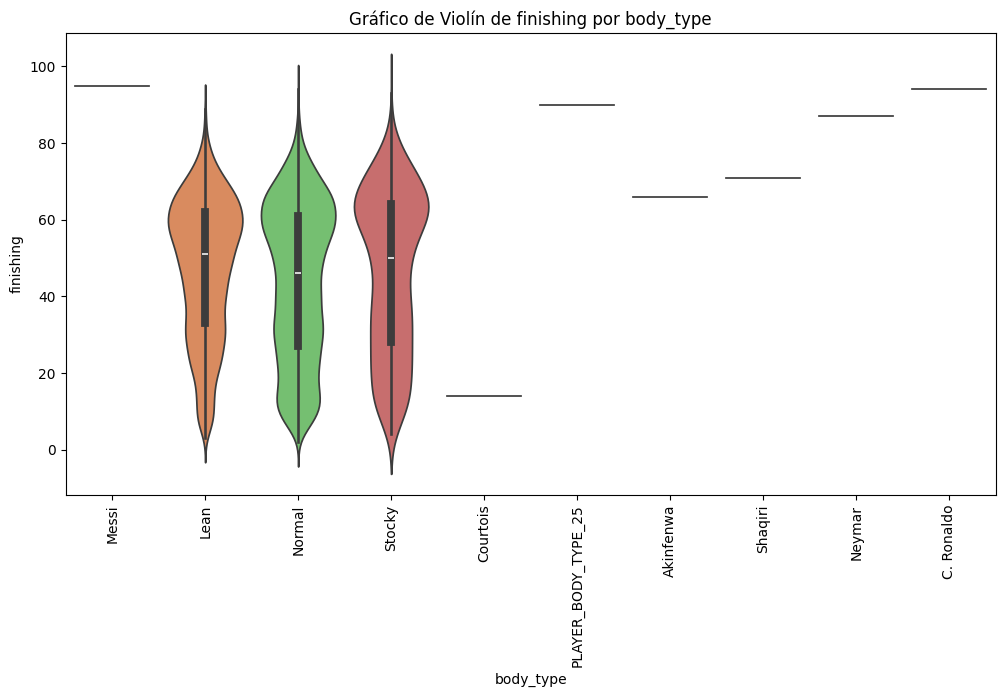

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


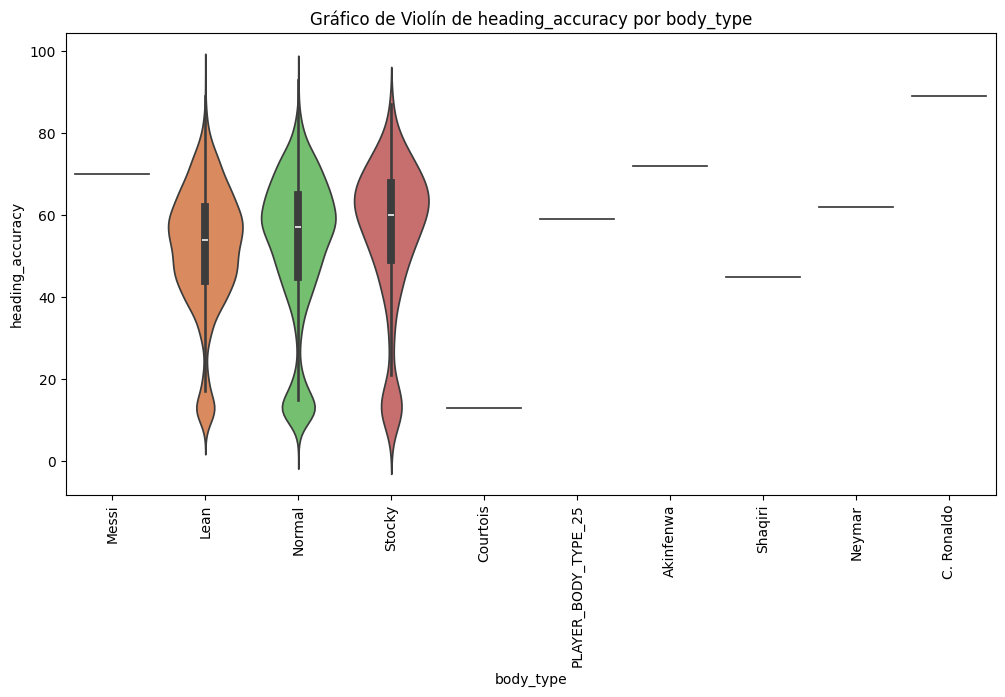

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


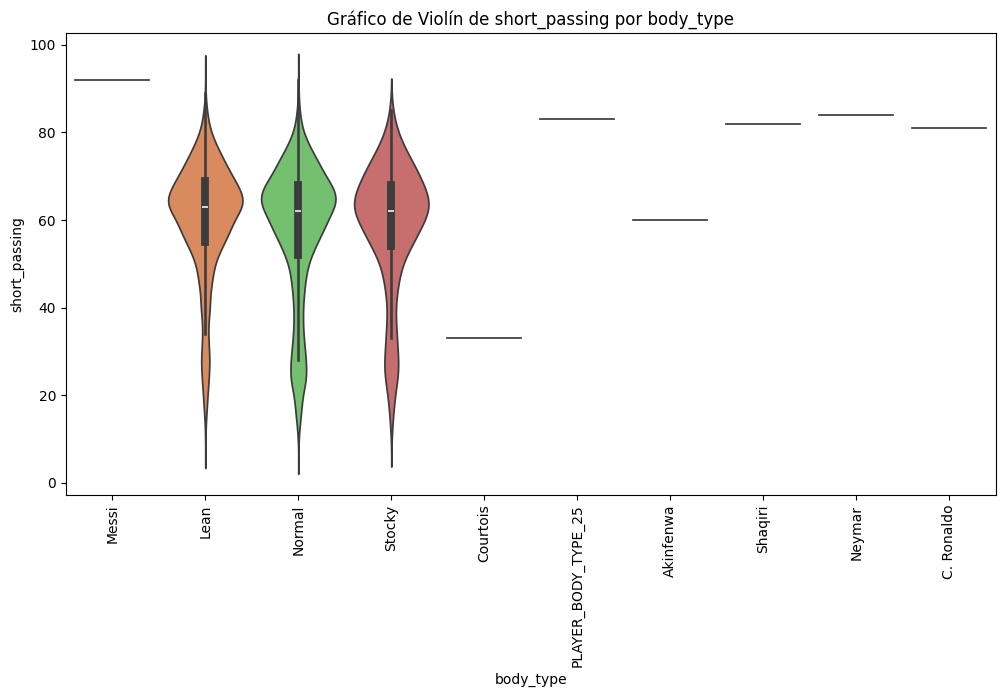

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


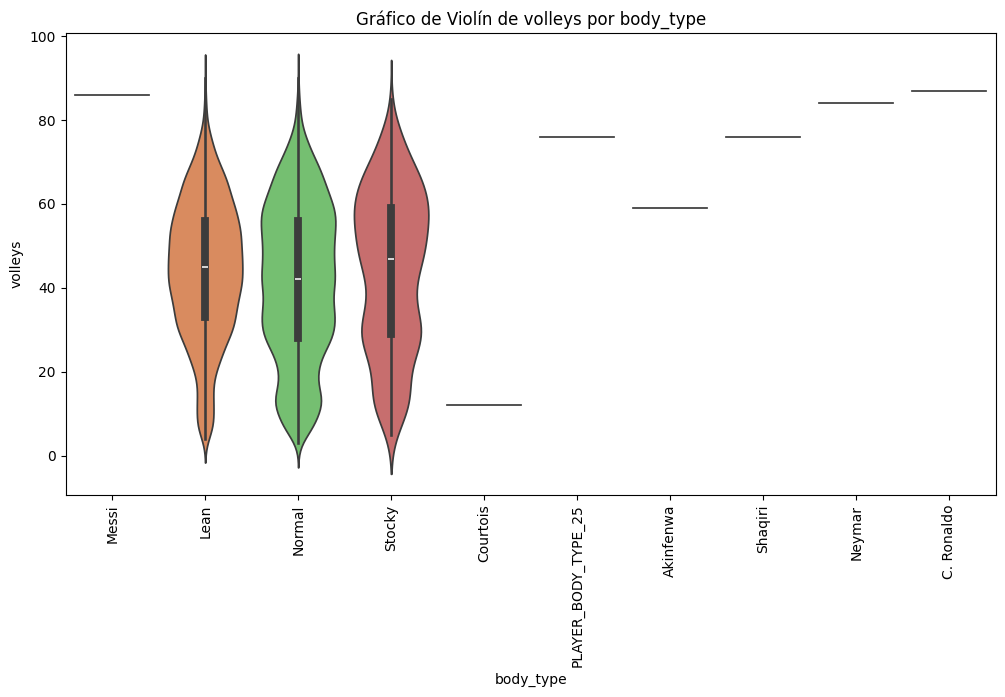

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


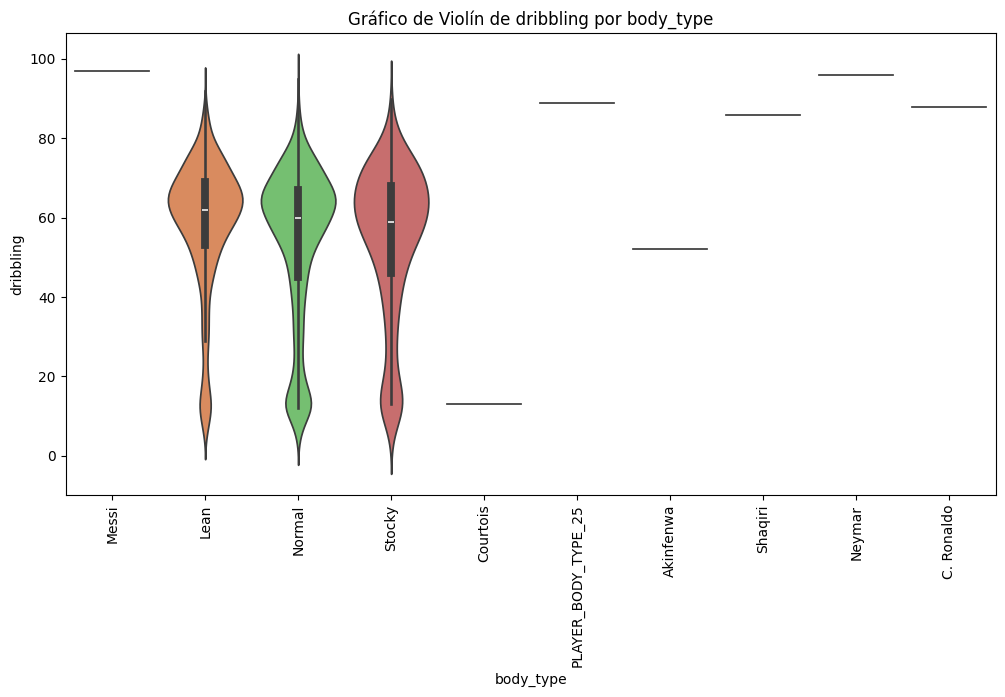

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


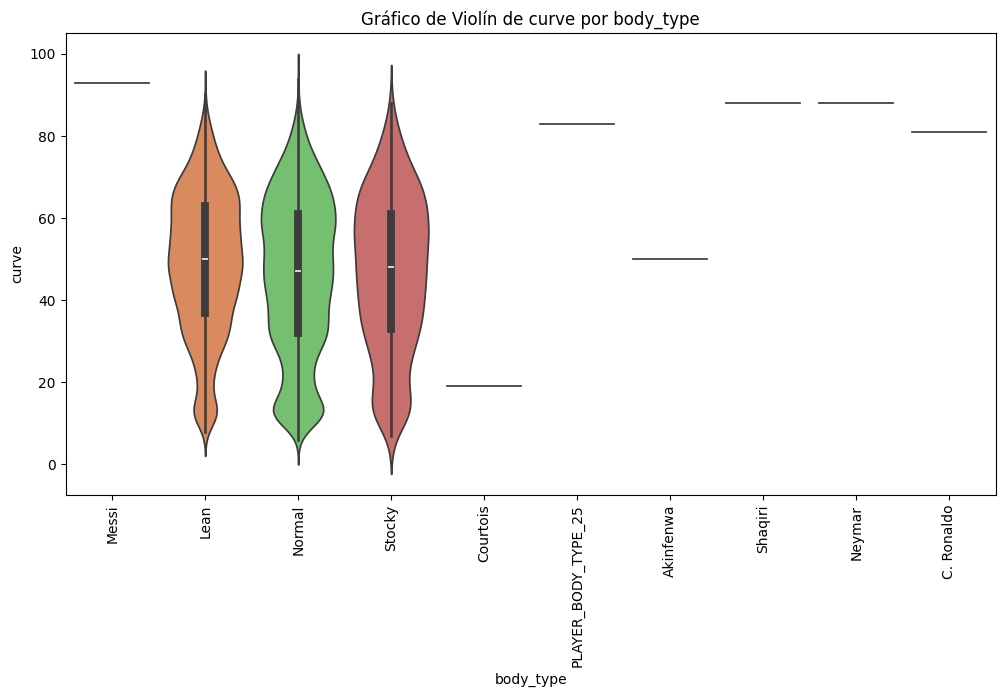

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


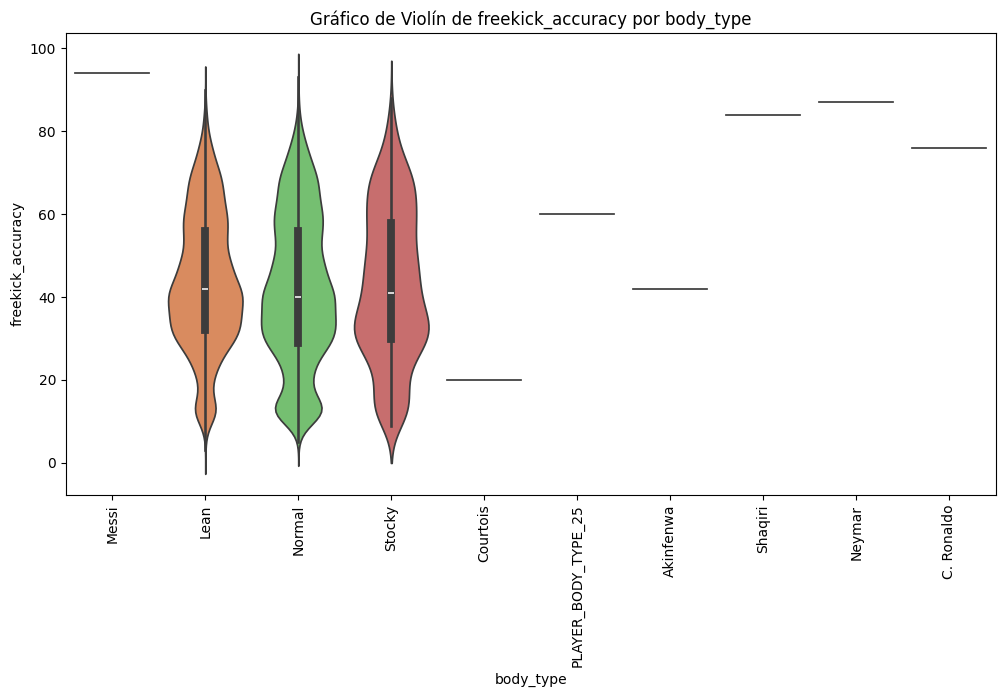

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


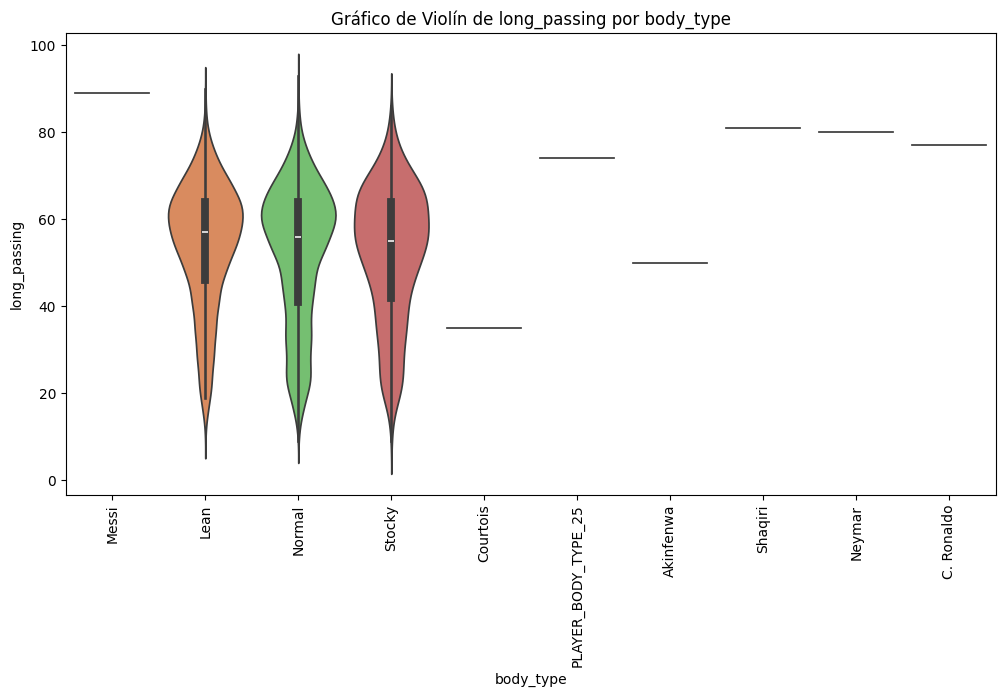

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


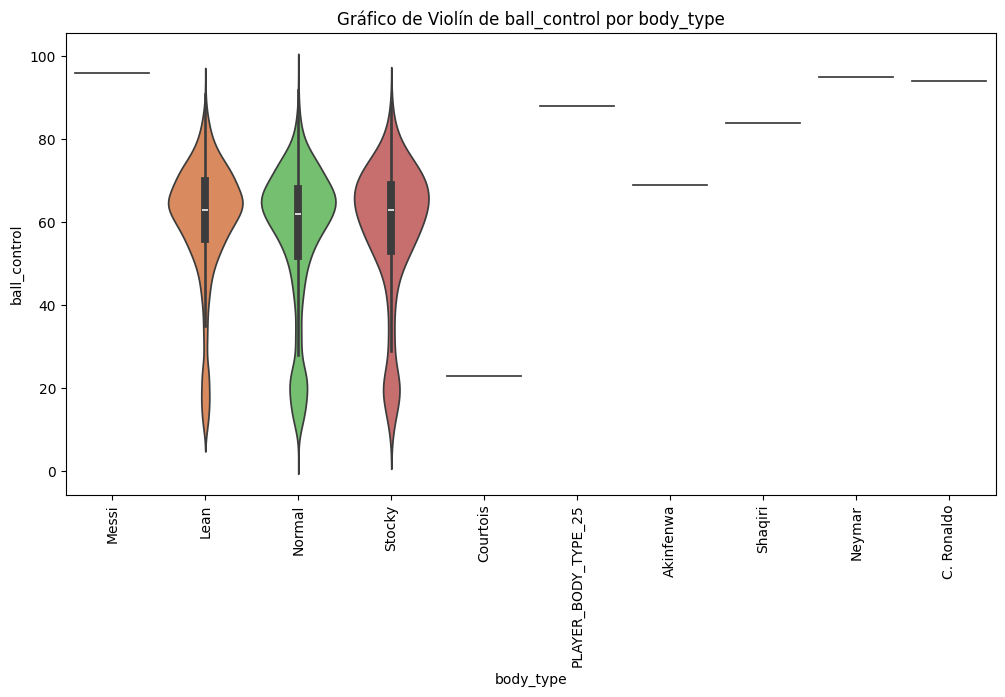

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


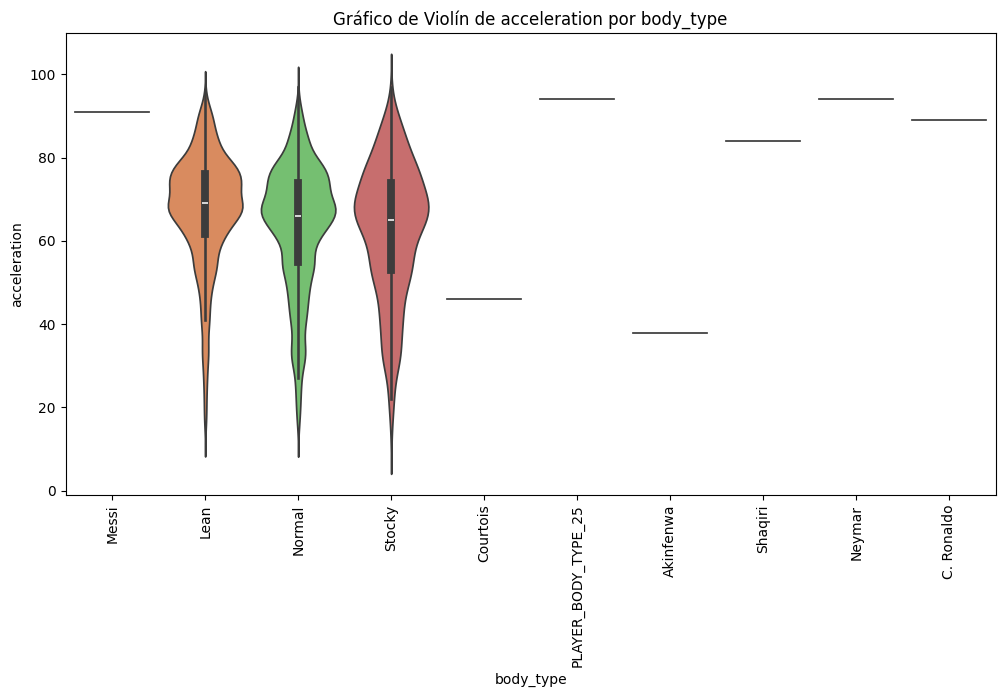

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


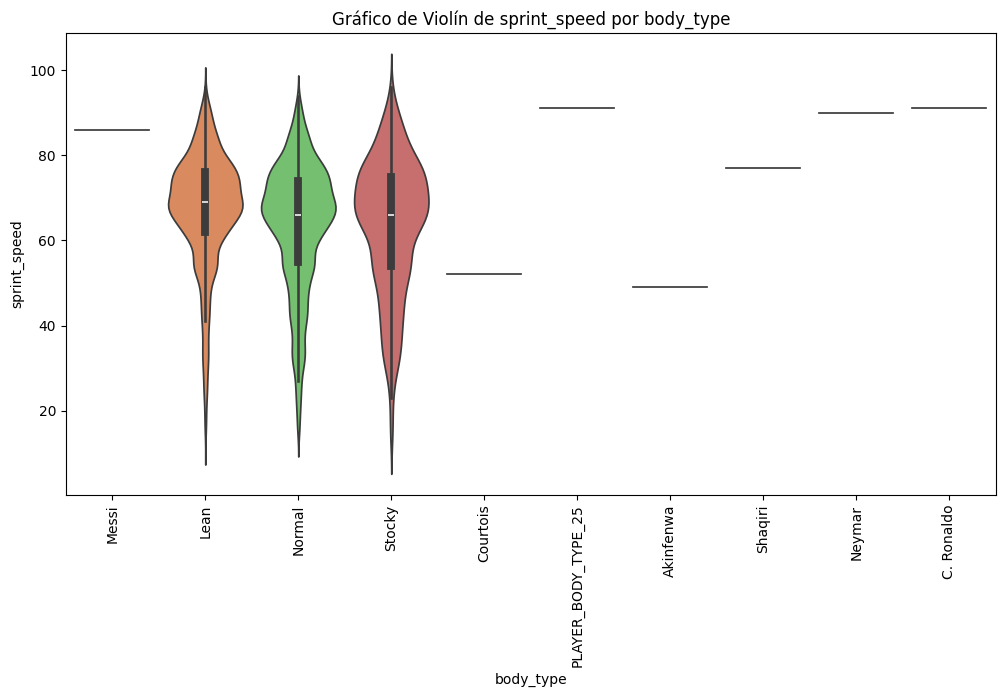

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


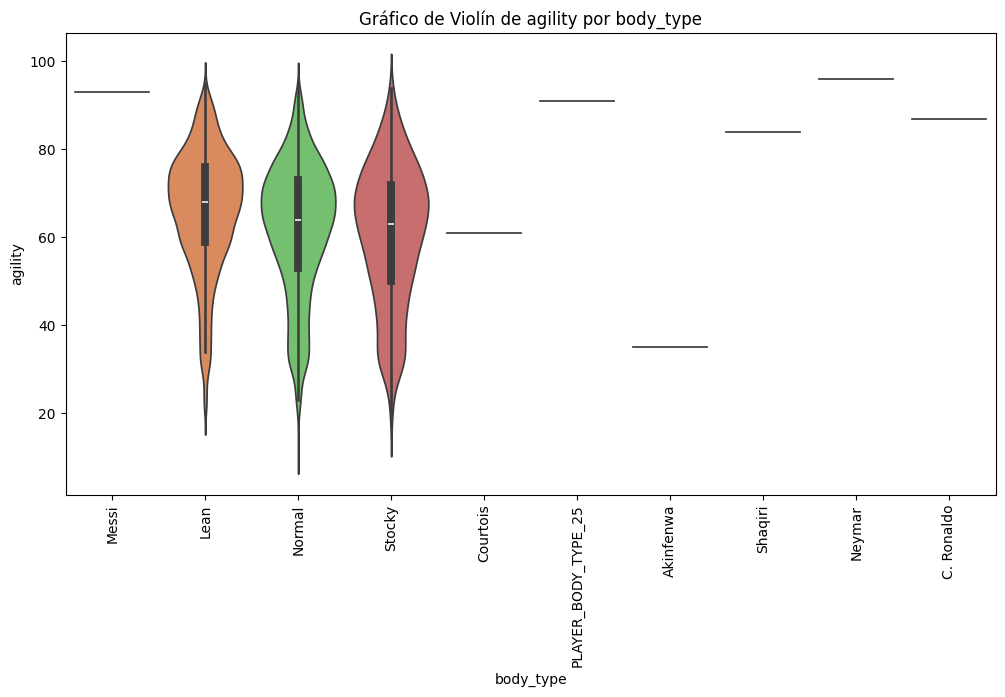

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


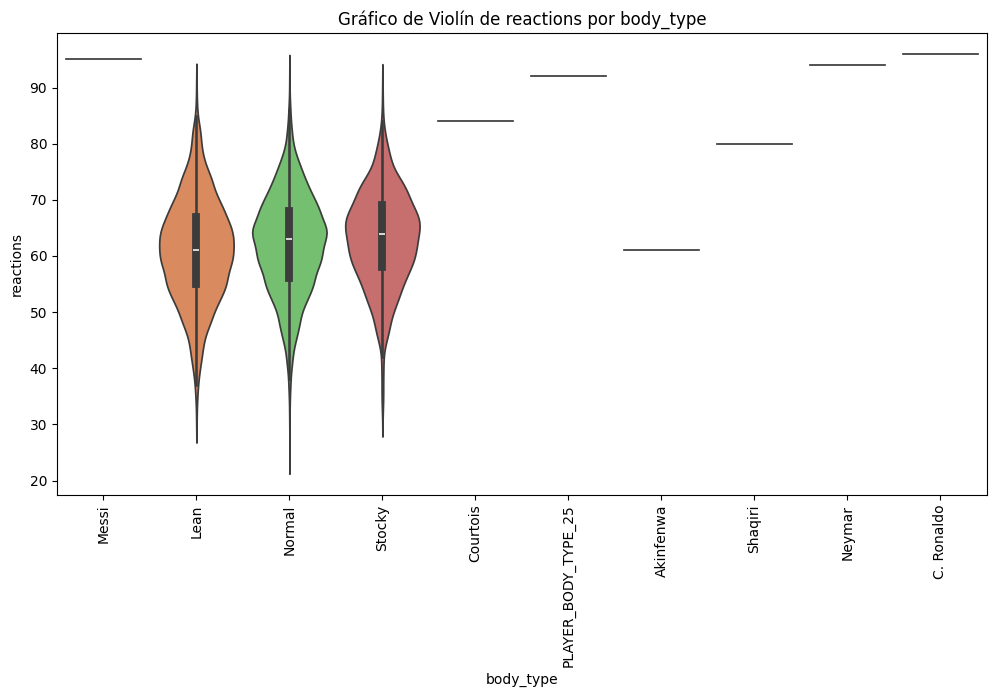

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


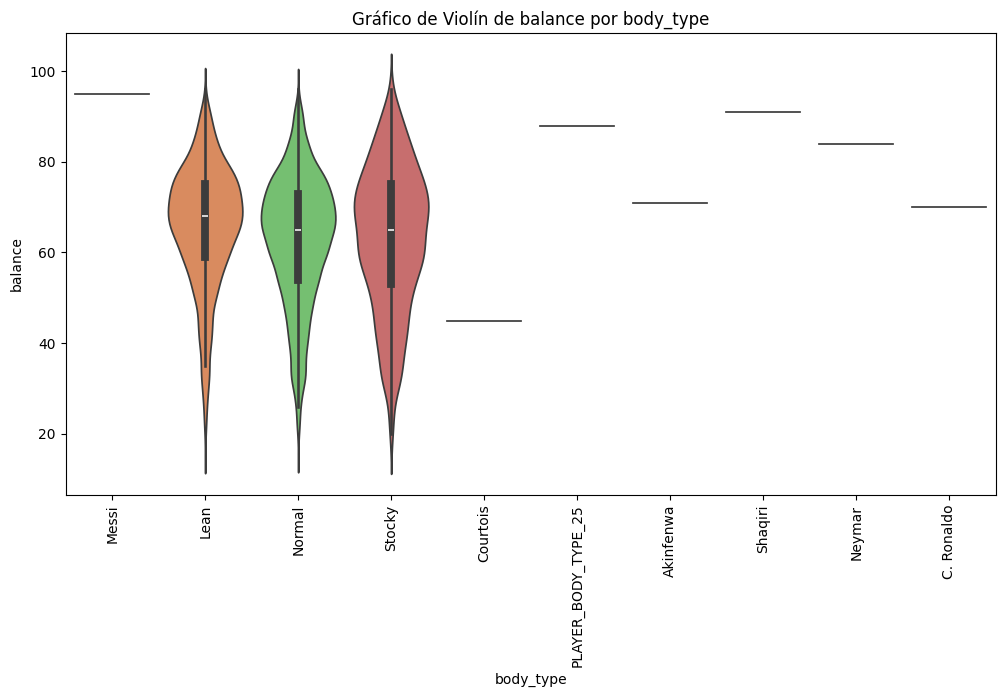

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


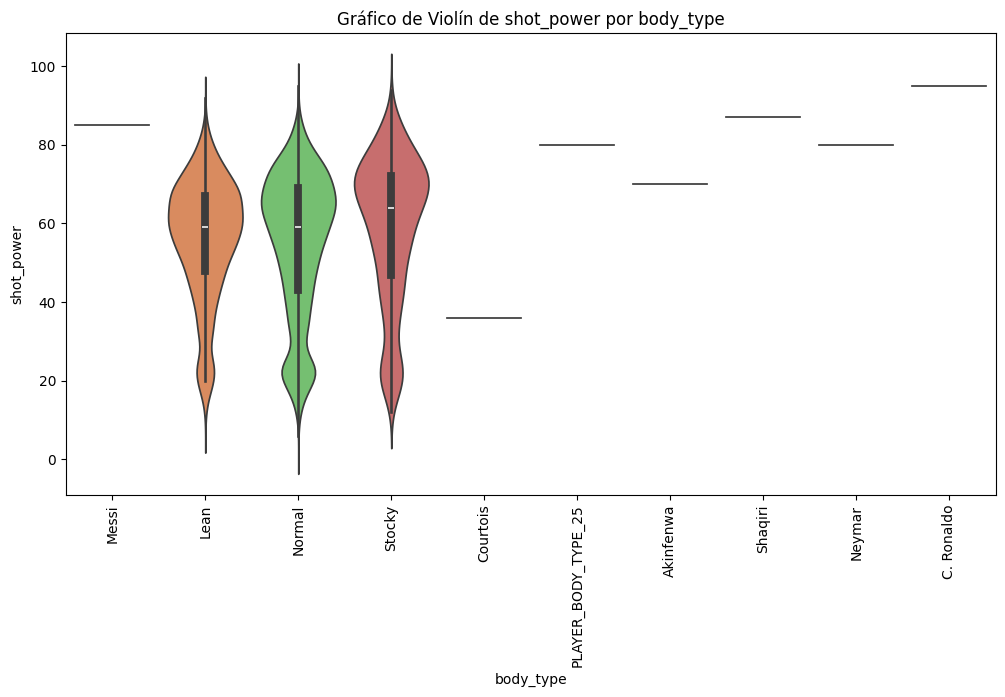

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


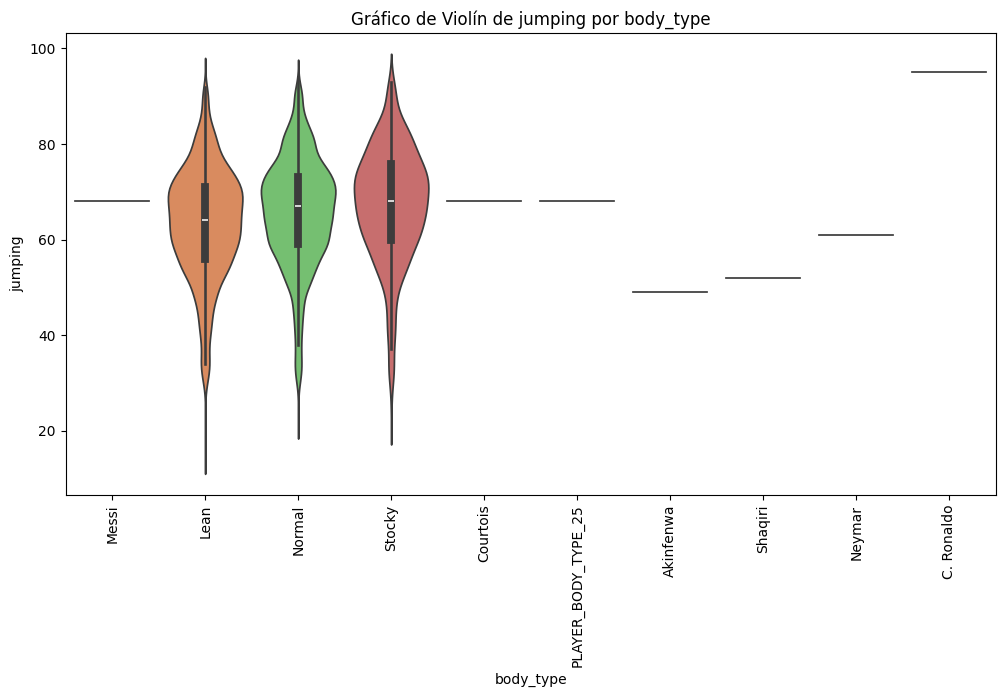

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


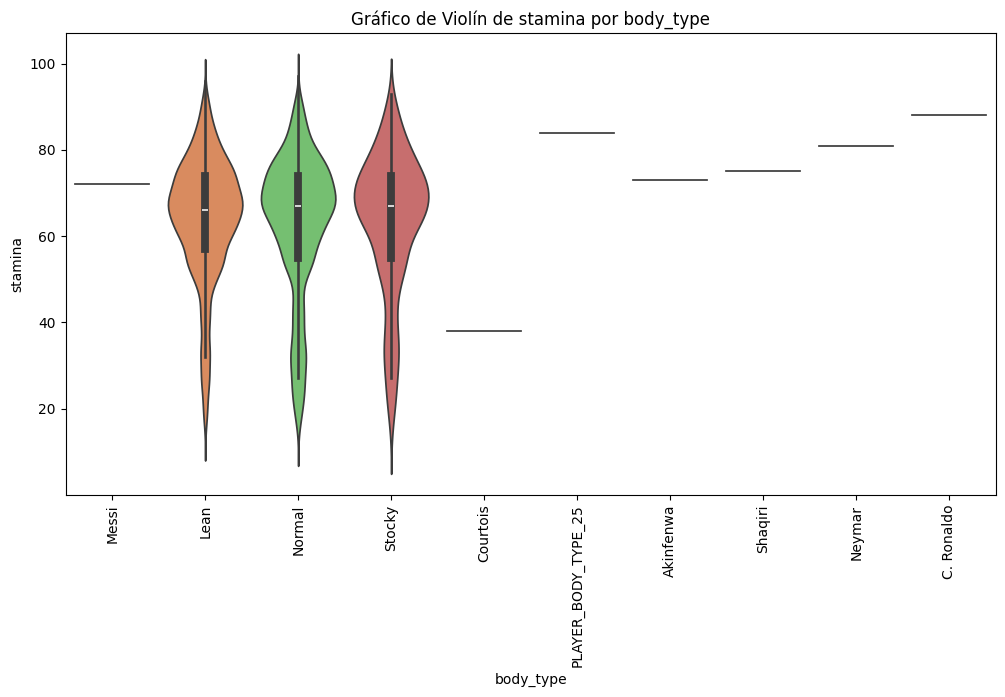

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


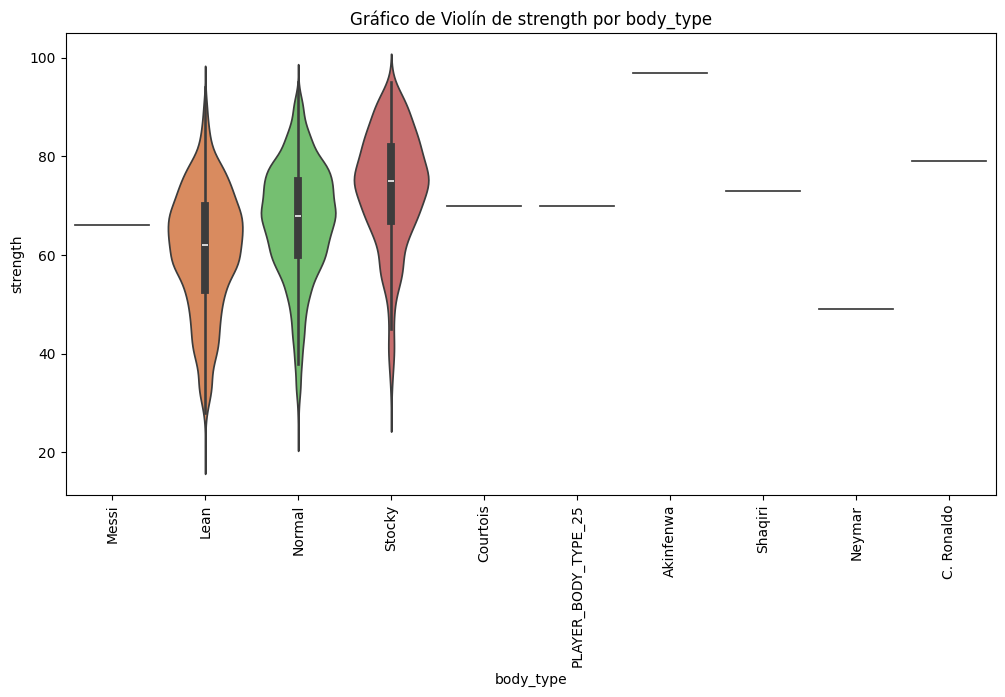

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


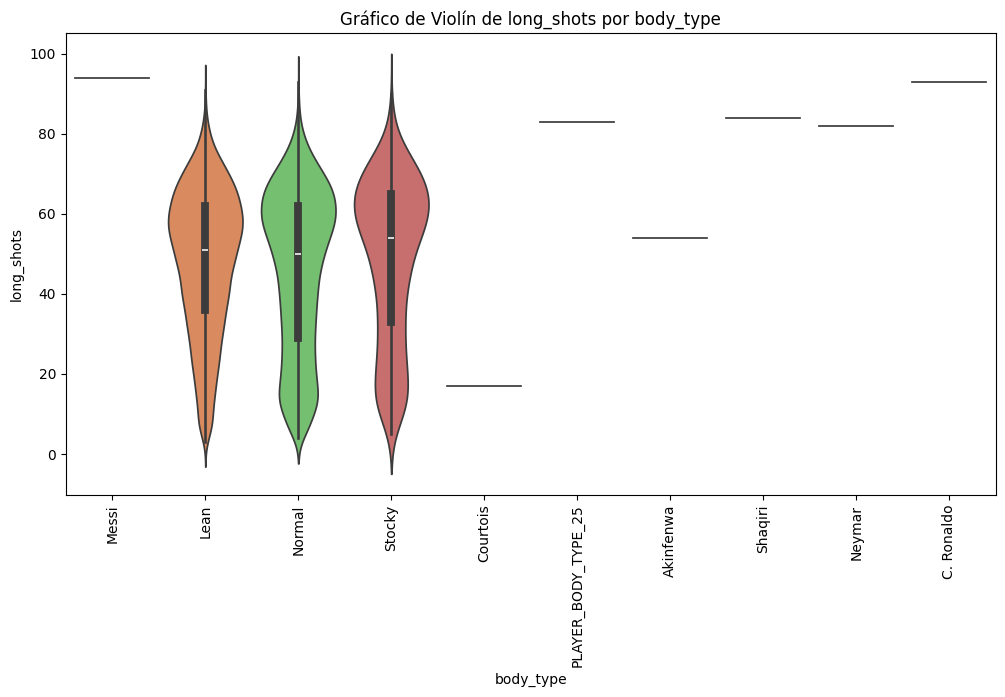

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


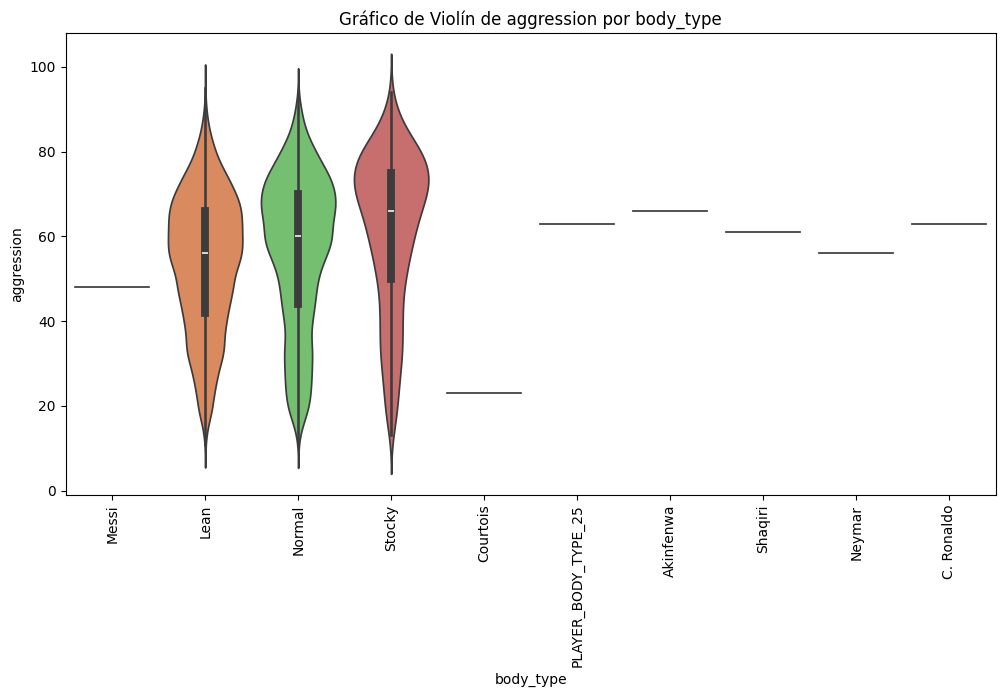

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


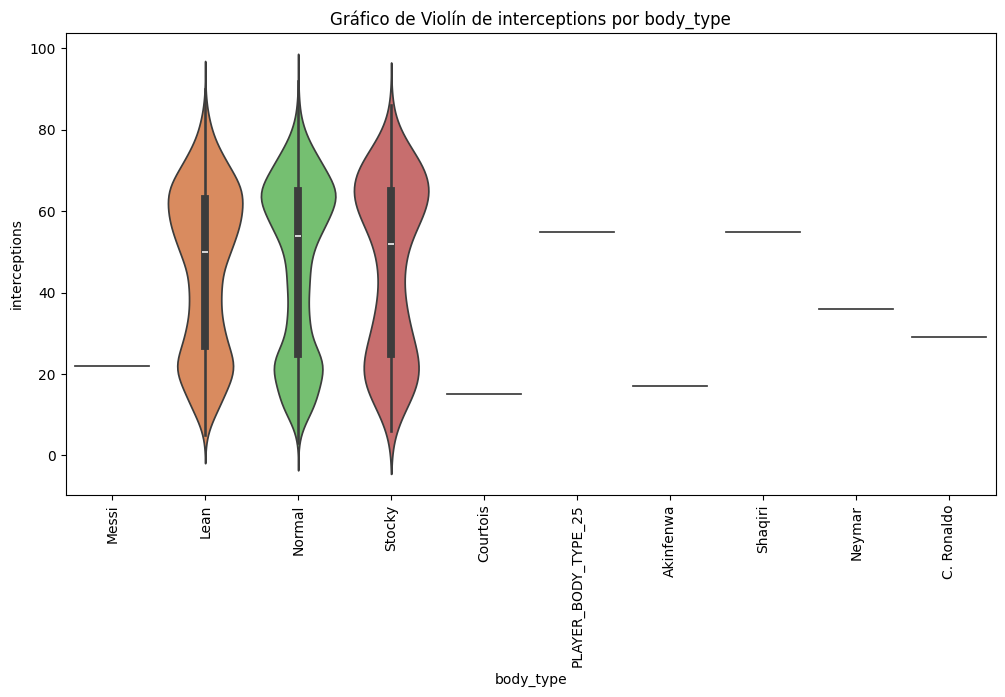

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


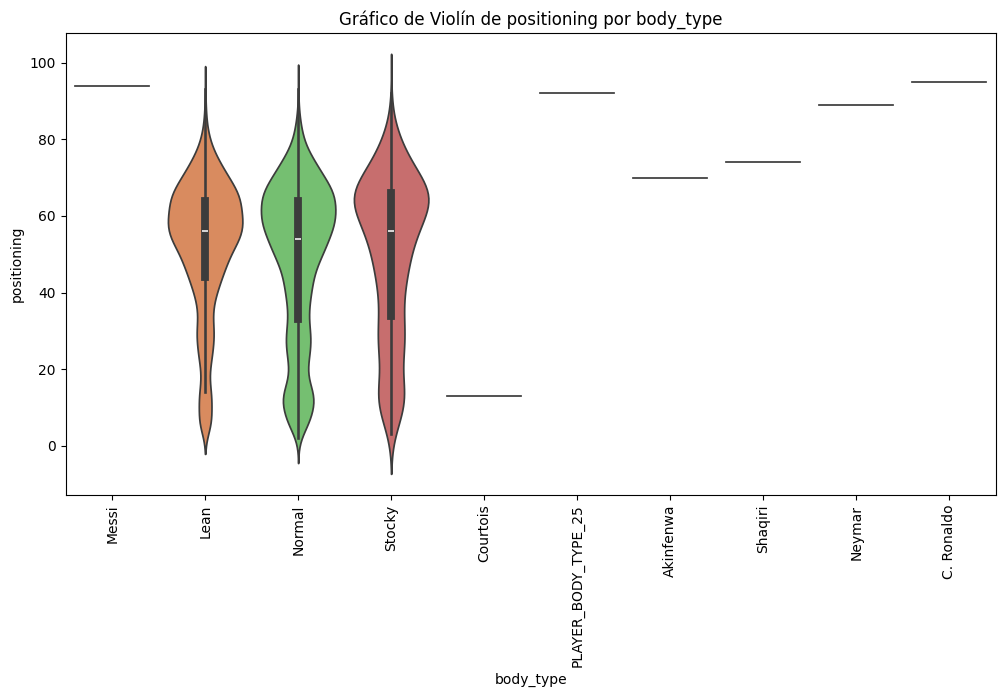

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


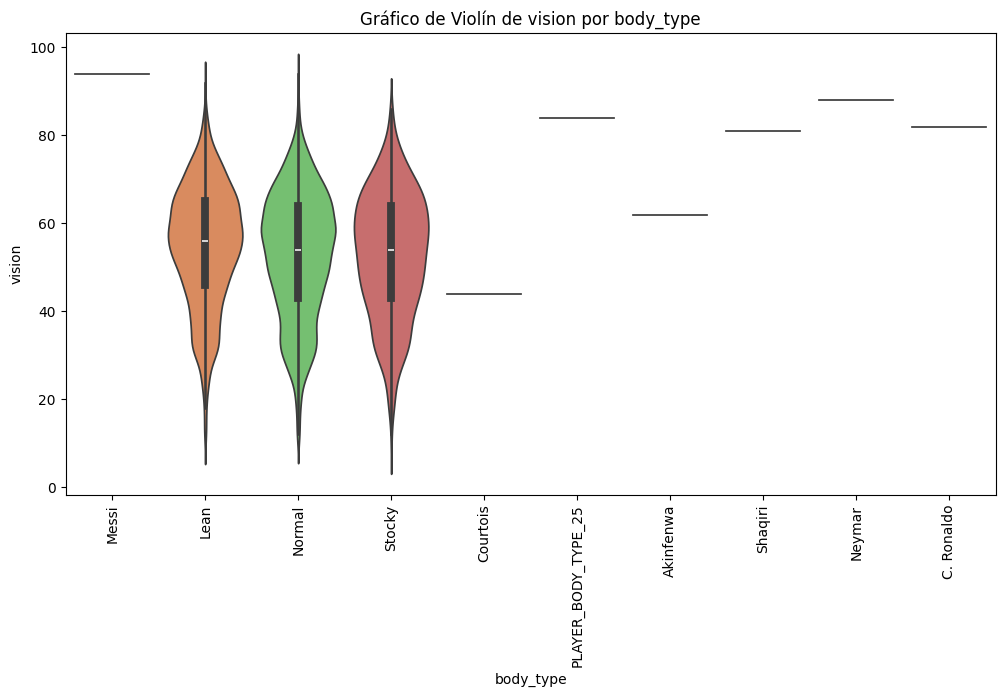

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


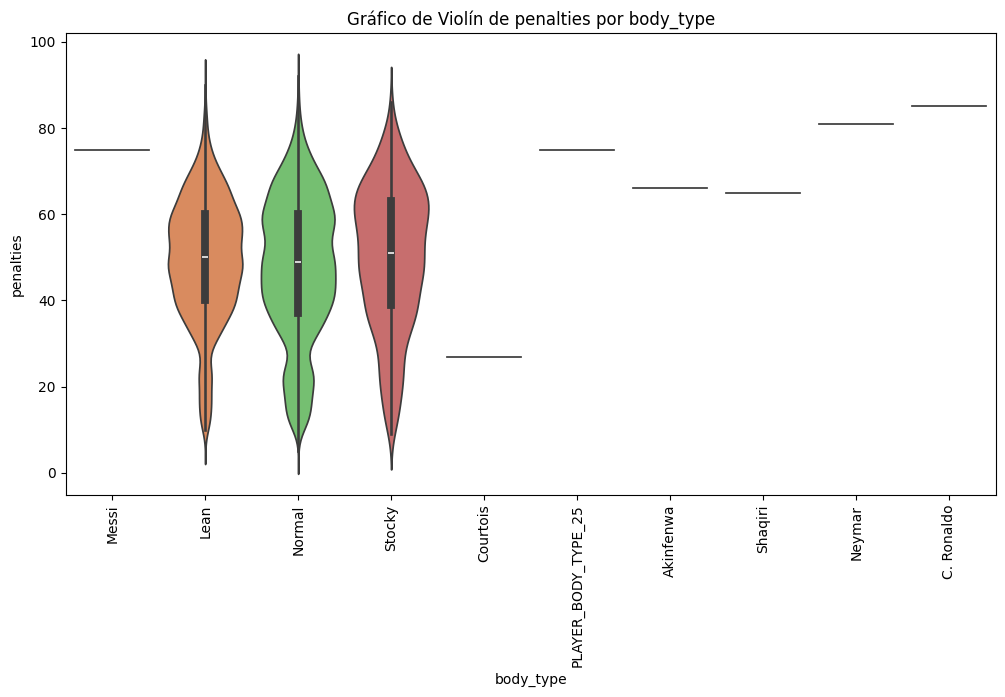

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


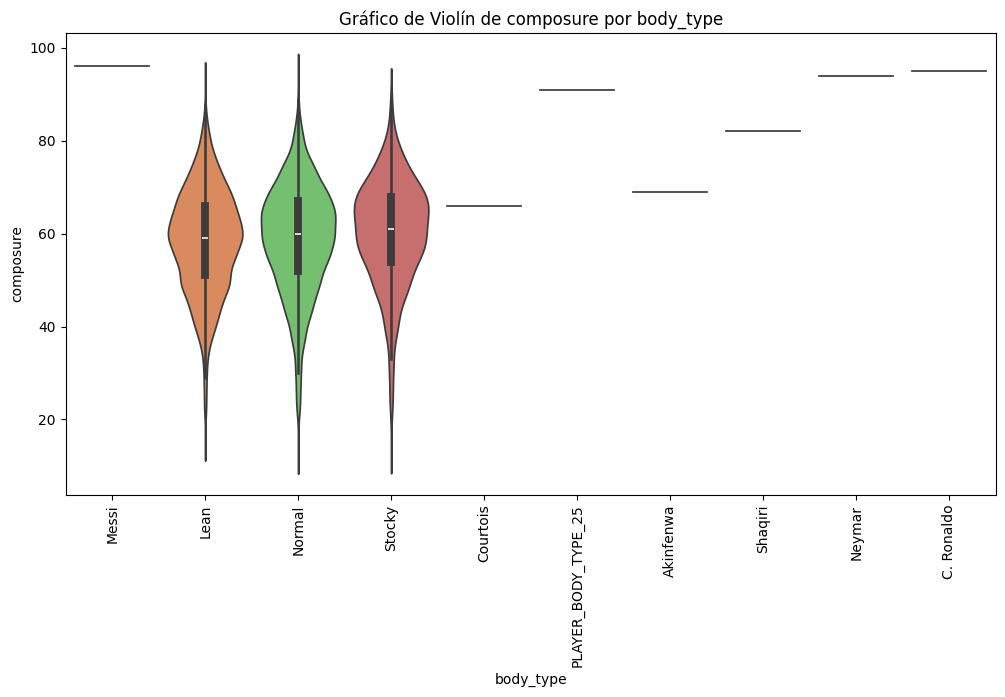

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


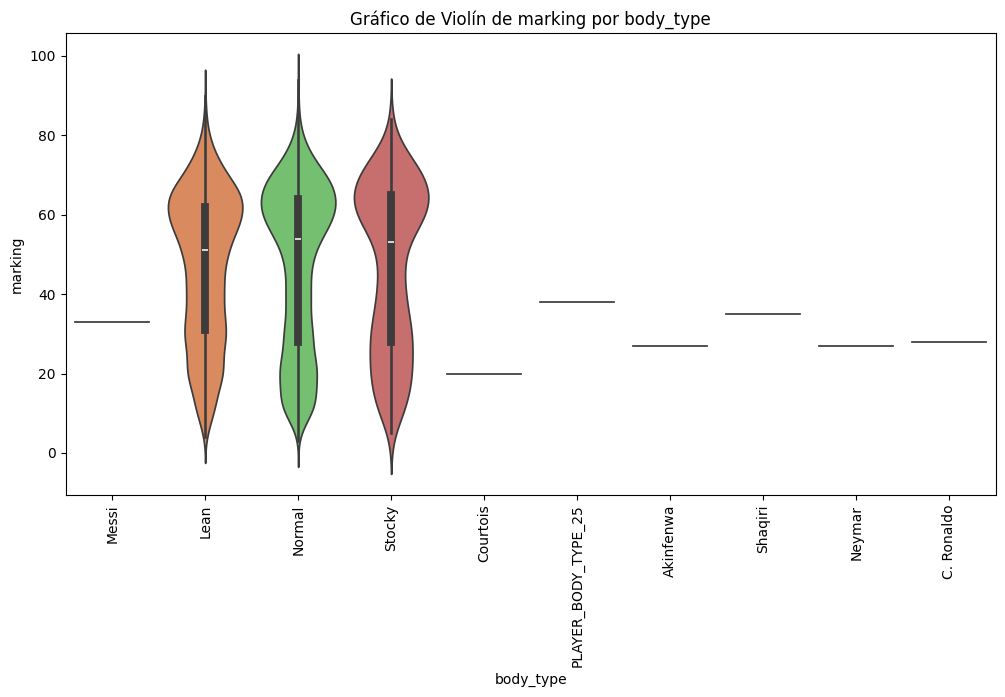

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


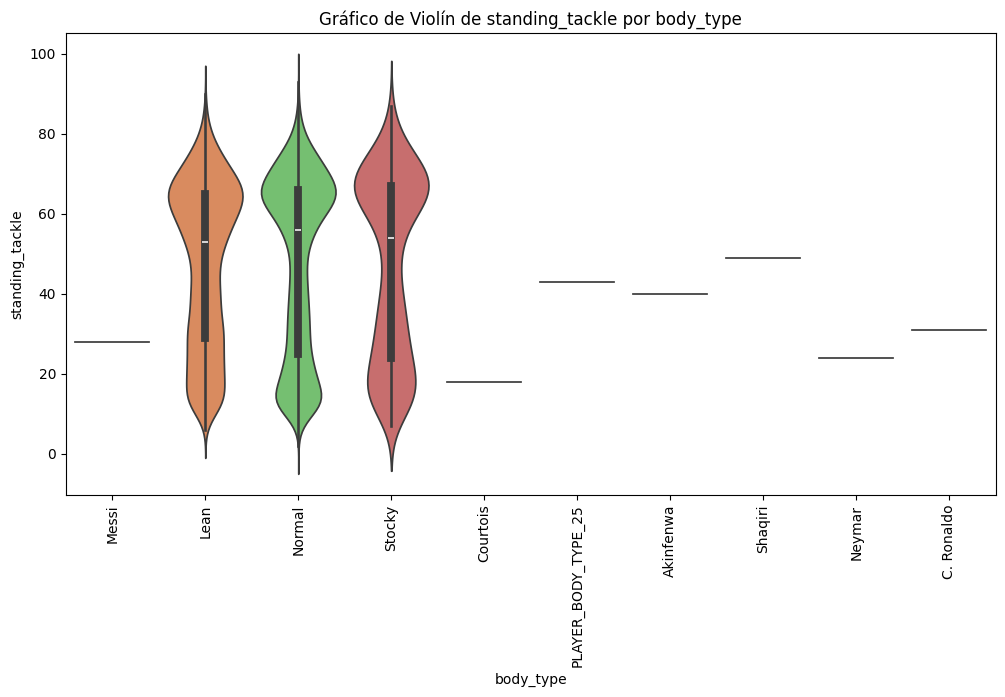

/tmp/ipykernel_18957/2018734512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")


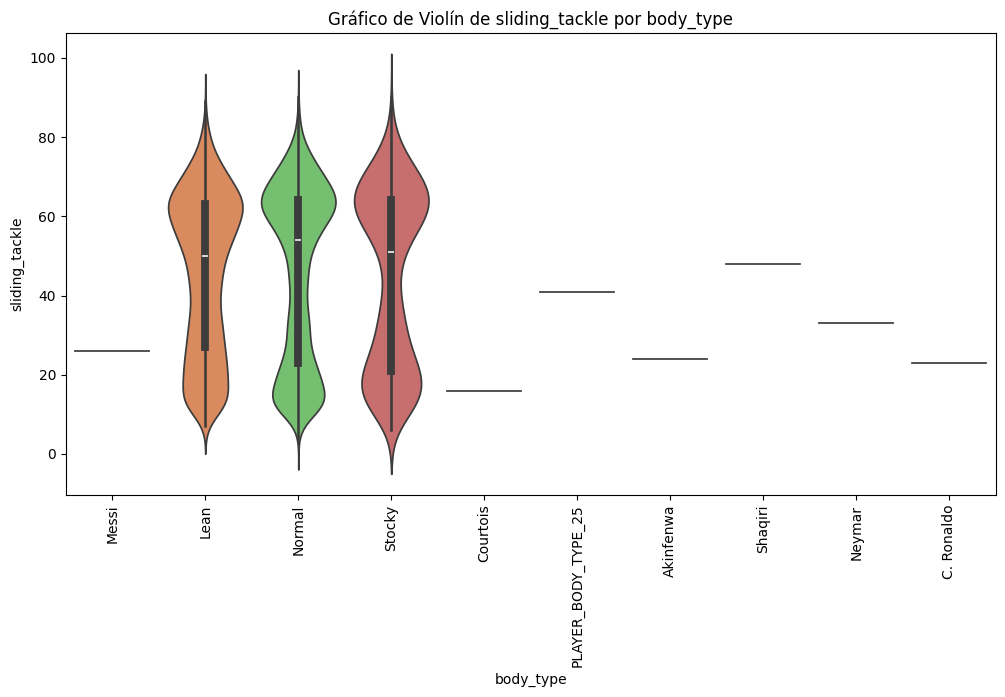

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


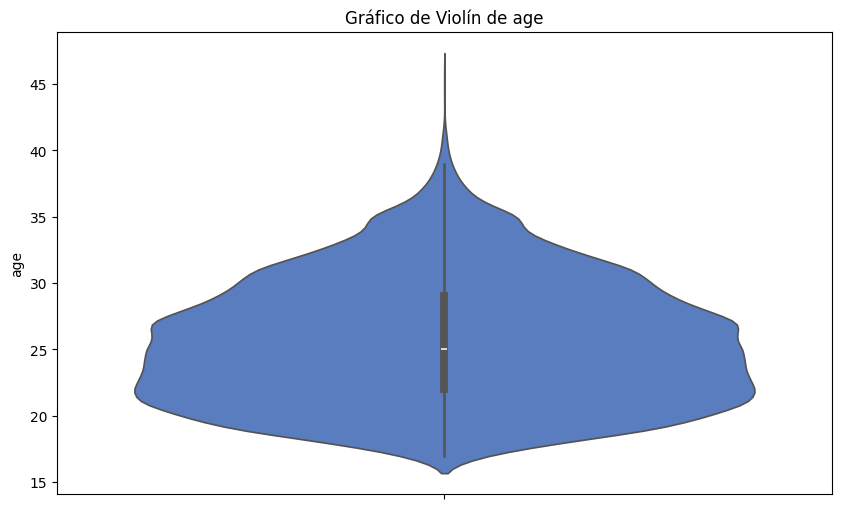

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


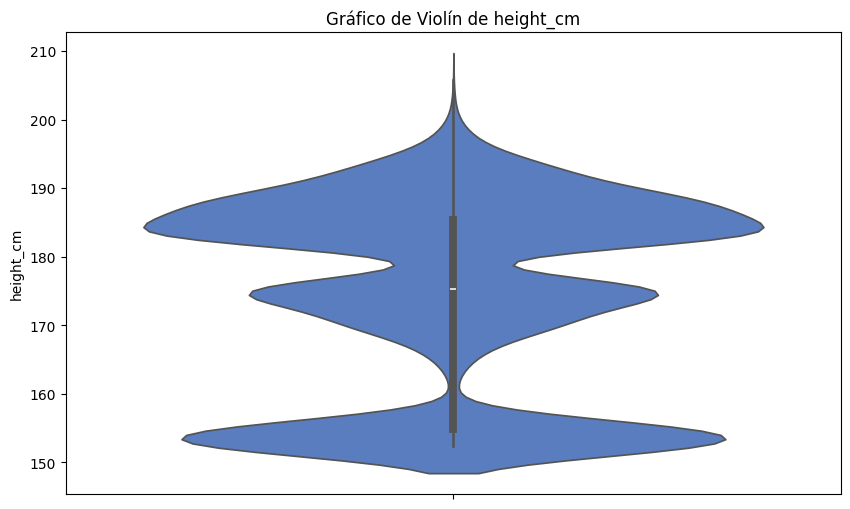

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


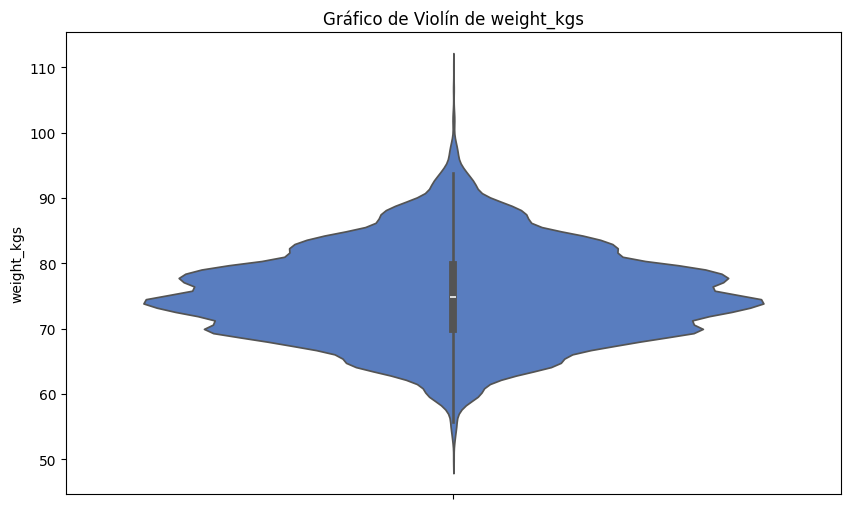

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


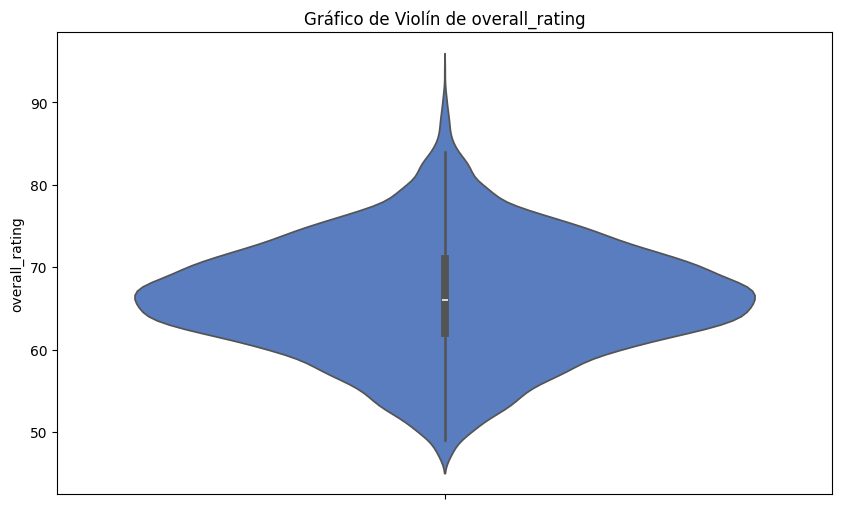

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


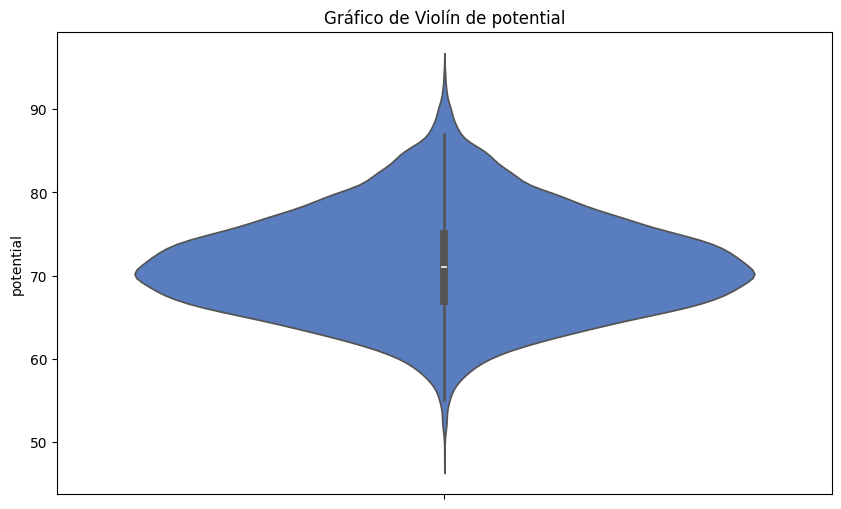

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


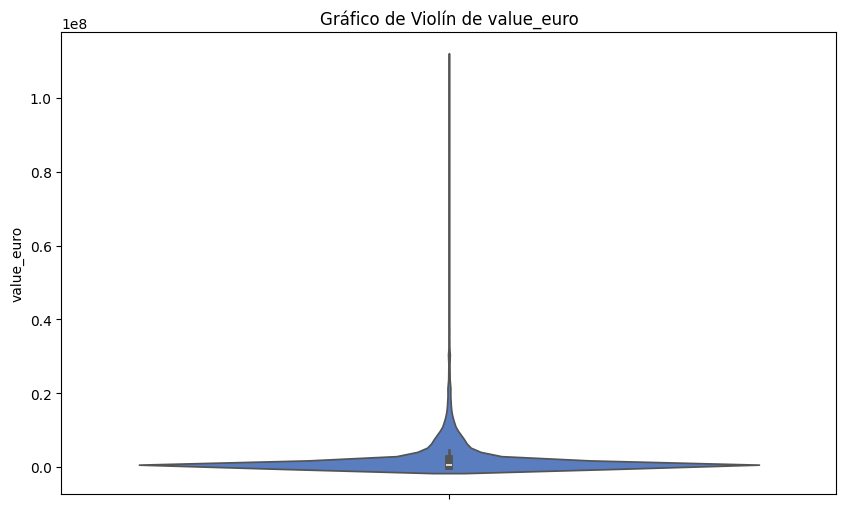

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


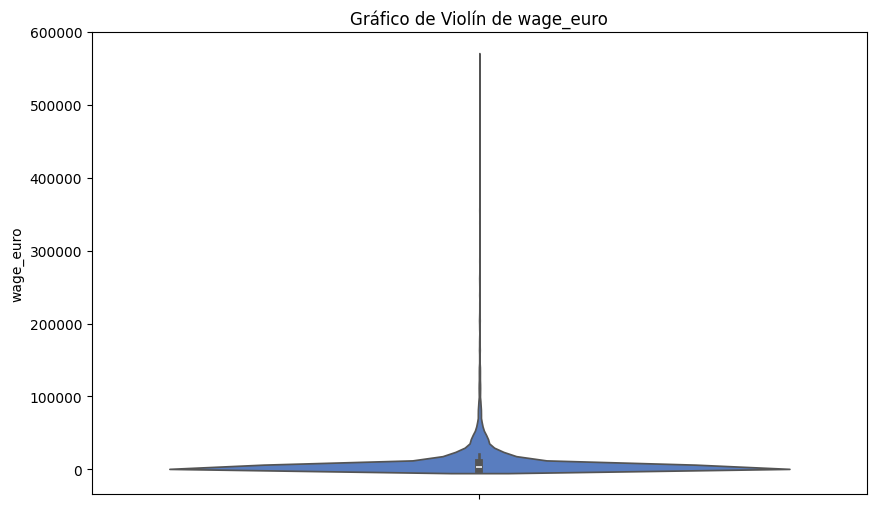

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


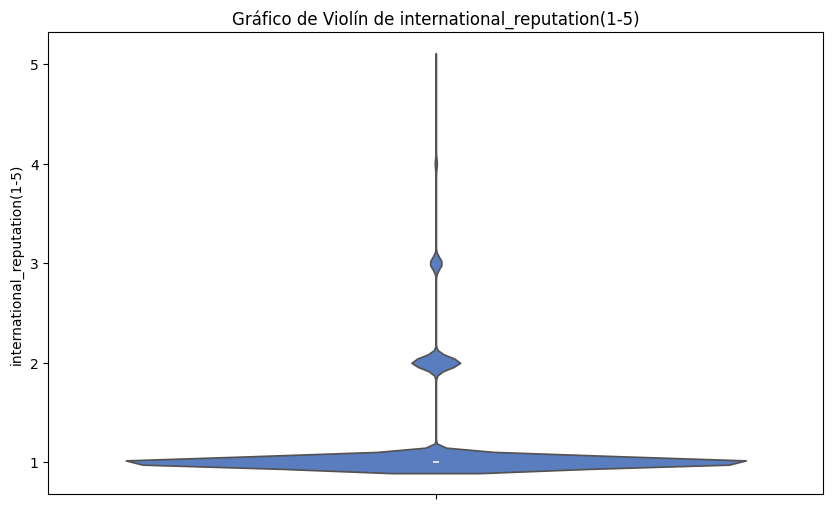

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


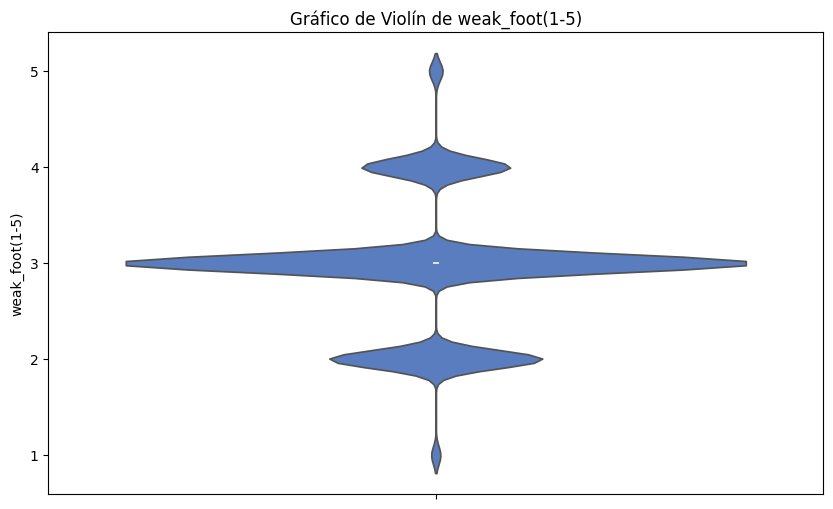

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


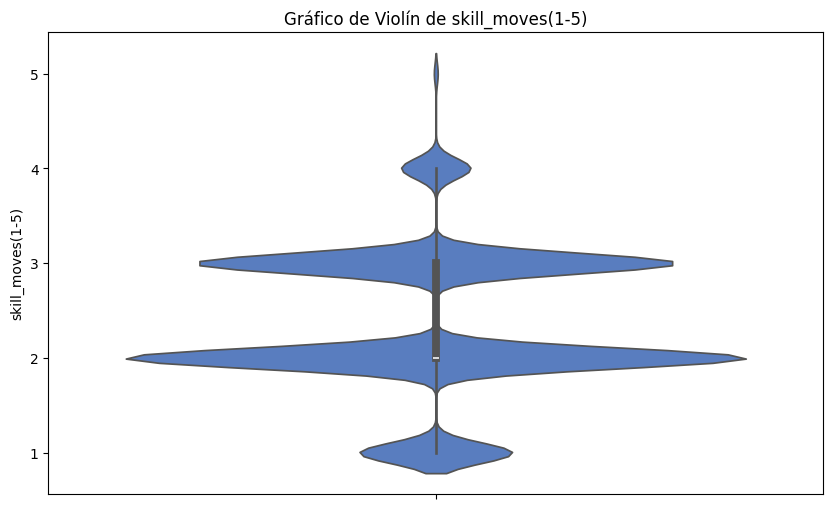

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


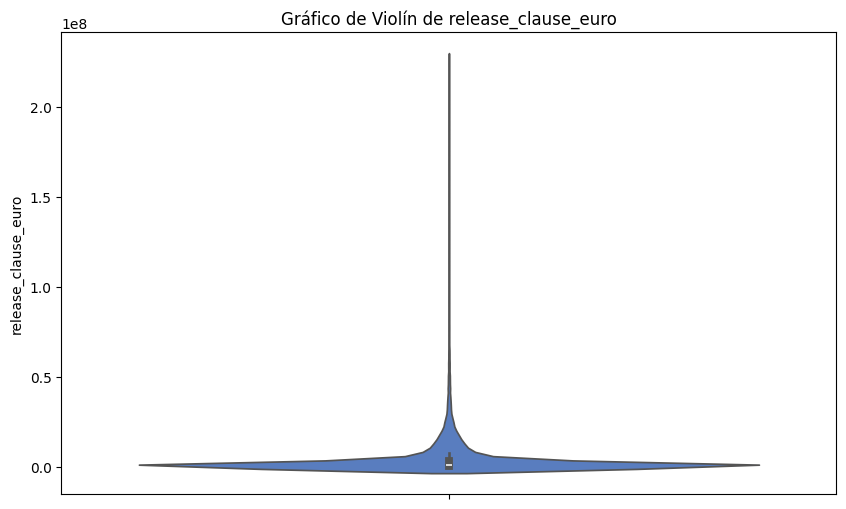

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


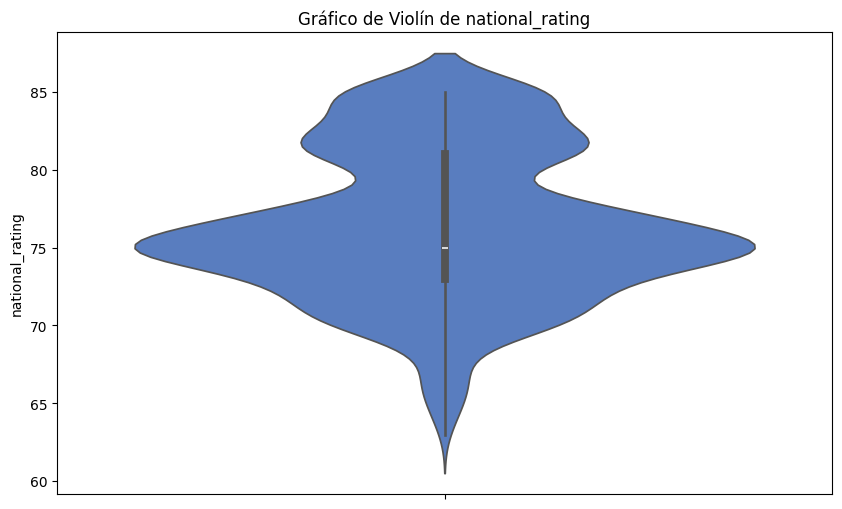

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


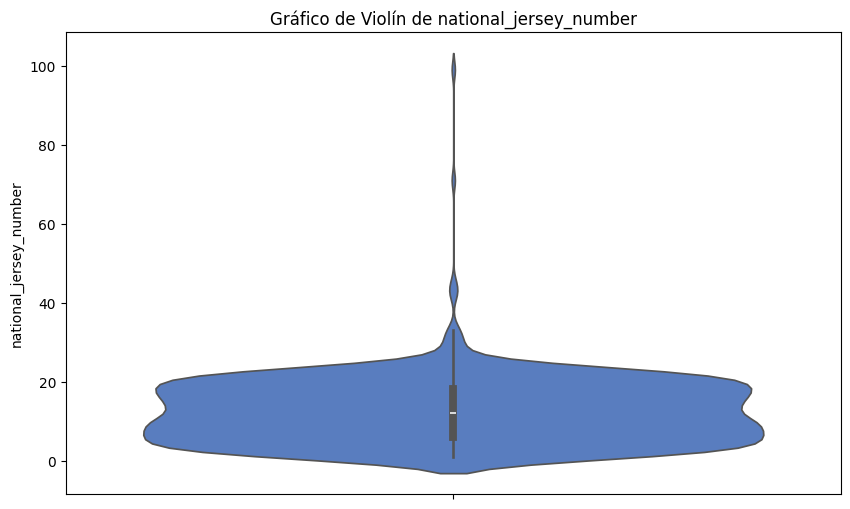

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


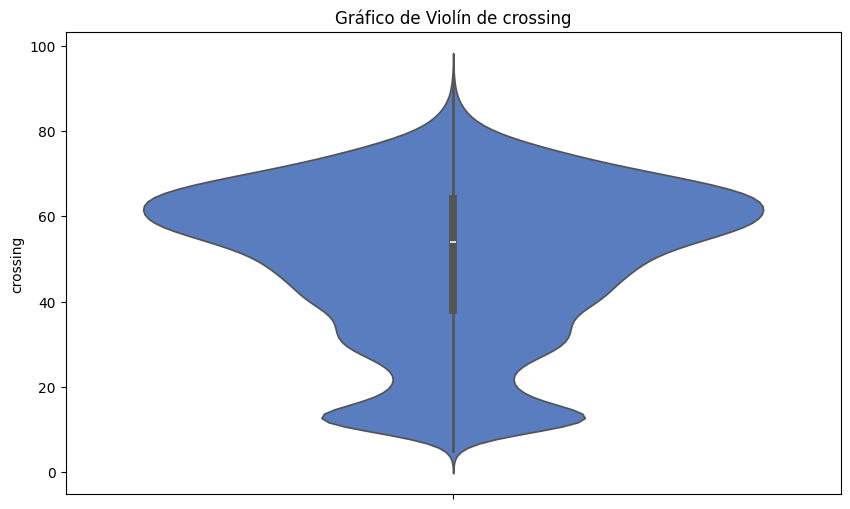

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


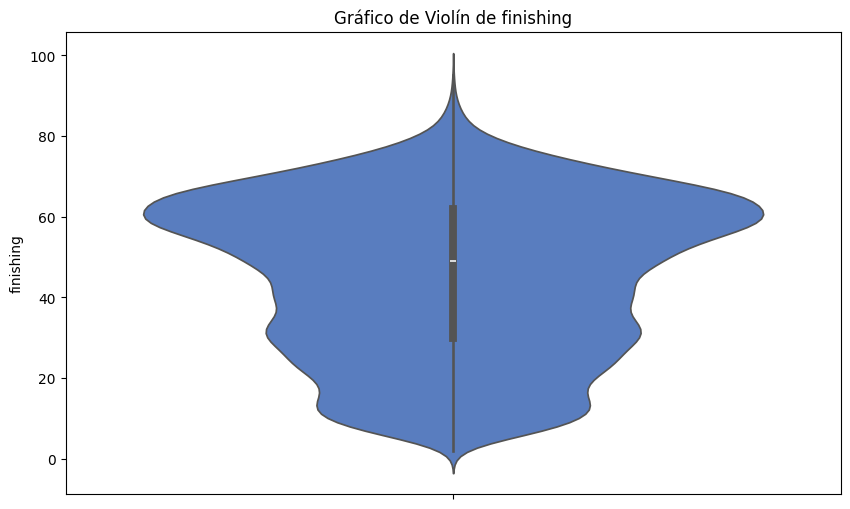

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


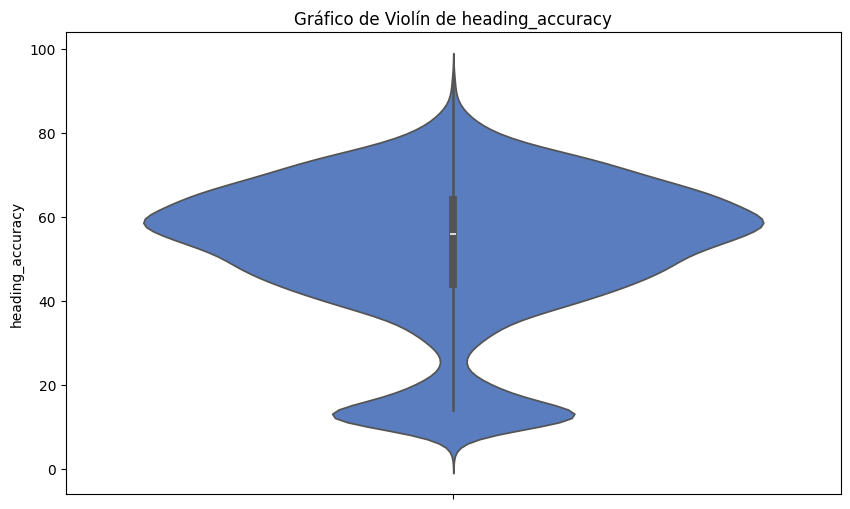

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


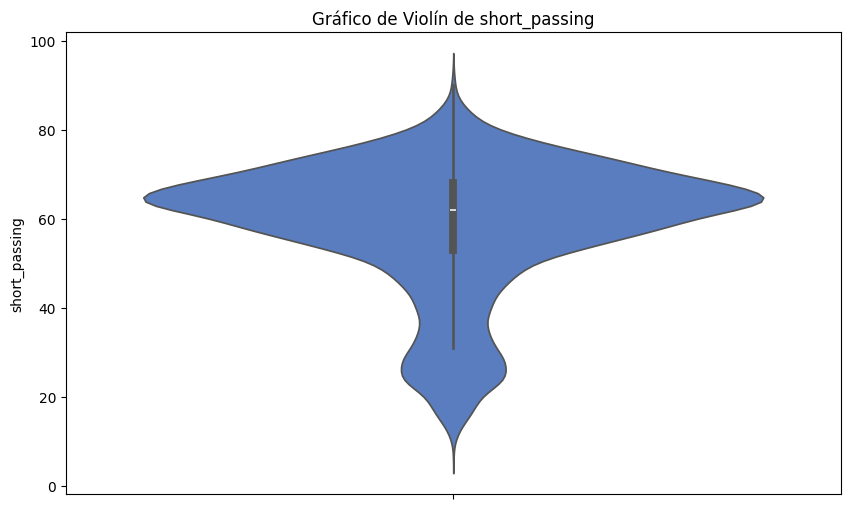

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


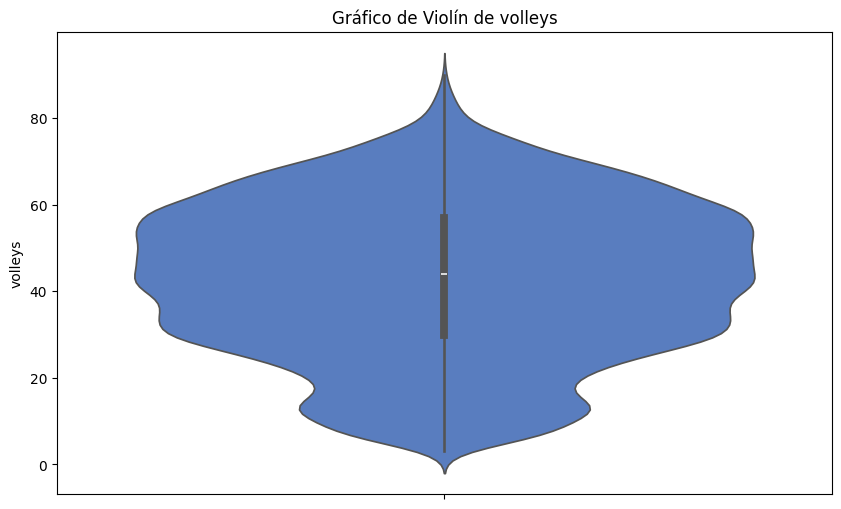

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


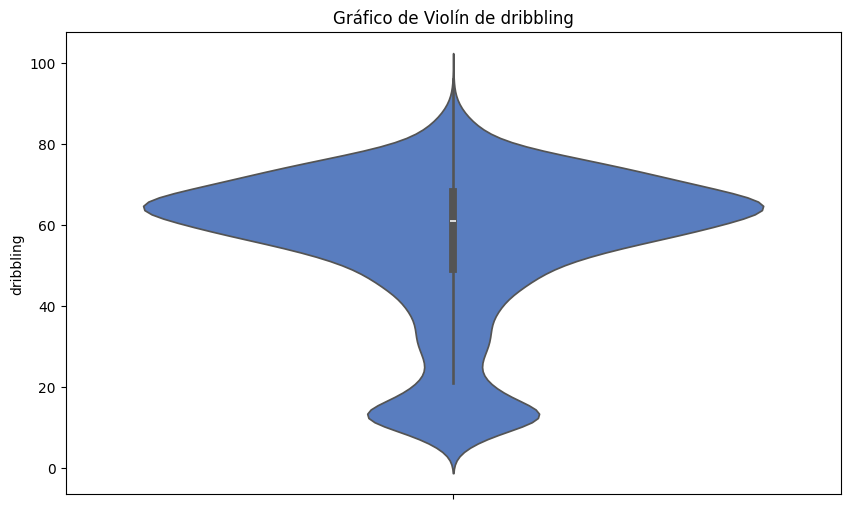

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


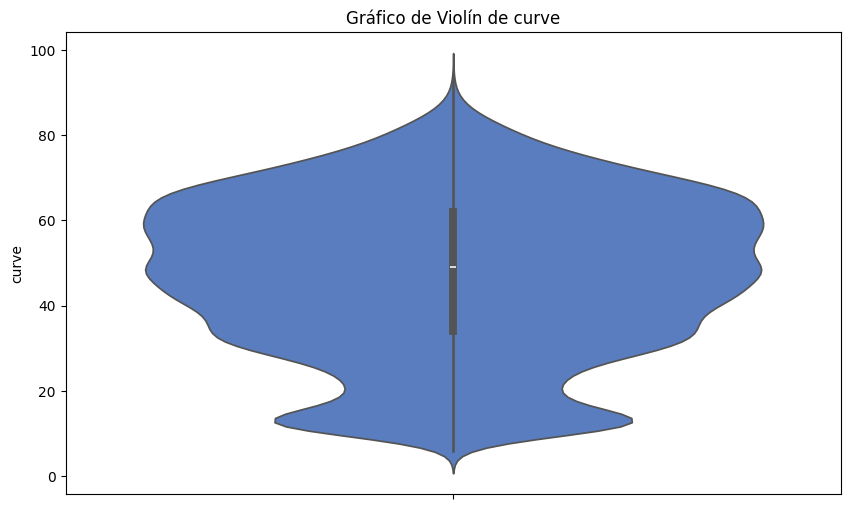

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


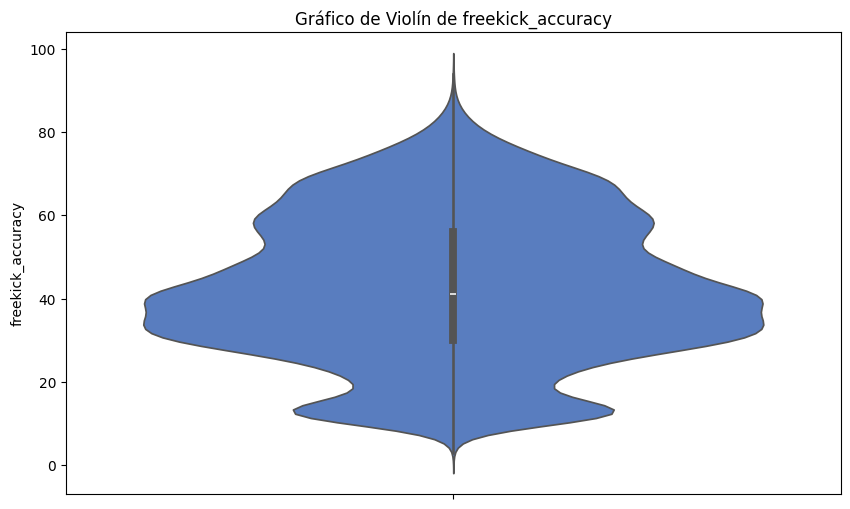

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


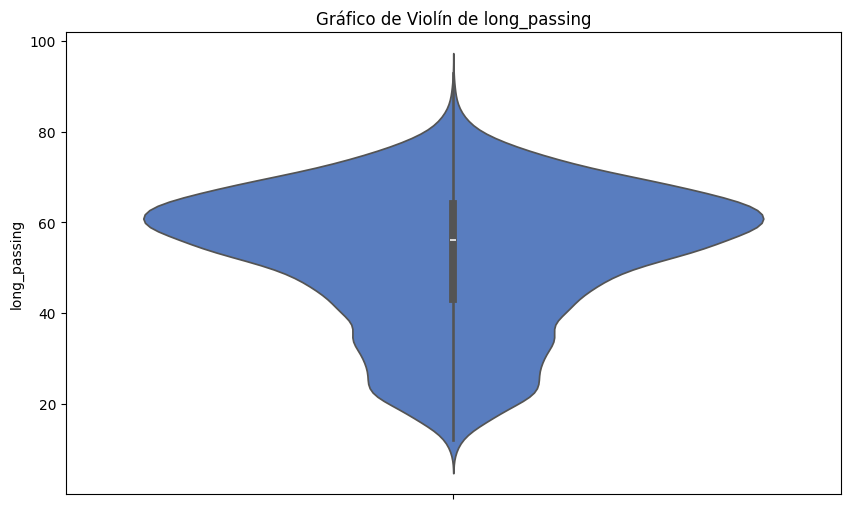

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


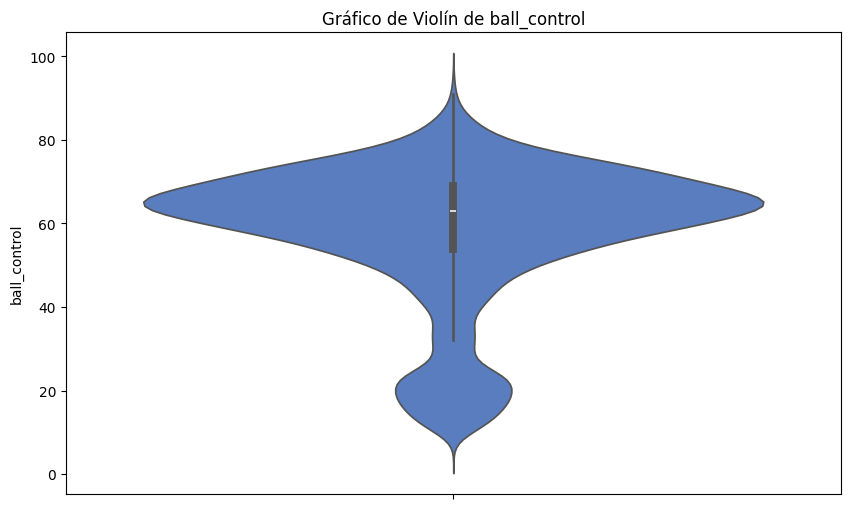

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


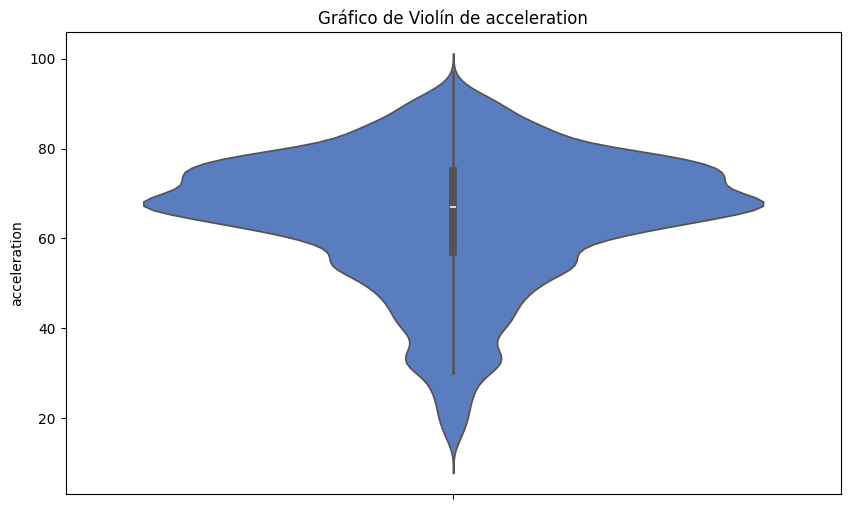

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


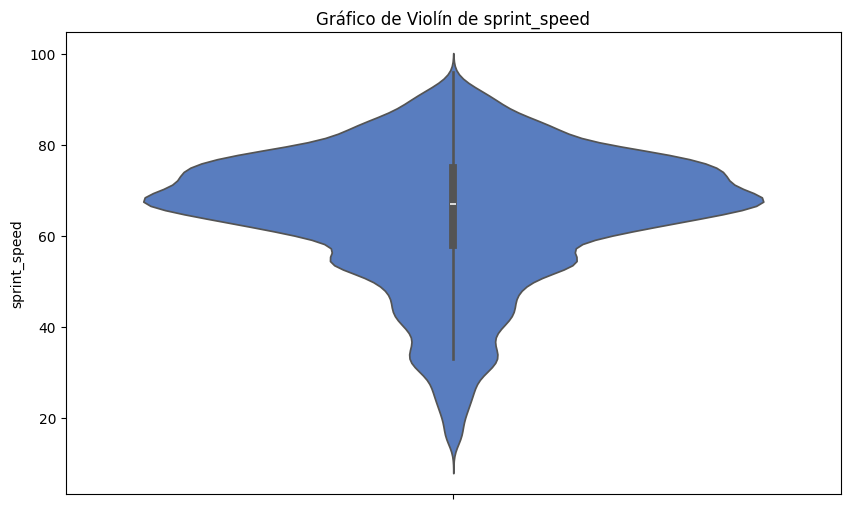

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


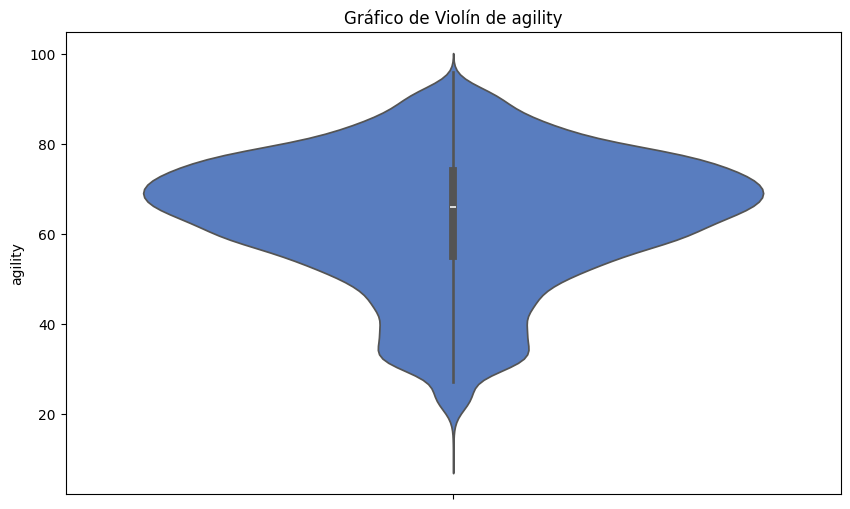

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


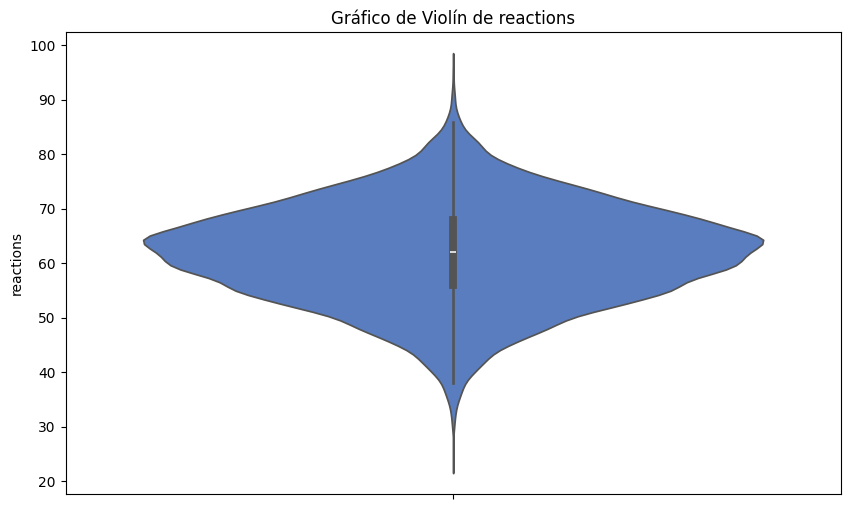

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


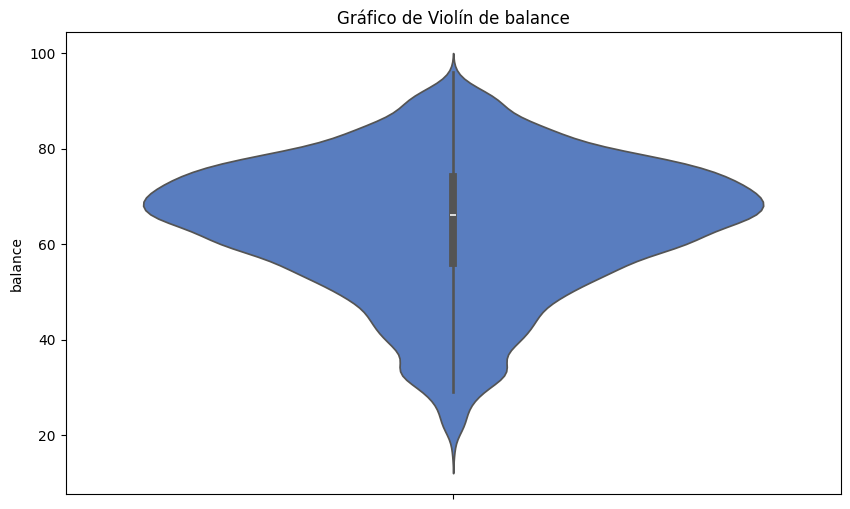

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


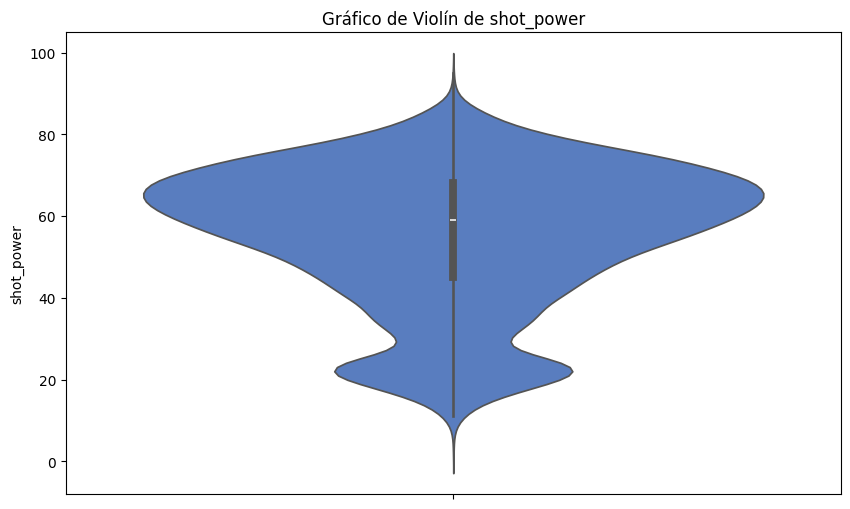

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


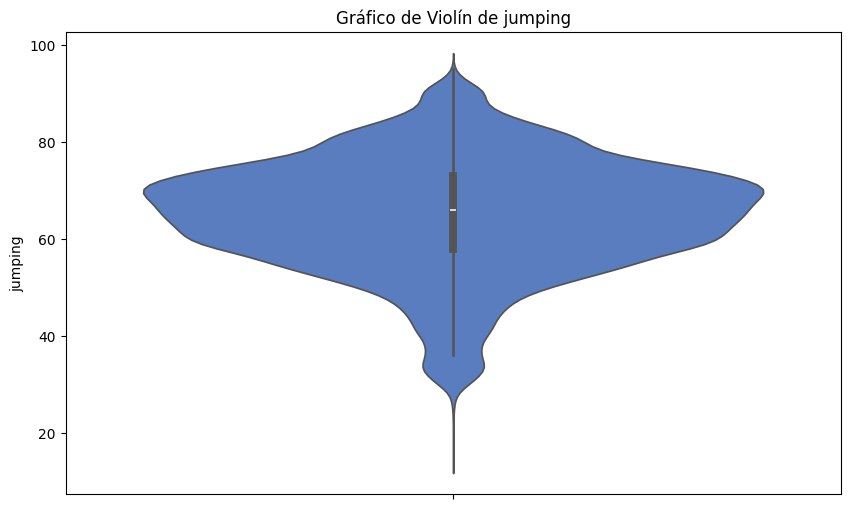

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


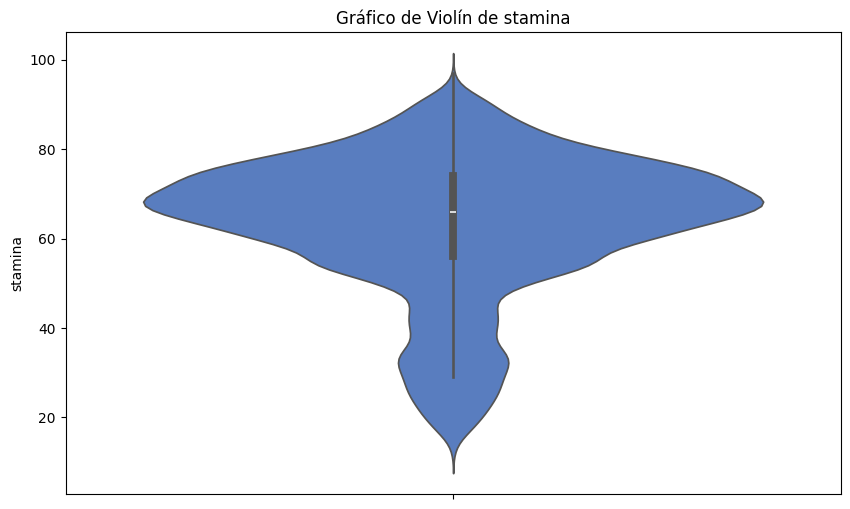

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


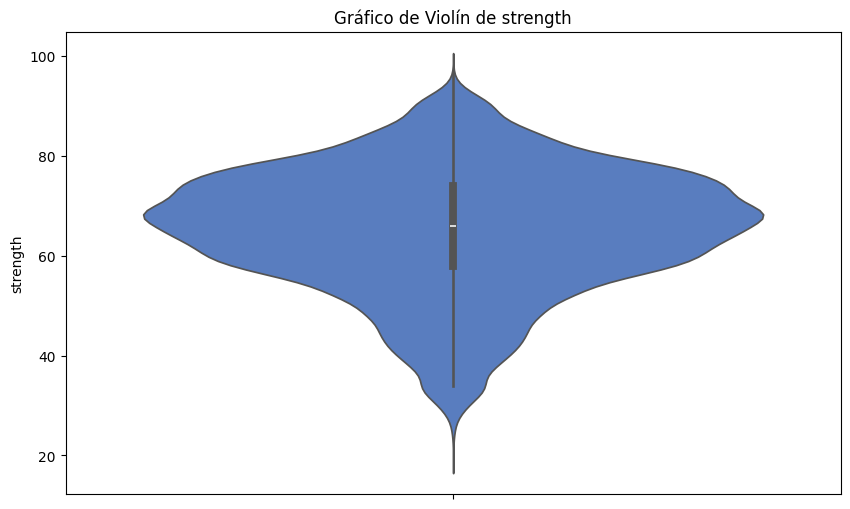

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


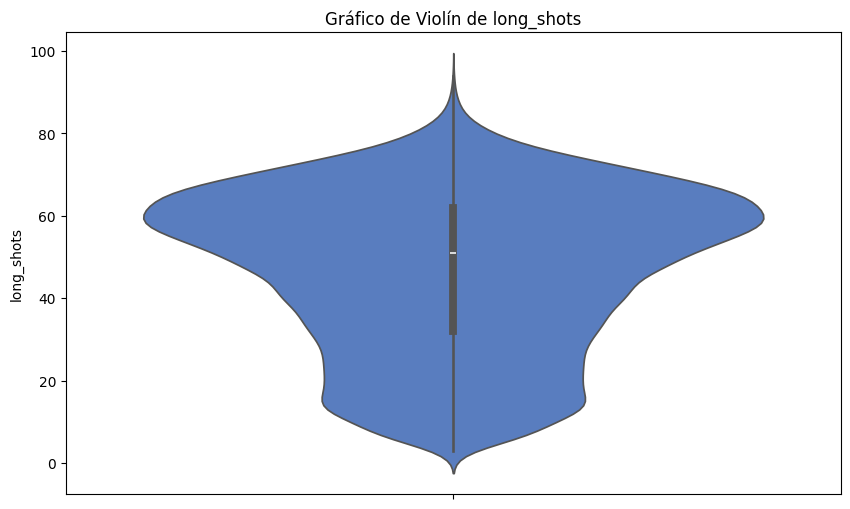

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


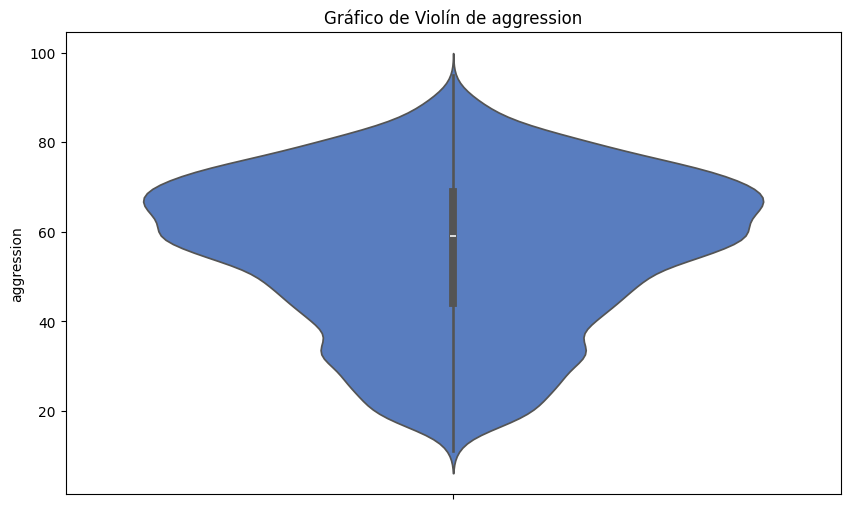

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


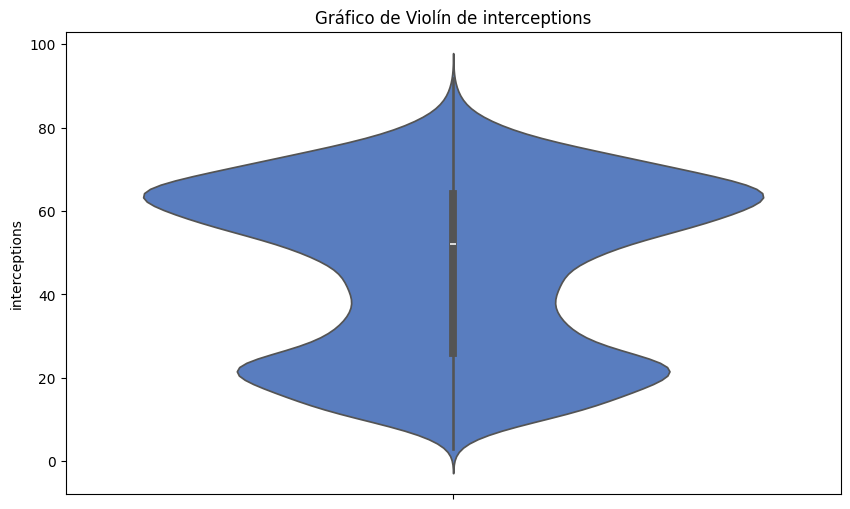

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


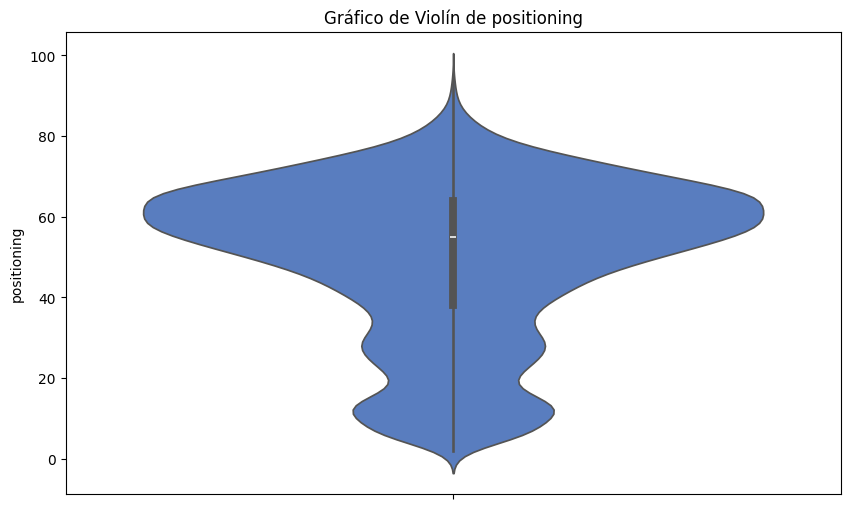

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


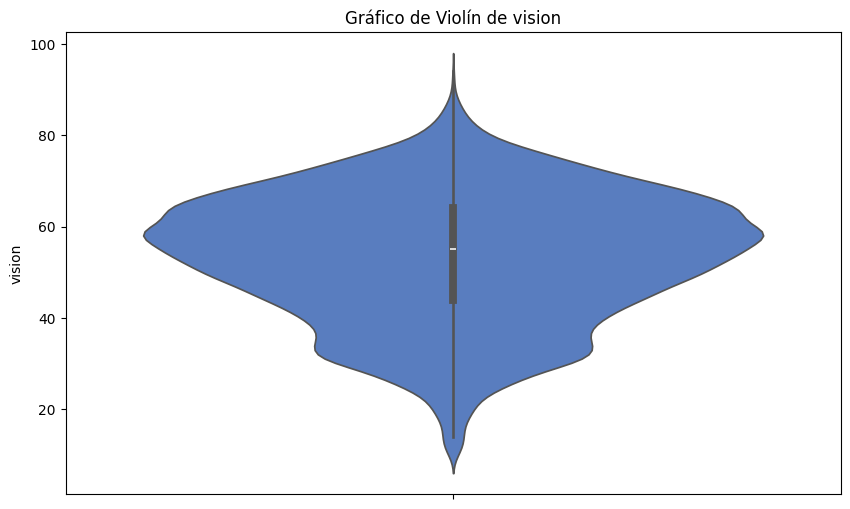

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


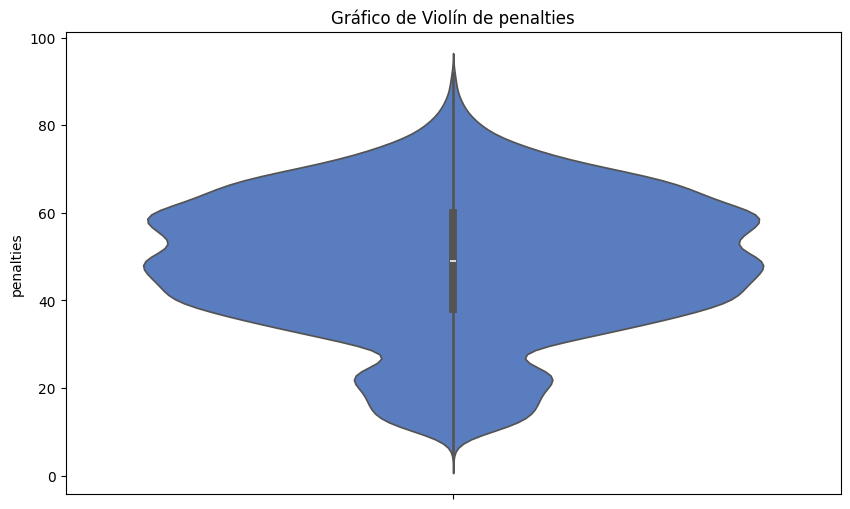

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


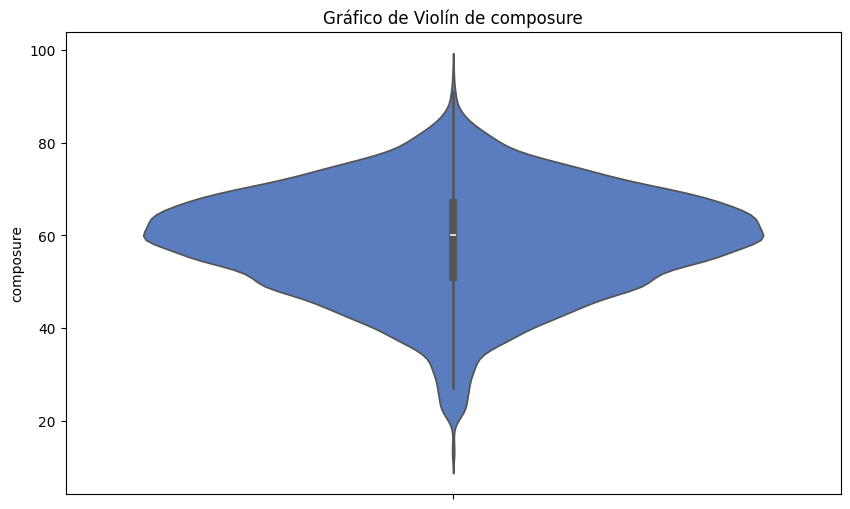

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


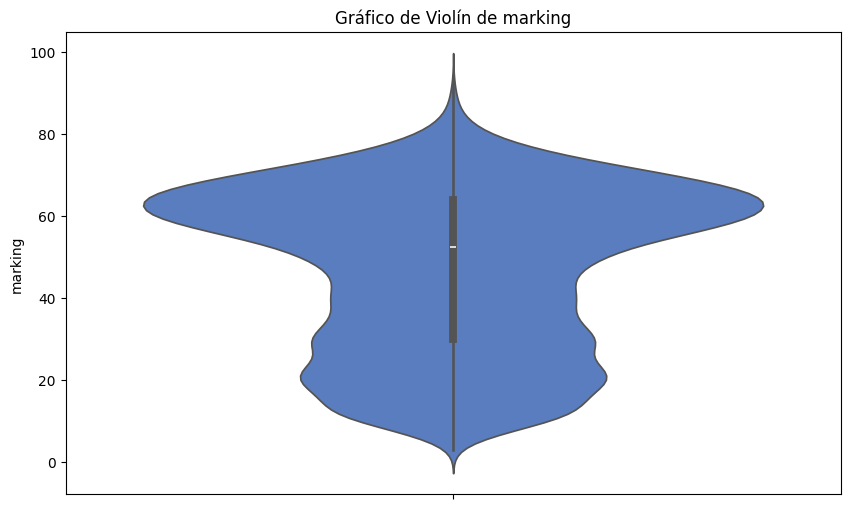

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


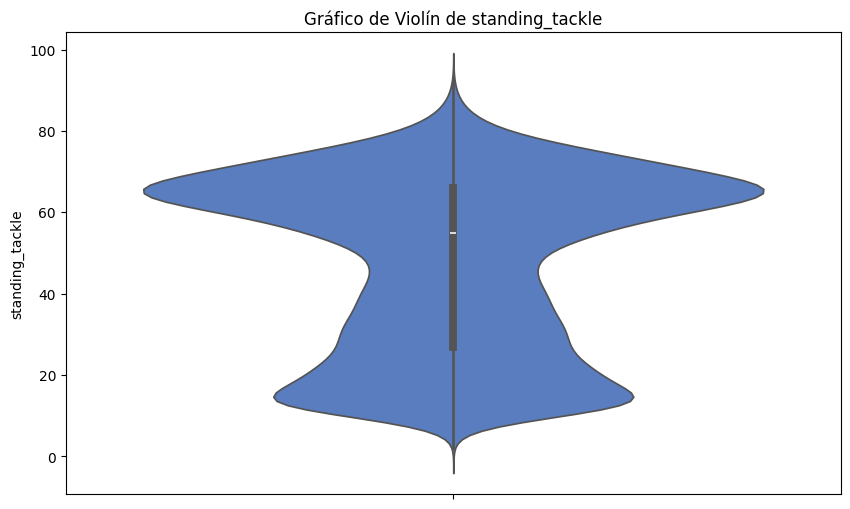

/tmp/ipykernel_18957/2018734512.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=num_var, data=fifa_data, palette="muted")


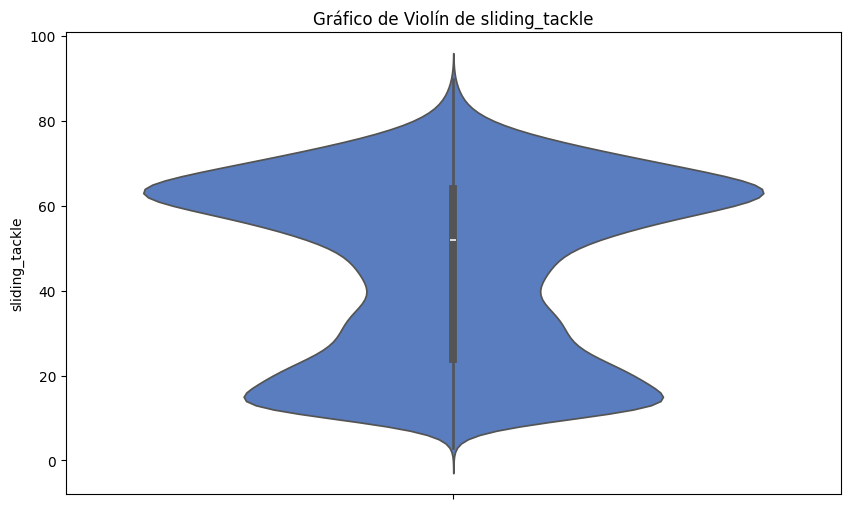

In [60]:
fifa_data = pd.read_csv('../../datasets/raw/fifa_players.csv')

# Filtrar variables numéricas y categóricas
numerical_vars = fifa_data.select_dtypes(include=['float64', 'int64']).columns
categorical_vars = fifa_data.select_dtypes(include=['object']).columns

# Crear gráficos de violín para cada variable numérica en función de una variable categórica
for cat_var in categorical_vars:
    for num_var in numerical_vars:
        if fifa_data[cat_var].nunique() <= 10:  # Ajustar según el número de categorías
            plt.figure(figsize=(12, 6))
            sns.violinplot(x=cat_var, y=num_var, data=fifa_data, palette="muted")
            plt.title(f'Gráfico de Violín de {num_var} por {cat_var}')
            plt.xlabel(cat_var)
            plt.ylabel(num_var)
            plt.xticks(rotation=90)  # Rotar etiquetas para mejorar legibilidad si es necesario
            plt.show()

# Opcional: Gráfico de violín para variables numéricas sin categorizar
for num_var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.violinplot(y=num_var, data=fifa_data, palette="muted")
    plt.title(f'Gráfico de Violín de {num_var}')
    plt.ylabel(num_var)
    plt.show()